# Global Power Plant Attribute Prediction

# 1. Introduction

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas methods to combine all the datasets and then start working on this project.


**Expected Outcome:** 
- Accurate prediction of primary fuel type and capacity (in megawatts) for power plants based on their attributes.
- Insights into the factors influencing primary fuel type and capacity in power plants globally.

# 2. Data Cleaning

# Import important library :

In [314]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor


In [315]:
df1= pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")

In [316]:
df2= pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")

In [317]:
df3= pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")

In [318]:
df1

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0              2.41461          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN              1.92500                 NaN   
904  ...                    NaN              2.05400                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [319]:
df2

country country_long                                 name   gppd_idnr  \
0       AUS    Australia                     Adelaide Airport  AUS0000433   
1       AUS    Australia                 Adelaide Showgrounds  AUS0000432   
2       AUS    Australia                     Albany Wind Farm  AUS0000065   
3       AUS    Australia                Alice Springs Airport  AUS0000469   
4       AUS    Australia                         Amcor Gawler  AUS0000231   
..      ...          ...                                  ...         ...   
507     AUS    Australia                           Yarrawonga  AUS0000101   
508     AUS    Australia                               Yarwun  AUS0000173   
509     AUS    Australia                             Yuendumu  AUS0000465   
510     AUS    Australia                               Yulara  AUS0000257   
511     AUS    Australia  Yurralyi Maya (Karratha Seven Mile)  AUS0000218   

     capacity_mw  latitude  longitude primary_fuel  other_fuel1  other_fuel2  \
0           0.11  -34.9387   138.5377        Solar          NaN          NaN   
1           1.00  -34.9453   138.5882        Solar          NaN          NaN   
2          21.60  -35.0641   117.7977         Wind          NaN          NaN   
3           0.24  -23.7966   133.8971        Solar          NaN          NaN   
4           4.00  -34.5509   138.7659          Oil          NaN          NaN   
..           ...       ...        ...          ...          ...          ...   
507         9.00  -36.0094   145.9995        Hydro          NaN          NaN   
508       154.00  -23.8306   151.1519          Gas          NaN          NaN   
509         0.24  -22.2426   131.7931        Solar          NaN          NaN   
510        10.95  -25.2323   130.9912          Gas          NaN          NaN   
511       180.00  -20.7620   116.7420          Gas          NaN          NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                 2019.0                  NaN                 NaN   
1    ...                 2019.0                  NaN                 NaN   
2    ...                 2019.0            89.595278          102.642778   
3    ...                 2019.0                  NaN                 NaN   
4    ...                 2019.0                  NaN                 NaN   
..   ...                    ...                  ...                 ...   
507  ...                 2019.0            38.216111           44.224722   
508  ...                 2019.0                  NaN                 NaN   
509  ...                 2019.0                  NaN                 NaN   
510  ...                 2019.0            21.947500           22.775000   
511  ...                 2019.0                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2             96.555556           95.872778           85.900278   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN                 NaN   
..                  ...                 ...                 ...   
507           50.183889           46.035278           31.444722   
508                 NaN                 NaN                 NaN   
509                 NaN            5.216667            5.176944   
510           24.086111           23.043889           19.885000   
511          977.226944          945.557778          756.219167   

     generation_gwh_2018  generation_gwh_2019  \
0                    NaN                  NaN   
1                    NaN                  NaN   
2              92.682222                  NaN   
3                    NaN                  NaN   
4                    NaN                  NaN   
..                   ...                  ...   
507            37.317778                  NaN   
508     

In [320]:
df3

country              country_long                            name  \
0         USA  United States of America  10 Briggs Solar NG  LLC (East)   
1         USA  United States of America      100 Brook Hill Drive Solar   
2         USA  United States of America      1001 Ebenezer Church Solar   
3         USA  United States of America             1008 Matthews Solar   
4         USA  United States of America               1009 Yadkin Solar   
...       ...                       ...                             ...   
11874     USA  United States of America        Zotos International WPGF   
11875     USA  United States of America   Zumbro Community Solar Garden   
11876     USA  United States of America             Zumbro Solar Garden   
11877     USA  United States of America                            Zuni   
11878     USA  United States of America             eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1      USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2      USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3      USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4      USA0063445          0.0   36.1475   -80.6561          NaN         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0                  NaN   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN              2.46700   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...              

In [321]:
df1.shape

(907, 27)

In [322]:
df2.shape

(512, 27)

In [323]:
df3.shape

(11879, 27)

In [324]:
df1.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [325]:
df2.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [326]:
df3.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Concatenating the DataFrames vertically

In [327]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [328]:
df

country              country_long                           name  \
0         IND                     India               ACME Solar Tower   
1         IND                     India            ADITYA CEMENT WORKS   
2         IND                     India       AES Saurashtra Windfarms   
3         IND                     India                    AGARTALA GT   
4         IND                     India                   AKALTARA TPP   
...       ...                       ...                            ...   
13293     USA  United States of America       Zotos International WPGF   
13294     USA  United States of America  Zumbro Community Solar Garden   
13295     USA  United States of America            Zumbro Solar Garden   
13296     USA  United States of America                           Zuni   
13297     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1      WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2      WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3      IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4      IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
...           ...          ...       ...        ...          ...         ...   
13293  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
13294  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
13295  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
13296  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
13297  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                   NaN                  NaN   
1             NaN  ...                   NaN                  NaN   
2             NaN  ...                   NaN                  NaN   
3             NaN  ...                2019.0              2.41461   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
13293         NaN  ...                2019.0              3.67100   
13294         NaN  ...                2019.0                  NaN   
13295         NaN  ...                2019.0                  NaN   
13296         NaN  ...                2019.0              0.00000   
13297         NaN  ...                2019.0             12.96800   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3              617.789264             843.747          886.004428   
4             3035.550000            5916.370         6243.000000   
...                   ...                 ...                 ...   
13293            2.460150               2.489            1.670000   
13294                 NaN                 NaN                 NaN   
13295                 NaN                 NaN                 NaN   
13296            0.000000               0.000                 NaN   
13297           51.276000              71.505           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3              663.774500           626.239128                  NaN   
4             5385.579736          7279.000000                  NaN   
...                   ...                  ...                  ...   
1

In [329]:
# India
df.head()#first 5 rows

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                2019.0              2.41461          617.789264   
4                2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [330]:
# Australia
df[906:917]

country country_long                     name   gppd_idnr  capacity_mw  \
906     IND        India  iEnergy Theni Wind Farm  WRI1026761        16.50   
907     AUS    Australia         Adelaide Airport  AUS0000433         0.11   
908     AUS    Australia     Adelaide Showgrounds  AUS0000432         1.00   
909     AUS    Australia         Albany Wind Farm  AUS0000065        21.60   
910     AUS    Australia    Alice Springs Airport  AUS0000469         0.24   
911     AUS    Australia             Amcor Gawler  AUS0000231         4.00   
912     AUS    Australia                 Angaston  AUS0000232        50.00   
913     AUS    Australia                 Anglesea  AUS0000114       165.00   
914     AUS    Australia                 Angurugu  AUS0000615         3.60   
915     AUS    Australia             Appin (Mine)  AUS0000264        55.60   
916     AUS    Australia         Ararat Wind Farm  AUS0000611       240.00   

     latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
906    9.9344    77.4768         Wind         NaN         NaN  ...   
907  -34.9387   138.5377        Solar         NaN         NaN  ...   
908  -34.9453   138.5882        Solar         NaN         NaN  ...   
909  -35.0641   117.7977         Wind         NaN         NaN  ...   
910  -23.7966   133.8971        Solar         NaN         NaN  ...   
911  -34.5509   138.7659          Oil         NaN         NaN  ...   
912  -34.5034   139.0246          Oil         NaN         NaN  ...   
913  -38.3861   144.1828         Coal         NaN         NaN  ...   
914  -13.8584   136.4209          Oil         NaN         NaN  ...   
915  -34.2082   150.7722          Gas         NaN         NaN  ...   
916  -37.2385   143.0794         Wind         NaN         NaN  ...   

    year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
906                   NaN                  NaN                 NaN   
907                2019.0                  NaN                 NaN   
908                2019.0                  NaN                 NaN   
909                2019.0            89.595278          102.642778   
910                2019.0                  NaN                 NaN   
911                2019.0                  NaN                 NaN   
912                2019.0                  NaN                 NaN   
913                2019.0          1095.676944         1239.962778   
914                2019.0                  NaN                 NaN   
915                2019.0           204.804444          238.294444   
916                2019.0                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   
908                 NaN                 NaN                 NaN   
909           96.555556           95.872778           85.900278   
910                 NaN                 NaN                 NaN   
911                 NaN                 NaN                 NaN   
912            1.653056            5.300833            7.649722   
913         1260.261111          167.880000                 NaN   
914                 NaN                 NaN                 NaN   
915          163.583611          158.933056           64.534722   
916                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019  \
906                  NaN                  NaN   
907                  NaN                  NaN   
908                  NaN                  NaN   
909            92.682222                  NaN   
910                  NaN                  NaN   
911                  NaN                  NaN   
912             2.222222                  NaN   
913                  NaN                  NaN   
914                  NaN                  NaN   
915            99.470000                  NaN   
916                  NaN                 

In [331]:
# United States of America
df.tail()#last 5 rows

country              country_long                           name  \
13293     USA  United States of America       Zotos International WPGF   
13294     USA  United States of America  Zumbro Community Solar Garden   
13295     USA  United States of America            Zumbro Solar Garden   
13296     USA  United States of America                           Zuni   
13297     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
13293  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
13294  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
13295  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
13296  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
13297  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
13293         NaN  ...                2019.0                3.671   
13294         NaN  ...                2019.0                  NaN   
13295         NaN  ...                2019.0                  NaN   
13296         NaN  ...                2019.0                0.000   
13297         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
13293             2.46015               2.489               1.670   
13294                 NaN                 NaN                 NaN   
13295                 NaN                 NaN                 NaN   
13296             0.00000               0.000                 NaN   
13297            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
13293             1.23349                2.630                1.211   
13294                 NaN                1.161                1.589   
13295                 NaN                  NaN                  NaN   
13296                 NaN                  NaN                  NaN   
13297            76.63100               75.228             72.06506   

                       generation_data_source  estimated_generation_gwh  
13293  U.S. Energy Information Administration                       NaN  
13294  U.S. Energy Information Administration                       NaN  
13295                                     NaN                       NaN  
13296  U.S. Energy Information Administration                       NaN  
13297  U.S. Energy Information Administration                       NaN  

[5 rows x 27 columns]

# Exploratory Data Analysis (EDA)

In [332]:
df.shape

(13298, 27)

The dataset consists of 13298 rows and 27 columns, which include both features and labels.

In [333]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [334]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are object data column which we need to encode going further for model building.

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [336]:
df.describe()

capacity_mw      latitude     longitude  commissioning_year  wepp_id  \
count  13292.000000  13220.000000  13220.000000        10654.000000      0.0   
mean     117.738717     35.053213    -73.794217         1998.184904      NaN   
std      347.169038     15.444195     62.868834           24.017781      NaN   
min        0.000000    -42.888300   -171.712400         1896.000000      NaN   
25%        1.500000     33.901700   -104.659875         1988.000000      NaN   
50%        5.500000     38.389750    -87.346000         2008.000000      NaN   
75%       52.725000     42.175125    -75.475925         2015.000000      NaN   
max     6809.000000    425.246100    153.434100         2020.000000      NaN   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                12860.0          7170.000000          7534.000000   
mean                  2019.0           563.383222           635.739731   
std                      0.0          2030.523760          2193.172655   
min                   2019.0          -947.600000          -989.619000   
25%                   2019.0             1.653075             2.018000   
50%                   2019.0            21.384500            22.241000   
75%                   2019.0           185.326498           217.069500   
max                   2019.0         31431.080000         32320.917000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count          7993.000000          8701.000000          9292.000000   
mean            616.801877           561.784508           532.472482   
std            2148.167470          2050.411295          2001.411908   
min            -864.428000          -768.620000          -934.944000   
25%               2.140000             2.108000             2.063750   
50%              19.504000            15.410278            13.433861   
75%             200.279000           173.348004           157.889688   
max           32525.595000         32377.477000         35116.000000   

       generation_gwh_2018  estimated_generation_gwh  
count          9858.000000                       0.0  
mean            513.679016                       NaN  
std            1963.485305                       NaN  
min            -982.622000                       NaN  
25%               2.141250                       NaN  
50%              12.308500                       NaN  
75%             149.141249                       NaN  
max           35136.000000                       NaN

In [337]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [338]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

no.of unique values
country                                     3
country_long                                3
name                                    13266
gppd_idnr                               13298
capacity_mw                              2304
latitude                                12385
longitude                               12733
primary_fuel                               14
other_fuel1                                12
other_fuel2                                11
other_fuel3                                 9
commissioning_year                       1936
owner                                    5877
source                                    206
url                                       325
geolocation_source                          5
wepp_id                                     0
year_of_capacity_data                       1
generation_gwh_2013                      5616
generation_gwh_2014                      6306
generation_gwh_2015                      6692
generation_gwh_2016                      7150
generation_gwh_2017                      7630
generation_gwh_2018                      8040
generation_gwh_2019                      8368
generation_data_source                      3
estimated_generation_gwh                    0

In [339]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64
/n
country_long
United States of America    11879
India                         907
Australia                     512
Name: count, dtype: int64
/n
name
Richland                      3
Central Utility Plant         2
Clover                        2
Newport                       2
Unknown                       2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: count, Length: 13266, dtype: int64
/n
gppd_idnr
WRI1020239    1
USA0062255    1
USA0006180    1
USA0057489    1
USA0061333    1
             ..
USA0006378    1
USA0000840    1
USA0050818    1
USA0062324    1
USA0059281    1
Name: count, Length: 13298, dtype: int64
/n
capacity_mw
0.0       2030
5.0        552
1.0        534
2.0        479
1.5        267
          ... 
119.1        1
251.8        1
153.9        1
14

From the above result, it's evident that there are zero values present in the dataset.

In [340]:
nul_val=df.isnull()

In [341]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

country
country
False    13298
Name: count, dtype: int64

country_long
country_long
False    13298
Name: count, dtype: int64

name
name
False    13298
Name: count, dtype: int64

gppd_idnr
gppd_idnr
False    13298
Name: count, dtype: int64

capacity_mw
capacity_mw
False    13292
True         6
Name: count, dtype: int64

latitude
latitude
False    13220
True        78
Name: count, dtype: int64

longitude
longitude
False    13220
True        78
Name: count, dtype: int64

primary_fuel
primary_fuel
False    11294
True      2004
Name: count, dtype: int64

other_fuel1
other_fuel1
True     11670
False     1628
Name: count, dtype: int64

other_fuel2
other_fuel2
True     13028
False      270
Name: count, dtype: int64

other_fuel3
other_fuel3
True     13206
False       92
Name: count, dtype: int64

commissioning_year
commissioning_year
False    10654
True      2644
Name: count, dtype: int64

owner
owner
False    12705
True       593
Name: count, dtype: int64

source
source
False    13298
Name: co

In [342]:
#Checking null values-
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [343]:
df.isnull().sum().sum()

105587

<Axes: >

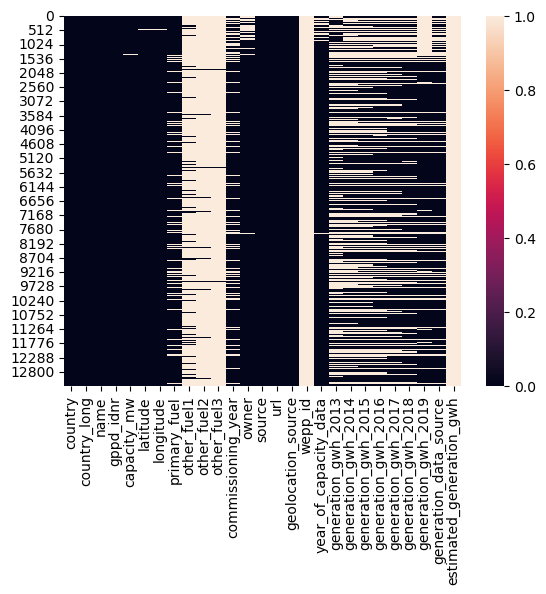

In [344]:
sns.heatmap(df.isnull())

In [345]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

Due to a high number of missing values in the columns "other_fuel1," "other_fuel2," "other_fuel3," "wepp_id," "generation_gwh_2013," "generation_gwh_2014,"generation_gwh_2015" and "estimated_generation_gwh," we will proceed to drop them.

In [346]:
df=df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','estimated_generation_gwh'],axis= 1)
df

country              country_long                           name  \
0         IND                     India               ACME Solar Tower   
1         IND                     India            ADITYA CEMENT WORKS   
2         IND                     India       AES Saurashtra Windfarms   
3         IND                     India                    AGARTALA GT   
4         IND                     India                   AKALTARA TPP   
...       ...                       ...                            ...   
13293     USA  United States of America       Zotos International WPGF   
13294     USA  United States of America  Zumbro Community Solar Garden   
13295     USA  United States of America            Zumbro Solar Garden   
13296     USA  United States of America                           Zuni   
13297     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel  \
0      WRI1020239          2.5   28.1839    73.2407        Solar   
1      WRI1019881         98.0   24.7663    74.6090         Coal   
2      WRI1026669         39.2   21.9038    69.3732         Wind   
3      IND0000001        135.0   23.8712    91.3602          Gas   
4      IND0000002       1800.0   21.9603    82.4091         Coal   
...           ...          ...       ...        ...          ...   
13293  USA0057648          3.4   42.8869   -76.9683         Wind   
13294  USA0061574          1.0   44.3195   -92.6703        Solar   
13295  USA0063426          0.0   44.0460   -92.7600          NaN   
13296  USA0000478          0.0   39.7373  -105.0170          NaN   
13297  USA0059281          9.8   40.5606  -112.0478          Gas   

       commissioning_year                          owner  \
0              2011.00000                    Solar Paces   
1                     NaN           Ultratech Cement ltd   
2                     NaN                            AES   
3              2004.00000                            NaN   
4              2015.00000                            NaN   
...                   ...                            ...   
13293          2012.00000            Zotos International   
13294          2018.00000               Zumbro Solar LLC   
13295                 NaN              Zumbro Garden LLC   
13296                 NaN  Public Service Co of Colorado   
13297          2013.77551                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
4               Central Electricity Authority   
...                                       ...   
13293  U.S. Energy Information Administration   
13294  U.S. Energy Information Administration   
13295  U.S. Energy Information Administration   
13296  U.S. Energy Information Administration   
13297  U.S. Energy Information Administration   

                                                     url  \
0      http://www.nrel.gov/csp/solarpaces/project_det...   
1                        http://www.ultratechcement.com/   
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                                 http://www.cea.nic.in/   
4                                 http://www.cea.nic.in/   
...                                                  ...   
13293       http://www.eia.gov/electricity/data/browser/   
13294       http://www.eia.gov/electricity/data/browser/   
13295       http://www.eia.gov/electricity/data/browser/   
13296       http://www.eia.gov/electricity/data/browser/   
13297       http://www.eia.gov/electricity/data/browser/   

                           geolocation_source  year_of_capacity_data  \
0        National Renewable Energy Laboratory                    NaN   
1                                         WRI                    NaN   
2                                         WRI        

In [347]:
df.isnull().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
owner                      593
source                       0
url                          0
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [348]:
df.isna().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
owner                      593
source                       0
url                          0
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

# Filling null values-

In [349]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [350]:
df['generation_gwh_2019'] = pd.to_numeric(df['generation_gwh_2019'], errors='coerce')

In [351]:
df['commissioning_year'].fillna(value=df['commissioning_year'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)
df['capacity_mw'].fillna(value=df['capacity_mw'].median(), inplace= True)


In [352]:
df['owner'].fillna(value=df['owner'].mode()[0], inplace= True)
df['geolocation_source'].fillna(value=df['geolocation_source'].mode()[0], inplace= True)
df['year_of_capacity_data'].fillna(value=df['year_of_capacity_data'].mode()[0], inplace= True)
df['generation_data_source'].fillna(value=df['generation_data_source'].mode()[0], inplace= True)

In [353]:
df['primary_fuel'].fillna(df['primary_fuel'].mode()[0], inplace=True)

In [354]:
df['generation_gwh_2019'].fillna(value=df['generation_gwh_2019'].median(), inplace= True)

In [355]:
df

country              country_long                           name  \
0         IND                     India               ACME Solar Tower   
1         IND                     India            ADITYA CEMENT WORKS   
2         IND                     India       AES Saurashtra Windfarms   
3         IND                     India                    AGARTALA GT   
4         IND                     India                   AKALTARA TPP   
...       ...                       ...                            ...   
13293     USA  United States of America       Zotos International WPGF   
13294     USA  United States of America  Zumbro Community Solar Garden   
13295     USA  United States of America            Zumbro Solar Garden   
13296     USA  United States of America                           Zuni   
13297     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel  \
0      WRI1020239          2.5   28.1839    73.2407        Solar   
1      WRI1019881         98.0   24.7663    74.6090         Coal   
2      WRI1026669         39.2   21.9038    69.3732         Wind   
3      IND0000001        135.0   23.8712    91.3602          Gas   
4      IND0000002       1800.0   21.9603    82.4091         Coal   
...           ...          ...       ...        ...          ...   
13293  USA0057648          3.4   42.8869   -76.9683         Wind   
13294  USA0061574          1.0   44.3195   -92.6703        Solar   
13295  USA0063426          0.0   44.0460   -92.7600        Solar   
13296  USA0000478          0.0   39.7373  -105.0170        Solar   
13297  USA0059281          9.8   40.5606  -112.0478          Gas   

       commissioning_year                          owner  \
0              2011.00000                    Solar Paces   
1              2008.00000           Ultratech Cement ltd   
2              2008.00000                            AES   
3              2004.00000       Cypress Creek Renewables   
4              2015.00000       Cypress Creek Renewables   
...                   ...                            ...   
13293          2012.00000            Zotos International   
13294          2018.00000               Zumbro Solar LLC   
13295          2008.00000              Zumbro Garden LLC   
13296          2008.00000  Public Service Co of Colorado   
13297          2013.77551                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
4               Central Electricity Authority   
...                                       ...   
13293  U.S. Energy Information Administration   
13294  U.S. Energy Information Administration   
13295  U.S. Energy Information Administration   
13296  U.S. Energy Information Administration   
13297  U.S. Energy Information Administration   

                                                     url  \
0      http://www.nrel.gov/csp/solarpaces/project_det...   
1                        http://www.ultratechcement.com/   
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                                 http://www.cea.nic.in/   
4                                 http://www.cea.nic.in/   
...                                                  ...   
13293       http://www.eia.gov/electricity/data/browser/   
13294       http://www.eia.gov/electricity/data/browser/   
13295       http://www.eia.gov/electricity/data/browser/   
13296       http://www.eia.gov/electricity/data/browser/   
13297       http://www.eia.gov/electricity/data/browser/   

                           geolocation_source  year_of_capacity_data  \
0        National Renewable Energy Laboratory                 2019.0   
1                                         WRI                 2019.0   
2                                         WRI        

In [356]:
# Removing irrelevant columns.
df=df.drop(['country_long','url'], axis= 1)#url country_long

In [357]:
df.isnull().sum()

country                   0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [358]:
df.isnull().sum().sum()

0

<Axes: >

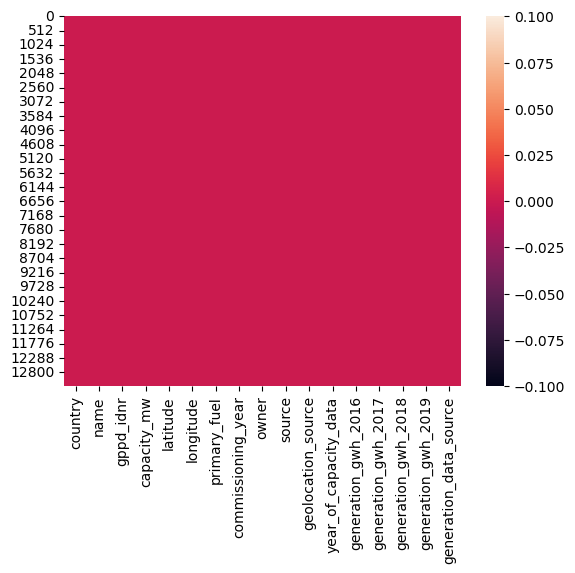

In [359]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [360]:
df['primary_fuel'].value_counts()

primary_fuel
Solar           5484
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

Here, we observe class imbalance in the target variable class, which necessitates to treat.

In [361]:
df

country                           name   gppd_idnr  capacity_mw  \
0         IND               ACME Solar Tower  WRI1020239          2.5   
1         IND            ADITYA CEMENT WORKS  WRI1019881         98.0   
2         IND       AES Saurashtra Windfarms  WRI1026669         39.2   
3         IND                    AGARTALA GT  IND0000001        135.0   
4         IND                   AKALTARA TPP  IND0000002       1800.0   
...       ...                            ...         ...          ...   
13293     USA       Zotos International WPGF  USA0057648          3.4   
13294     USA  Zumbro Community Solar Garden  USA0061574          1.0   
13295     USA            Zumbro Solar Garden  USA0063426          0.0   
13296     USA                           Zuni  USA0000478          0.0   
13297     USA            eBay - South Jordan  USA0059281          9.8   

       latitude  longitude primary_fuel  commissioning_year  \
0       28.1839    73.2407        Solar          2011.00000   
1       24.7663    74.6090         Coal          2008.00000   
2       21.9038    69.3732         Wind          2008.00000   
3       23.8712    91.3602          Gas          2004.00000   
4       21.9603    82.4091         Coal          2015.00000   
...         ...        ...          ...                 ...   
13293   42.8869   -76.9683         Wind          2012.00000   
13294   44.3195   -92.6703        Solar          2018.00000   
13295   44.0460   -92.7600        Solar          2008.00000   
13296   39.7373  -105.0170        Solar          2008.00000   
13297   40.5606  -112.0478          Gas          2013.77551   

                               owner                                  source  \
0                        Solar Paces    National Renewable Energy Laboratory   
1               Ultratech Cement ltd                    Ultratech Cement ltd   
2                                AES                                     CDM   
3           Cypress Creek Renewables           Central Electricity Authority   
4           Cypress Creek Renewables           Central Electricity Authority   
...                              ...                                     ...   
13293            Zotos International  U.S. Energy Information Administration   
13294               Zumbro Solar LLC  U.S. Energy Information Administration   
13295              Zumbro Garden LLC  U.S. Energy Information Administration   
13296  Public Service Co of Colorado  U.S. Energy Information Administration   
13297                   Bloom Energy  U.S. Energy Information Administration   

                           geolocation_source  year_of_capacity_data  \
0        National Renewable Energy Laboratory                 2019.0   
1                                         WRI                 2019.0   
2                                         WRI                 2019.0   
3                                         WRI                 2019.0   
4                                         WRI                 2019.0   
...                                       ...                    ...   
13293  U.S. Energy Information Administration                 2019.0   
13294  U.S. Energy Information Administration                 2019.0   
13295  U.S. Energy Information Administration                 2019.0   
13296  U.S. Energy Information Administration                 2019.0   
13297  U.S. Energy Information Administration                 2019.0   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                15.410278            13.433861            12.308500   
1                15.410278            13.433861            12.308500   
2                15.410278            13.433861            12.308500   
3               886.004428           663.774500           626.239128   
4              6243.000000          5385.579736          7279.000000   
...                    ...                  ...                  ...   
13293             1.670000             1.2

# 3. Data Visualization

# 1.Univariate Analysis-

In [ ]:
plt.figure(figsize=(30,25))
plotnumber=1

for i in df.columns:
    if plotnumber<=18:
        ax=plt.subplot(7,5,plotnumber)
        sns.histplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show() 

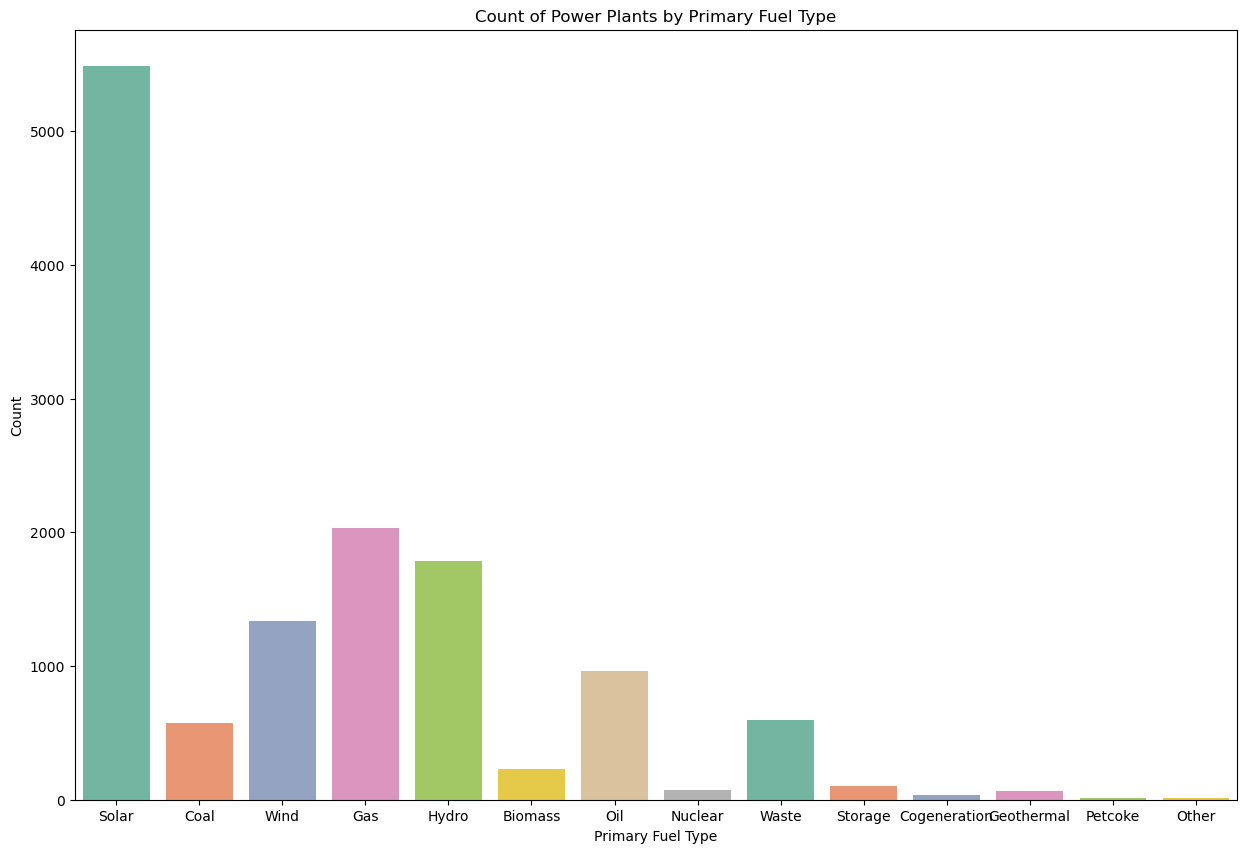

In [67]:
plt.figure(figsize=(15, 10))
sns.countplot(x='primary_fuel', data=df, palette='Set2')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.title('Count of Power Plants by Primary Fuel Type')
plt.show()


Here, it's evident that the majority of power plants rely on solar, gas and hydro as their primary fuel sources.

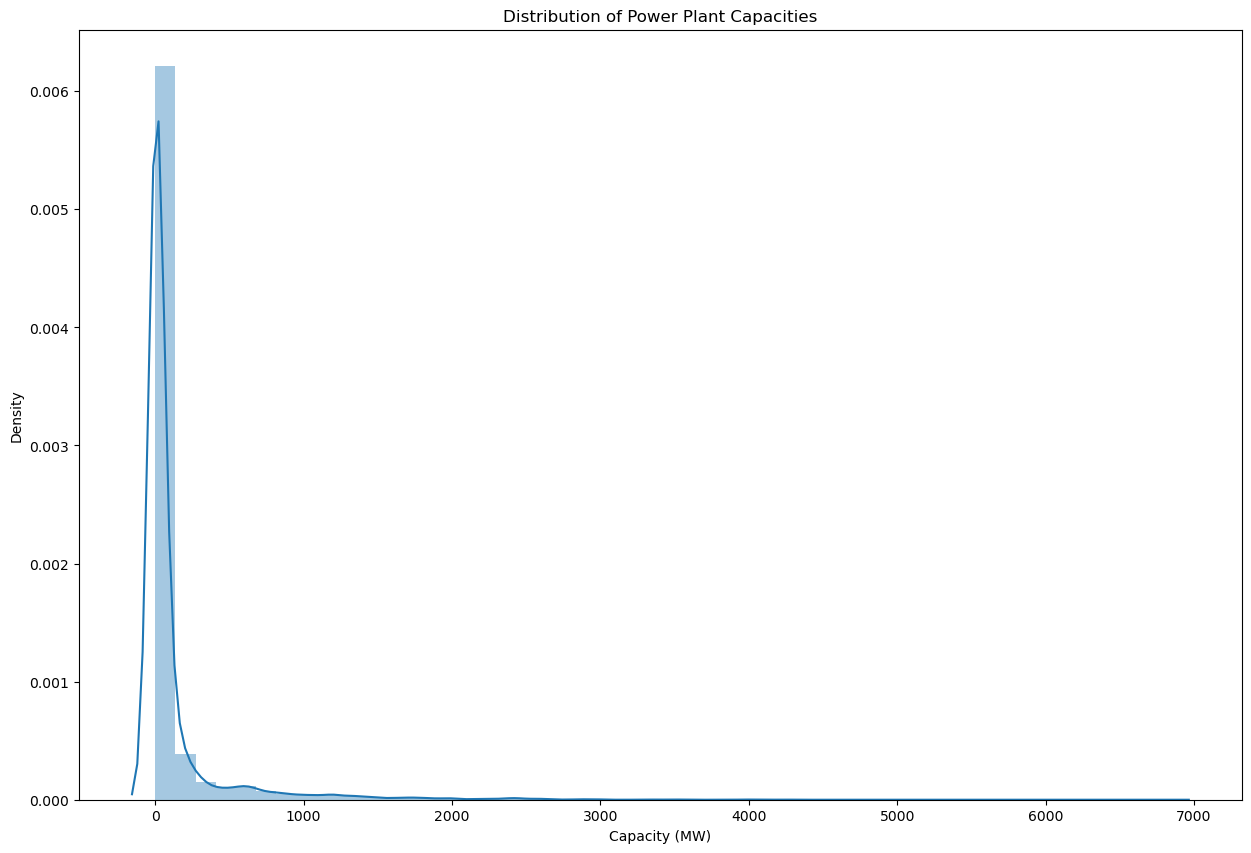

In [68]:
plt.figure(figsize=(15, 10))
sns.distplot(df['capacity_mw'], kde=True)
plt.xlabel('Capacity (MW)')
plt.ylabel('Density')
plt.title('Distribution of Power Plant Capacities')
plt.show()


The majority of plants have capacities ranging from 0 to 2000 MW, although there are outliers in this category as well.

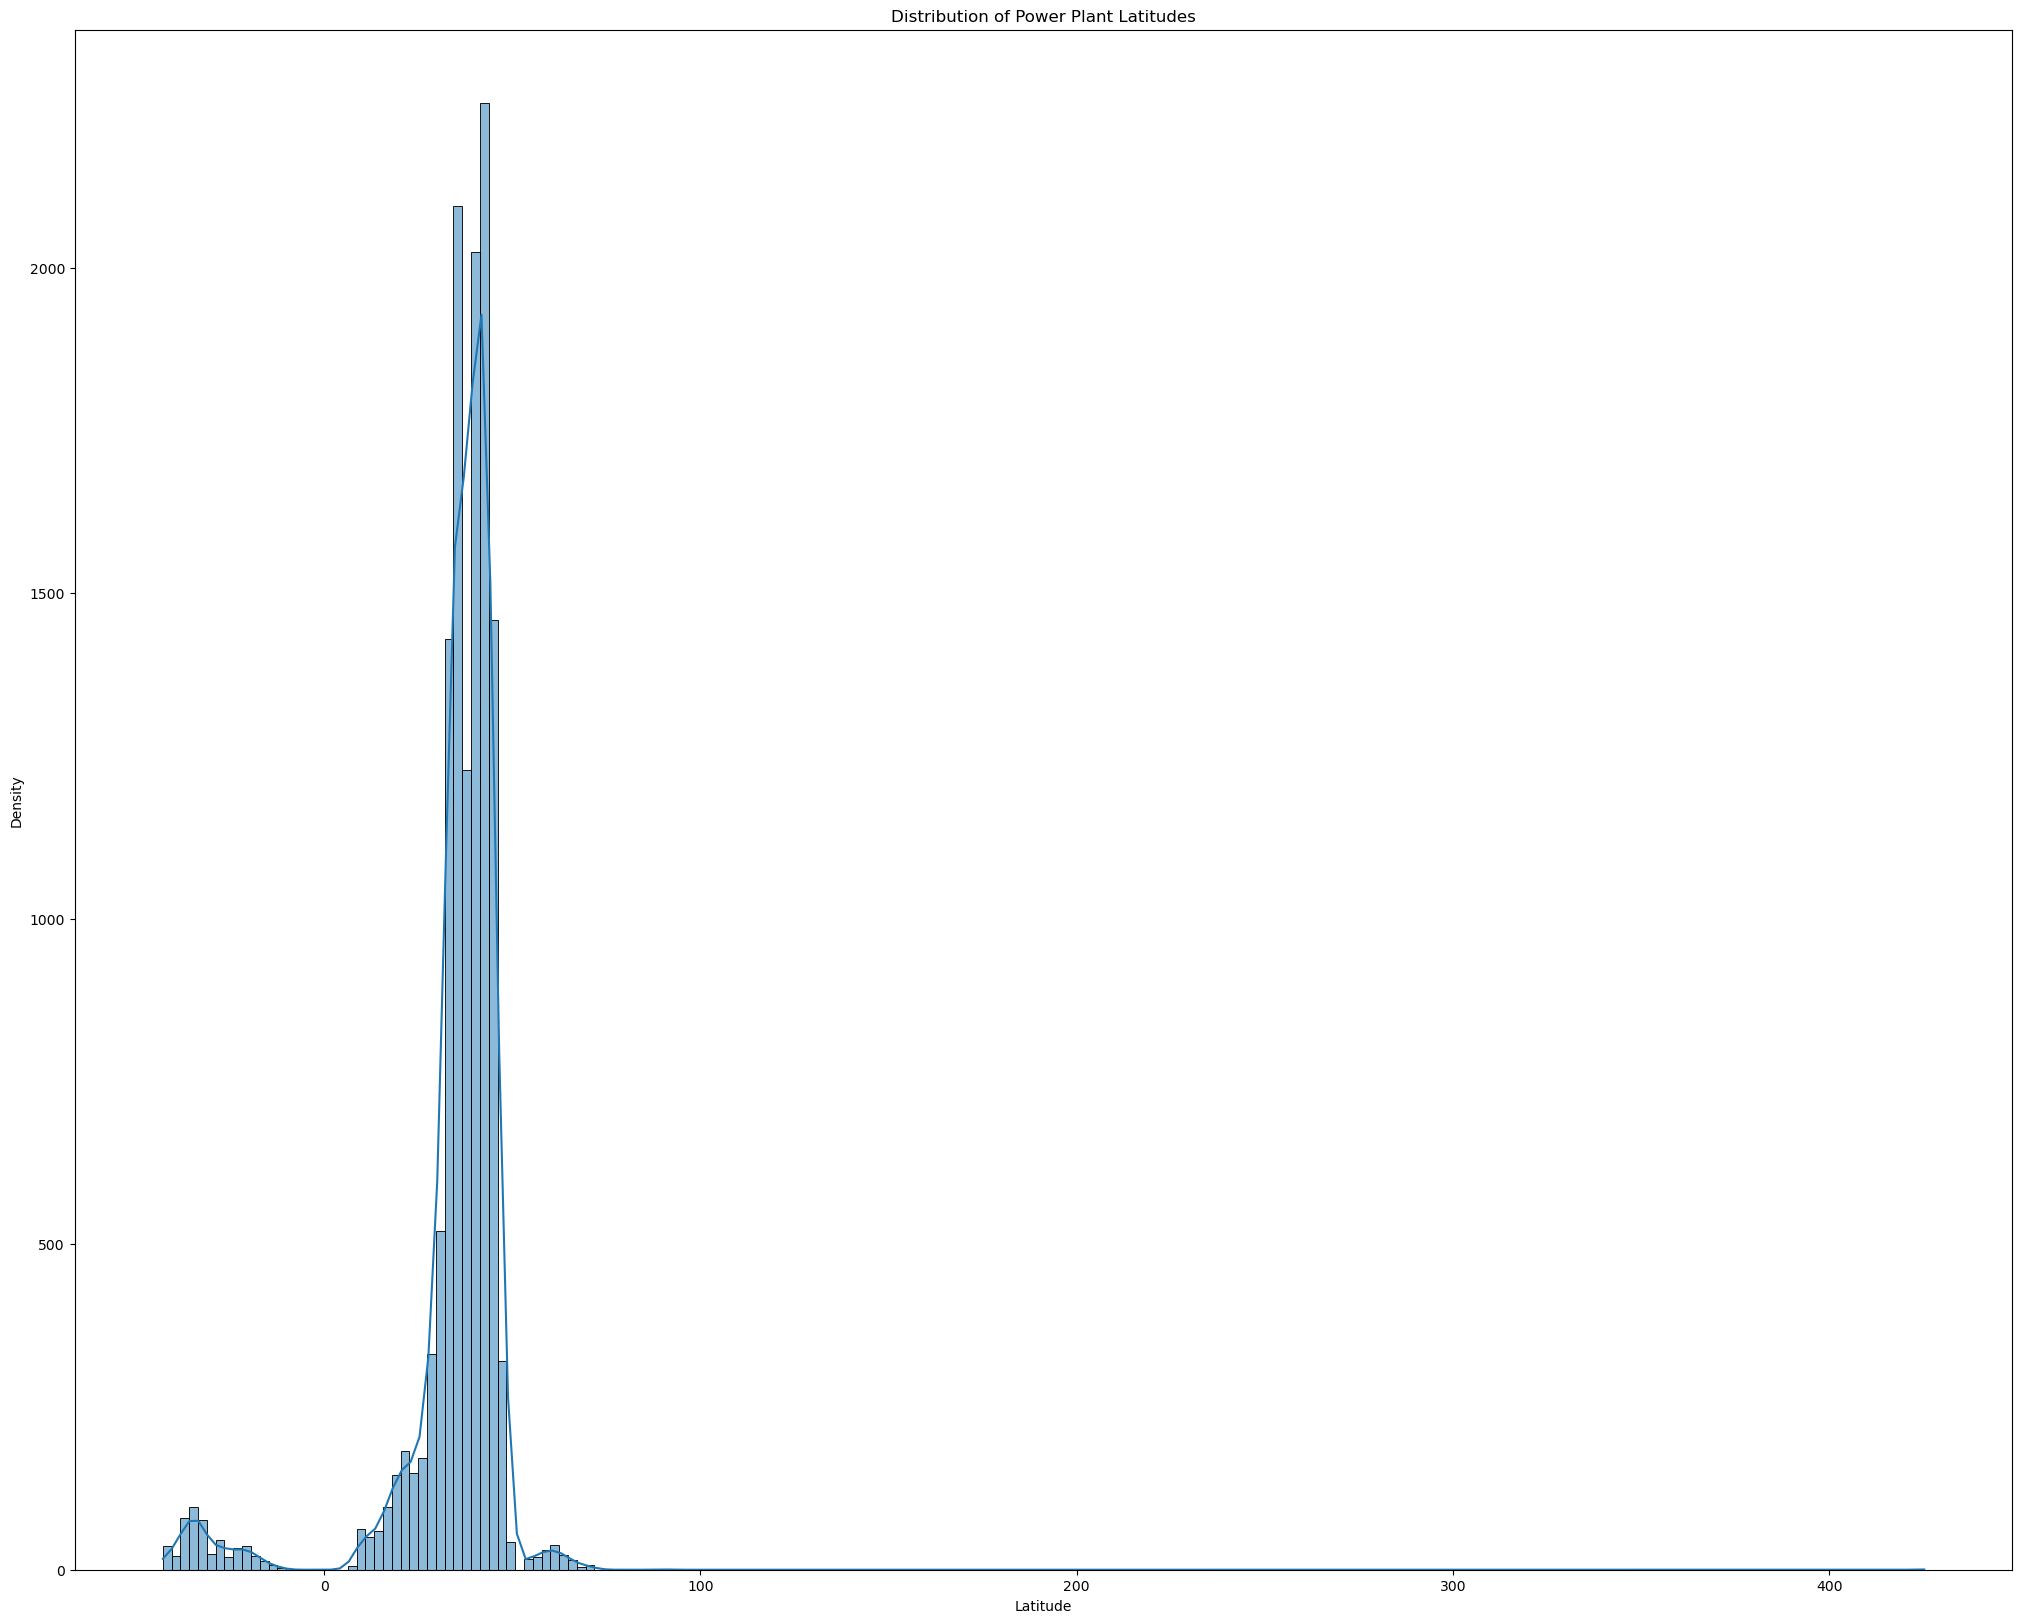

In [74]:
plt.figure(figsize=(25, 20))
sns.histplot(df['latitude'], bins=200,kde=True)
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.title('Distribution of Power Plant Latitudes')
plt.show()


<Axes: xlabel='latitude', ylabel='Count'>

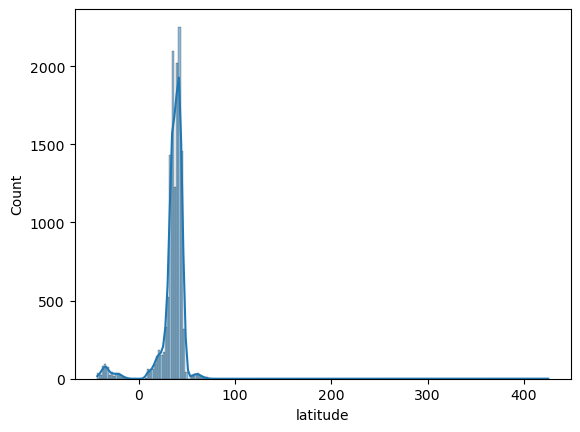

In [75]:
sns.histplot(df['latitude'], bins=200,kde=True)

Here, we observe that the latitude falls within the range of 0 to 100 decimal degrees.

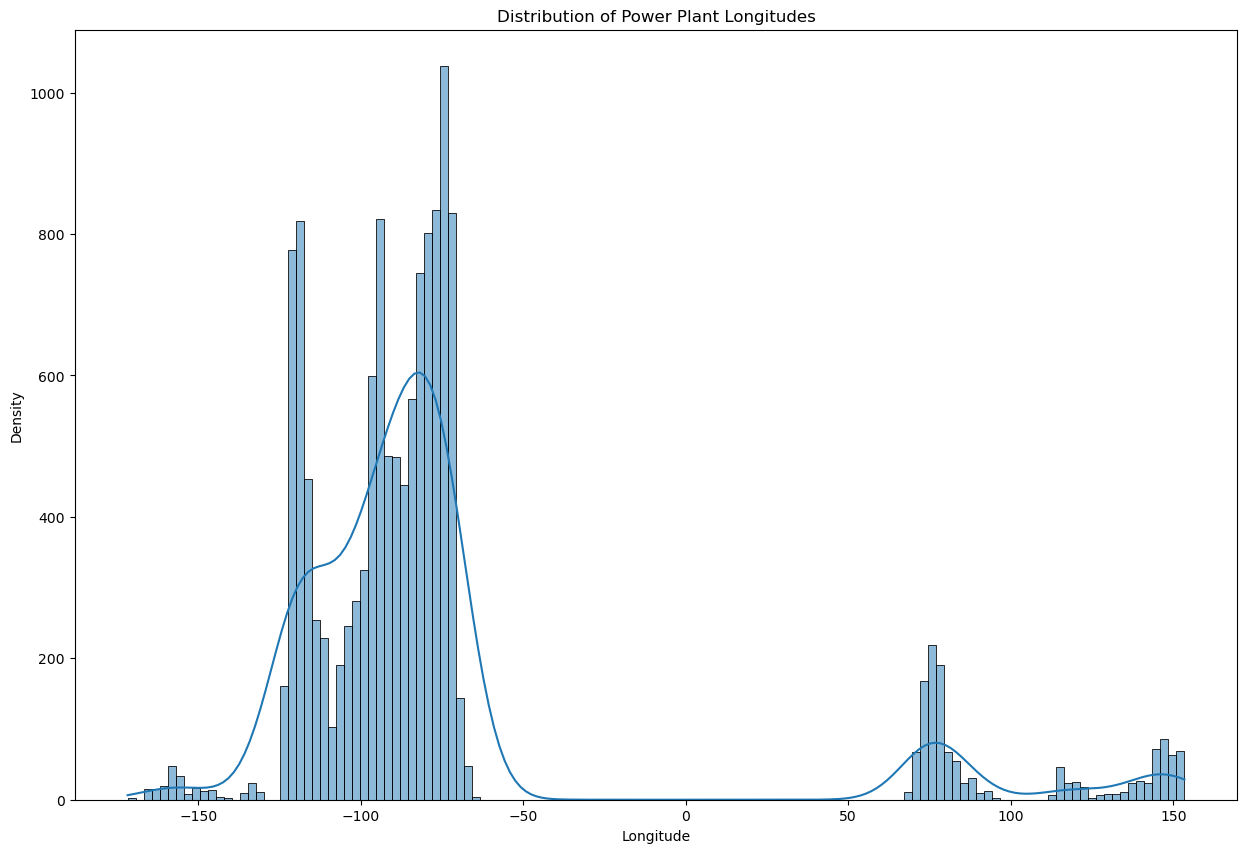

In [77]:
plt.figure(figsize=(15, 10))
sns.histplot(df['longitude'], kde=True)
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.title('Distribution of Power Plant Longitudes')
plt.show()


Here, we note that the longitude falls within the range of -150 to 150 decimal degrees.

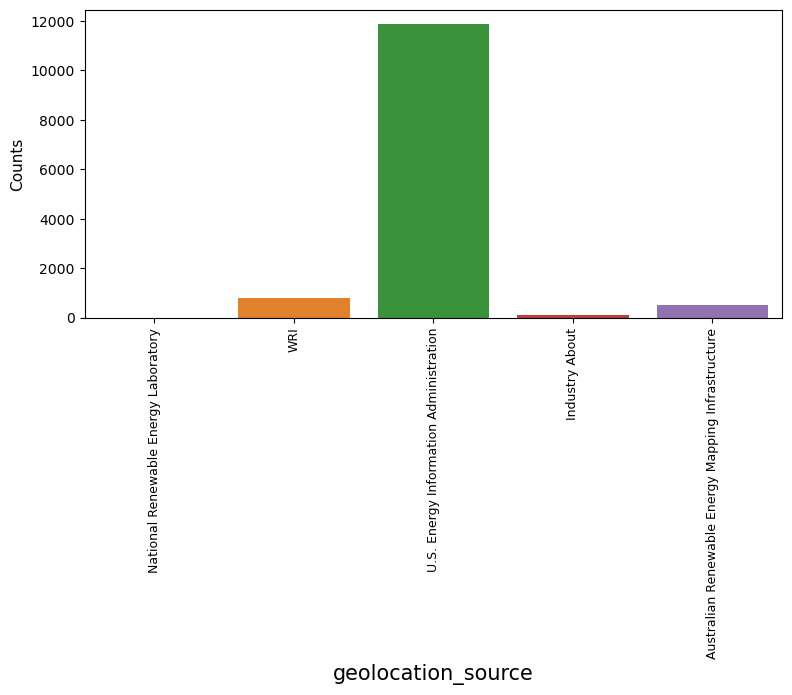

In [82]:
plt.figure(figsize=(9,4))
sns.countplot(x='geolocation_source', data=df)
plt.xlabel('geolocation_source', fontsize= 15)
plt.ylabel('Counts', fontsize= 11)
plt.xticks(fontsize= 9, rotation=90)
plt.show()


Here we can say that most of the plant's geolocation sources are U.S. Energy Information Administration	.

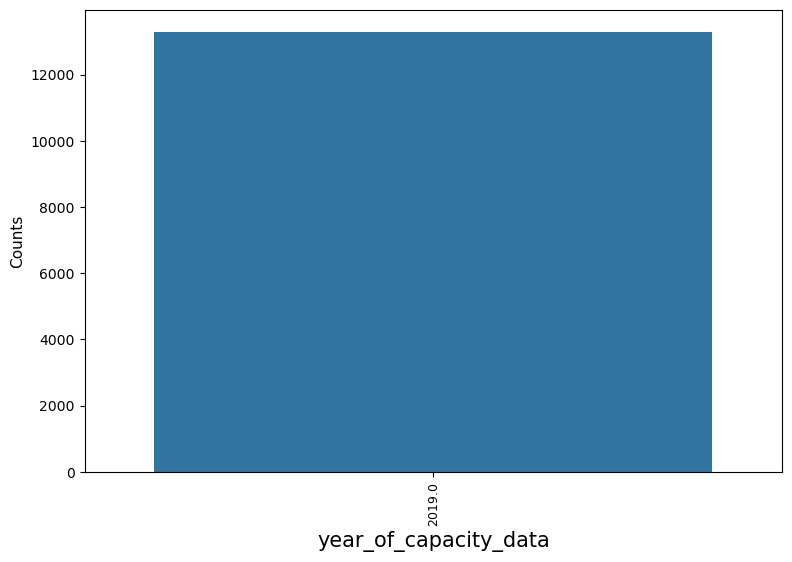

In [84]:
plt.figure(figsize=(9, 6))
sns.countplot(x='year_of_capacity_data', data=df)
plt.xlabel('year_of_capacity_data', fontsize=15)
plt.ylabel('Counts', fontsize=11)
plt.xticks(fontsize=9, rotation=90)
plt.show()


In 2019, capacity information for all power plants was reported exclusively.That's why I intend to remove this column since it isn't providing any valuable information.

In [362]:
df.drop('year_of_capacity_data', axis=1, inplace=True)

In [363]:
df['name'].value_counts()

name
Richland                      3
Central Utility Plant         2
Clover                        2
Newport                       2
Unknown                       2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: count, Length: 13266, dtype: int64

In [364]:
df['gppd_idnr'].value_counts()

gppd_idnr
WRI1020239    1
USA0062255    1
USA0006180    1
USA0057489    1
USA0061333    1
             ..
USA0006378    1
USA0000840    1
USA0050818    1
USA0062324    1
USA0059281    1
Name: count, Length: 13298, dtype: int64

we can see each row contains almost unique data, these columns are unlikely to provide valuable information. Therefore, we'll proceed to drop them.

In [365]:
df.drop('name', axis=1, inplace=True)
df.drop('gppd_idnr', axis=1, inplace=True)

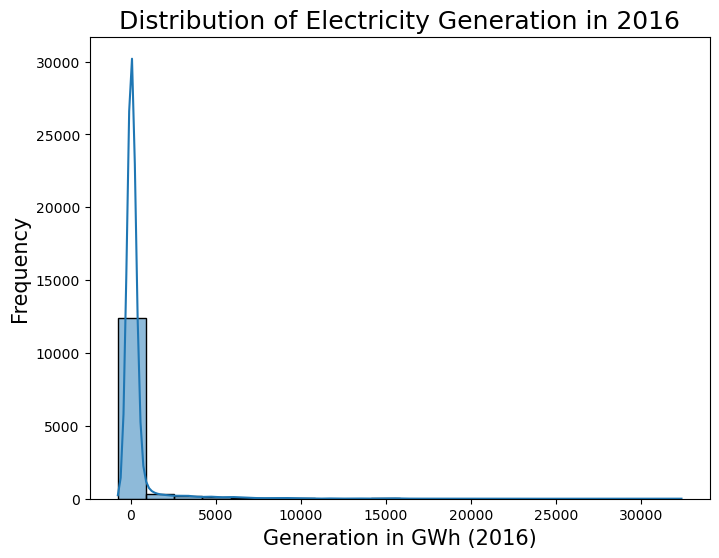

In [103]:
plt.figure(figsize=(8, 6))
sns.histplot(df['generation_gwh_2016'],bins=20, kde=True)
plt.xlabel('Generation in GWh (2016)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Electricity Generation in 2016', fontsize=18)
plt.show()

Most of the power plant's electricity generation in year 2016 is in the range of 0 to 5000 gigawatt-hours and the maximum 37,000 gigawatt-hours attained.

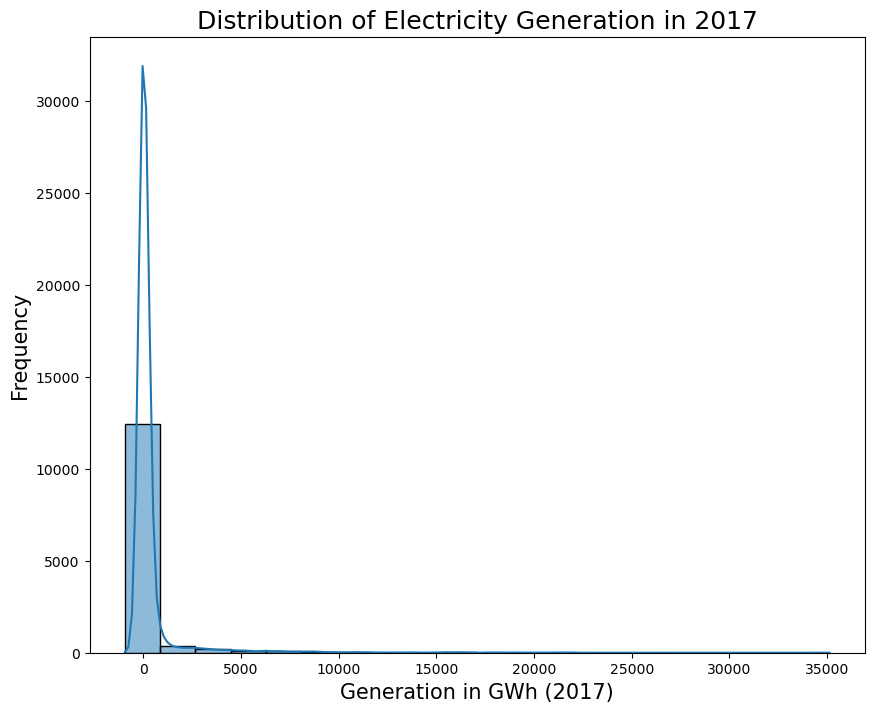

In [104]:
plt.figure(figsize=(10, 8))
sns.histplot(df['generation_gwh_2017'],bins=20, kde=True)
plt.xlabel('Generation in GWh (2017)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Electricity Generation in 2017', fontsize=18)
plt.show()

Most of the power plant's electricity generation in year 2017 is in the range of 0 to 5000 gigawatt-hours and the maximum 35,000 gigawatt-hours attained.

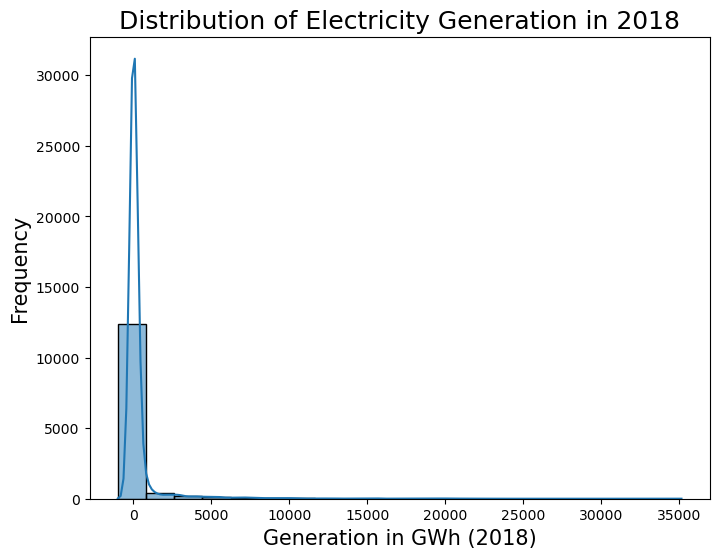

In [99]:
plt.figure(figsize=(8, 6))
sns.histplot(df['generation_gwh_2018'],bins=20, kde=True)
plt.xlabel('Generation in GWh (2018)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Electricity Generation in 2018', fontsize=18)
plt.show()

Most of the power plant's electricity generation in year 2018 is in the range of 0 to 5000 gigawatt-hours and the maximum 35,000 gigawatt-hours attained.

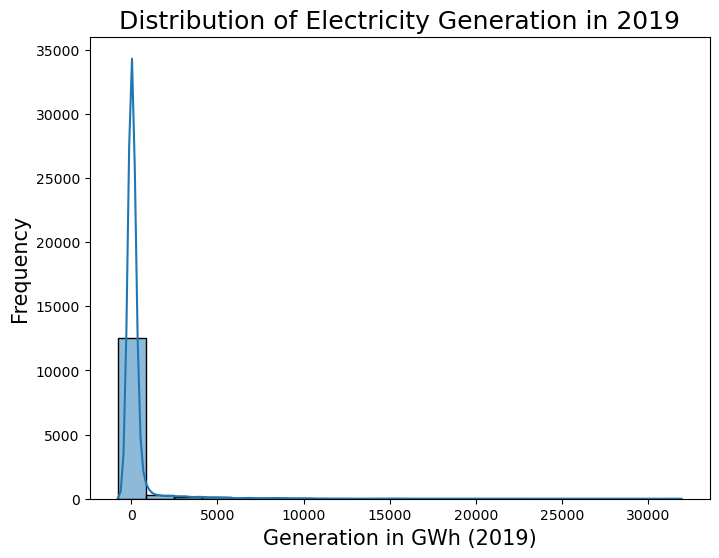

In [100]:
plt.figure(figsize=(8, 6))
sns.histplot(df['generation_gwh_2019'],bins=20, kde=True)
plt.xlabel('Generation in GWh (2019)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Electricity Generation in 2019', fontsize=18)
plt.show()

Most of the power plant's electricity generation in year 2019 is in the range of 0 to 5000 gigawatt-hours and the maximum 38,000 gigawatt-hours attained.

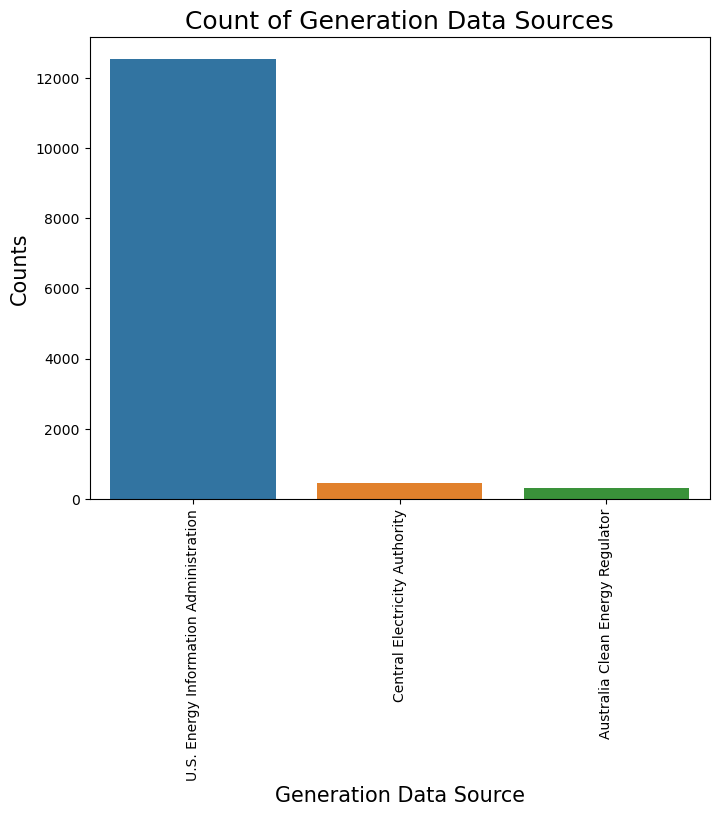

In [107]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['generation_data_source'])
plt.xlabel('Generation Data Source', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Count of Generation Data Sources', fontsize=18)
plt.xticks(rotation=90)
plt.show()


The majority of the generation data is sourced from the U.S. Energy Information Administration.

# 2.Bivariate Analysis-

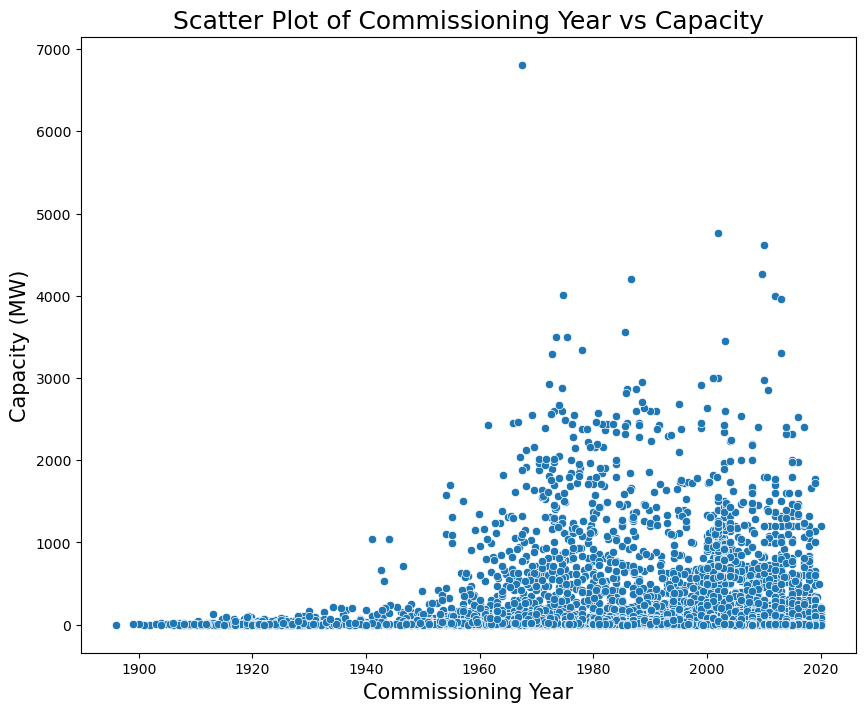

In [109]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='commissioning_year', y='capacity_mw', data=df)
plt.xlabel('Commissioning Year', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('Scatter Plot of Commissioning Year vs Capacity', fontsize=18)
plt.show()


As the number of commissioning years rises, there is also an observable increase in capacity_mw.

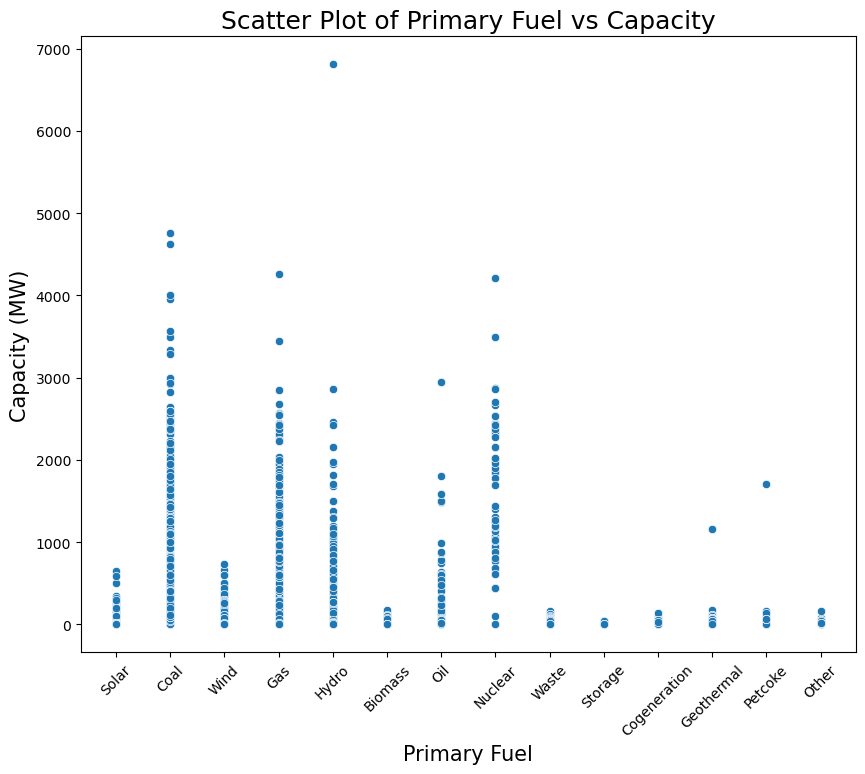

In [110]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Primary Fuel', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('Scatter Plot of Primary Fuel vs Capacity', fontsize=18)
plt.xticks(rotation=45)
plt.show()


Power plants that primarily utilize coal as their fuel tend to have higher capacities.

<Figure size 1000x800 with 0 Axes>

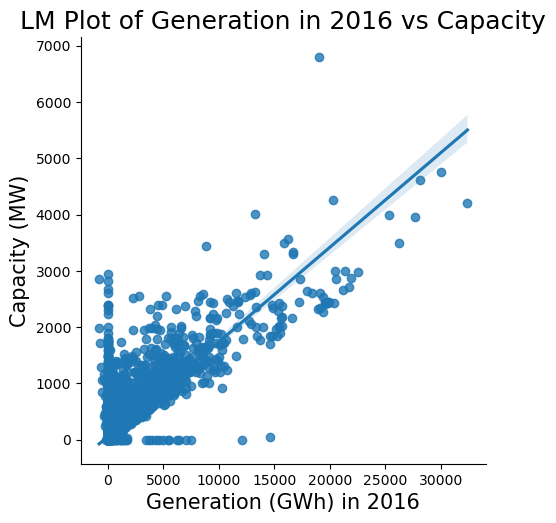

In [112]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='generation_gwh_2016', y='capacity_mw', data=df)
plt.xlabel('Generation (GWh) in 2016', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('LM Plot of Generation in 2016 vs Capacity', fontsize=18)
plt.show()


<Figure size 1000x800 with 0 Axes>

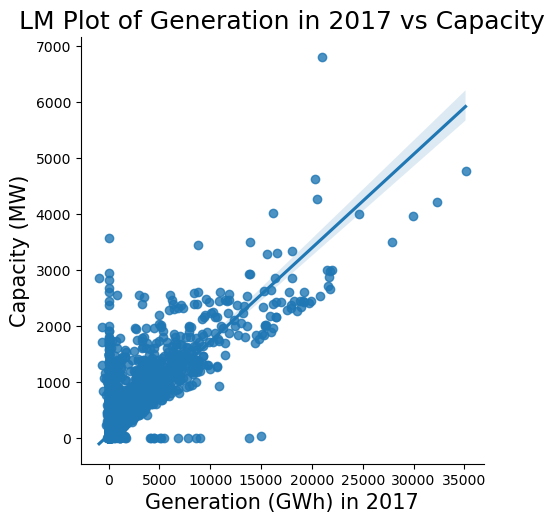

In [113]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='generation_gwh_2017', y='capacity_mw', data=df)
plt.xlabel('Generation (GWh) in 2017', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('LM Plot of Generation in 2017 vs Capacity', fontsize=18)
plt.show()


<Figure size 1000x800 with 0 Axes>

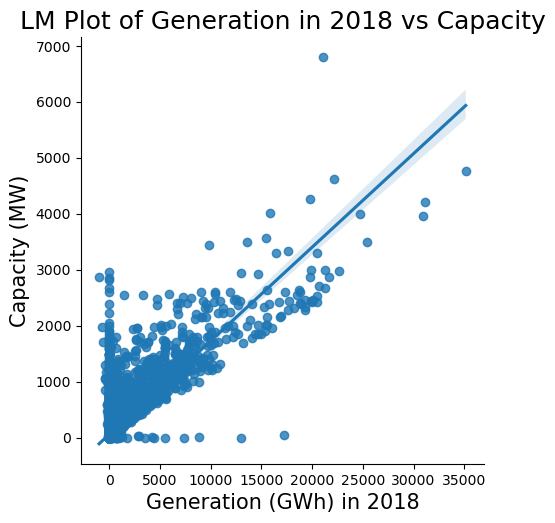

In [114]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='generation_gwh_2018', y='capacity_mw', data=df)
plt.xlabel('Generation (GWh) in 2018', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('LM Plot of Generation in 2018 vs Capacity', fontsize=18)
plt.show()


<Figure size 1000x800 with 0 Axes>

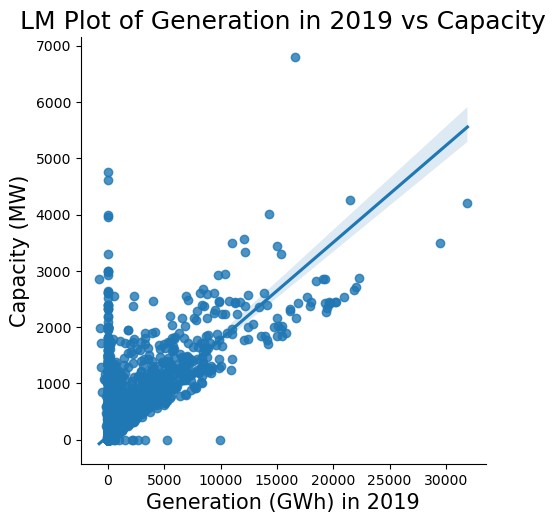

In [115]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='generation_gwh_2019', y='capacity_mw', data=df)
plt.xlabel('Generation (GWh) in 2019', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('LM Plot of Generation in 2019 vs Capacity', fontsize=18)
plt.show()


We observe a correlation between increased capacity and higher electricity generation in 2016,2017,2018,2019.

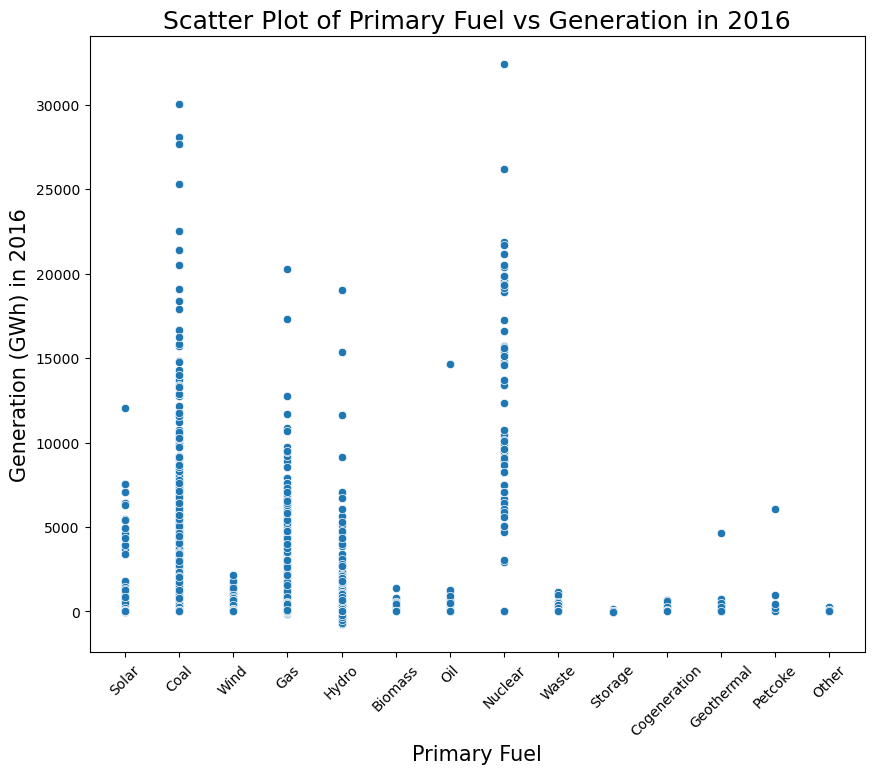

In [116]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2016', data=df)
plt.xlabel('Primary Fuel', fontsize=15)
plt.ylabel('Generation (GWh) in 2016', fontsize=15)
plt.title('Scatter Plot of Primary Fuel vs Generation in 2016', fontsize=18)
plt.xticks(rotation=45)
plt.show()


In 2016, power plants that rely on coal as their primary fuel source achieved higher levels of electricity generation.

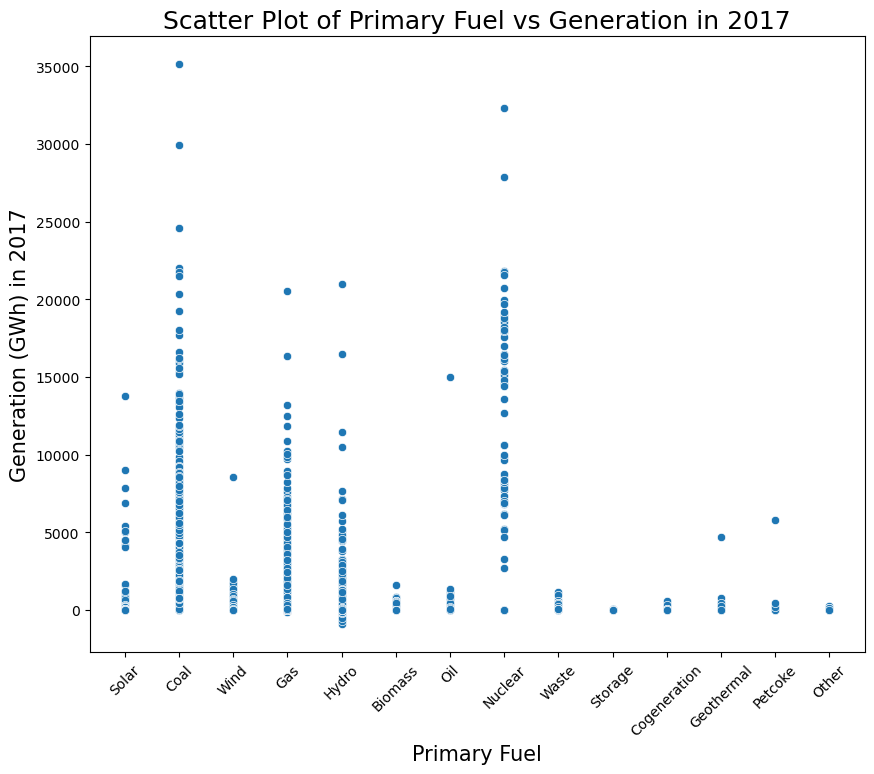

In [117]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2017', data=df)
plt.xlabel('Primary Fuel', fontsize=15)
plt.ylabel('Generation (GWh) in 2017', fontsize=15)
plt.title('Scatter Plot of Primary Fuel vs Generation in 2017', fontsize=18)
plt.xticks(rotation=45)
plt.show()


In 2017, power plants that rely on coal as their primary fuel source achieved higher levels of electricity generation.

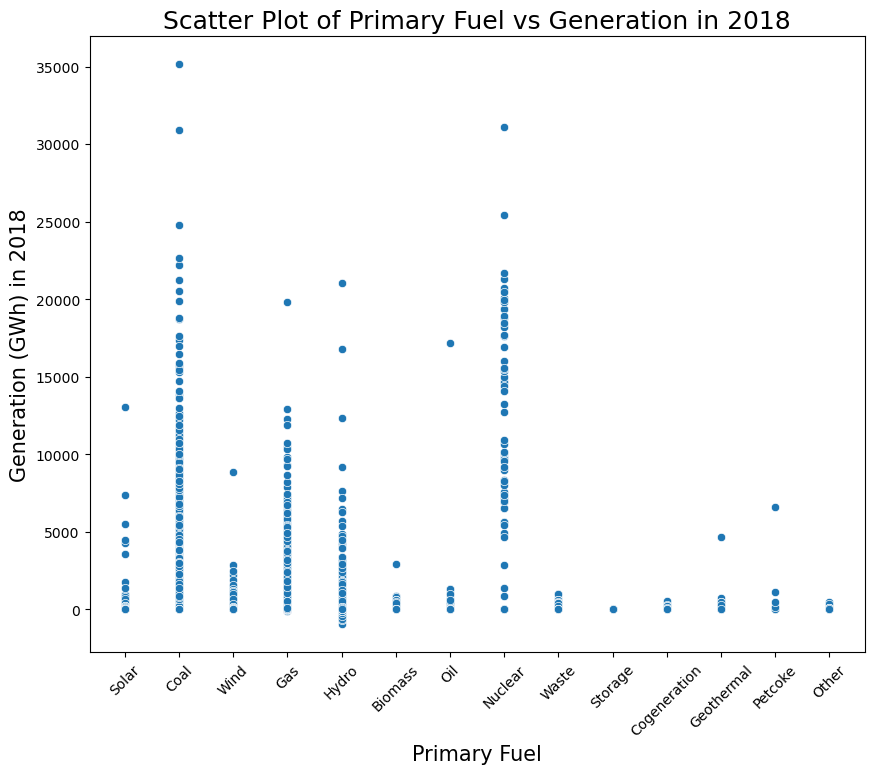

In [118]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2018', data=df)
plt.xlabel('Primary Fuel', fontsize=15)
plt.ylabel('Generation (GWh) in 2018', fontsize=15)
plt.title('Scatter Plot of Primary Fuel vs Generation in 2018', fontsize=18)
plt.xticks(rotation=45)
plt.show()


In 2018m, power plants that rely on coal as their primary fuel source achieved higher levels of electricity generation.

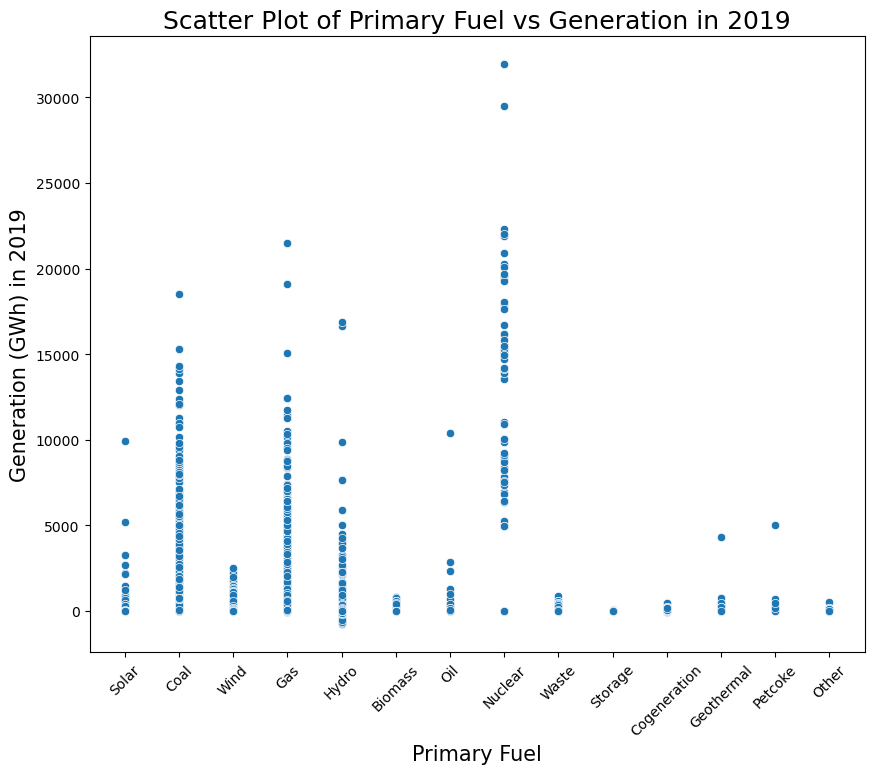

In [119]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='primary_fuel', y='generation_gwh_2019', data=df)
plt.xlabel('Primary Fuel', fontsize=15)
plt.ylabel('Generation (GWh) in 2019', fontsize=15)
plt.title('Scatter Plot of Primary Fuel vs Generation in 2019', fontsize=18)
plt.xticks(rotation=45)
plt.show()


In 2019, power plants that rely on Nuclear as their primary fuel source achieved higher levels of electricity generation.

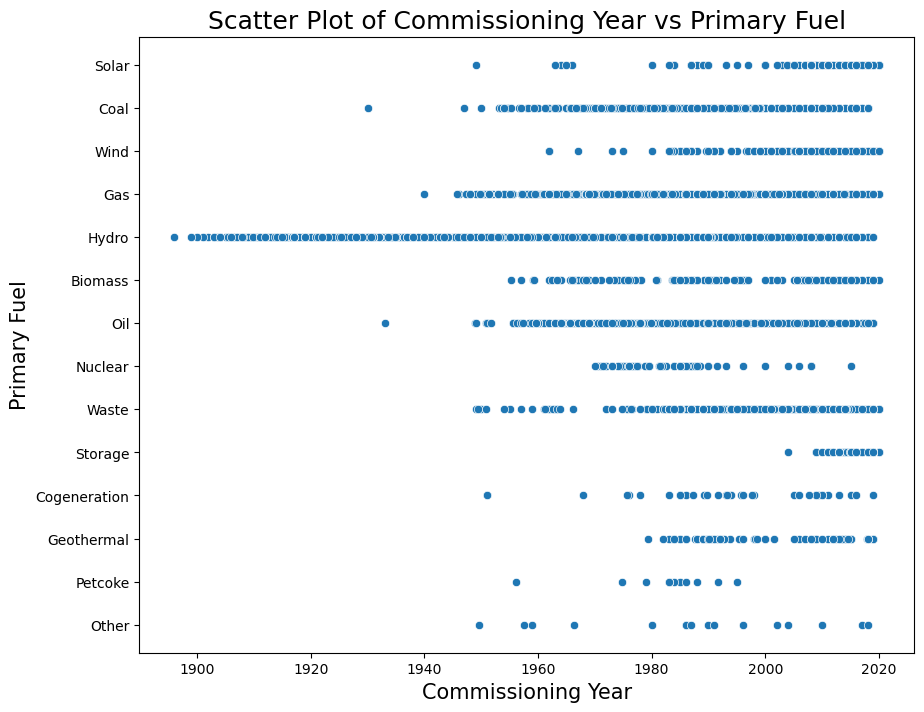

In [122]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='commissioning_year', y='primary_fuel', data=df)
plt.xlabel('Commissioning Year', fontsize=15)
plt.ylabel('Primary Fuel', fontsize=15)
plt.title('Scatter Plot of Commissioning Year vs Primary Fuel', fontsize=18)
plt.show()


After 1960, power plants transitioned from primarily using hydro as their fuel source to adopting other fuels as their primary source.

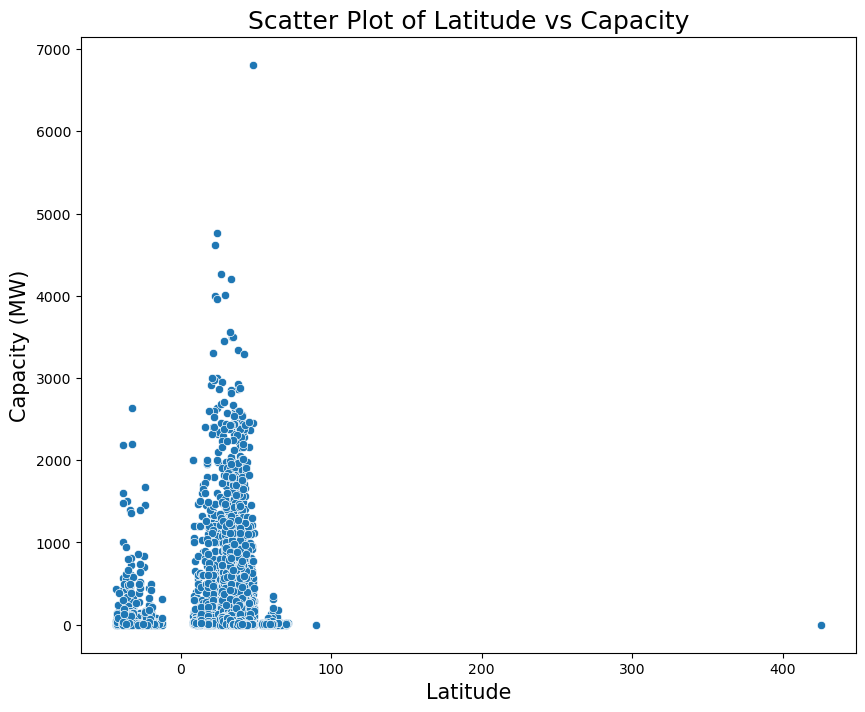

In [123]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='capacity_mw', data=df)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('Scatter Plot of Latitude vs Capacity', fontsize=18)
plt.show()


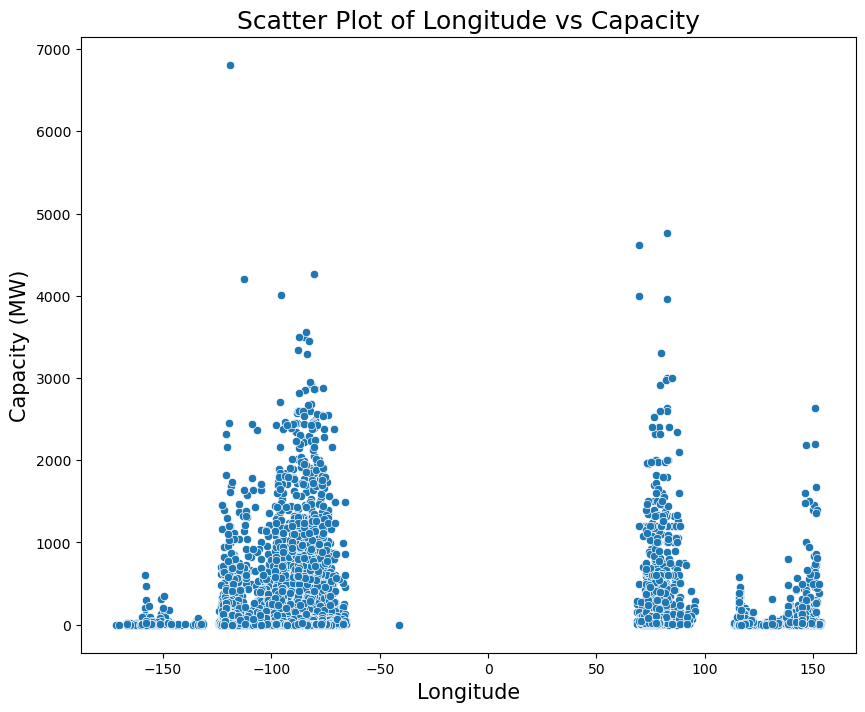

In [124]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='capacity_mw', data=df)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Capacity (MW)', fontsize=15)
plt.title('Scatter Plot of Longitude vs Capacity', fontsize=18)
plt.show()


# 3.Multivariate analysis-

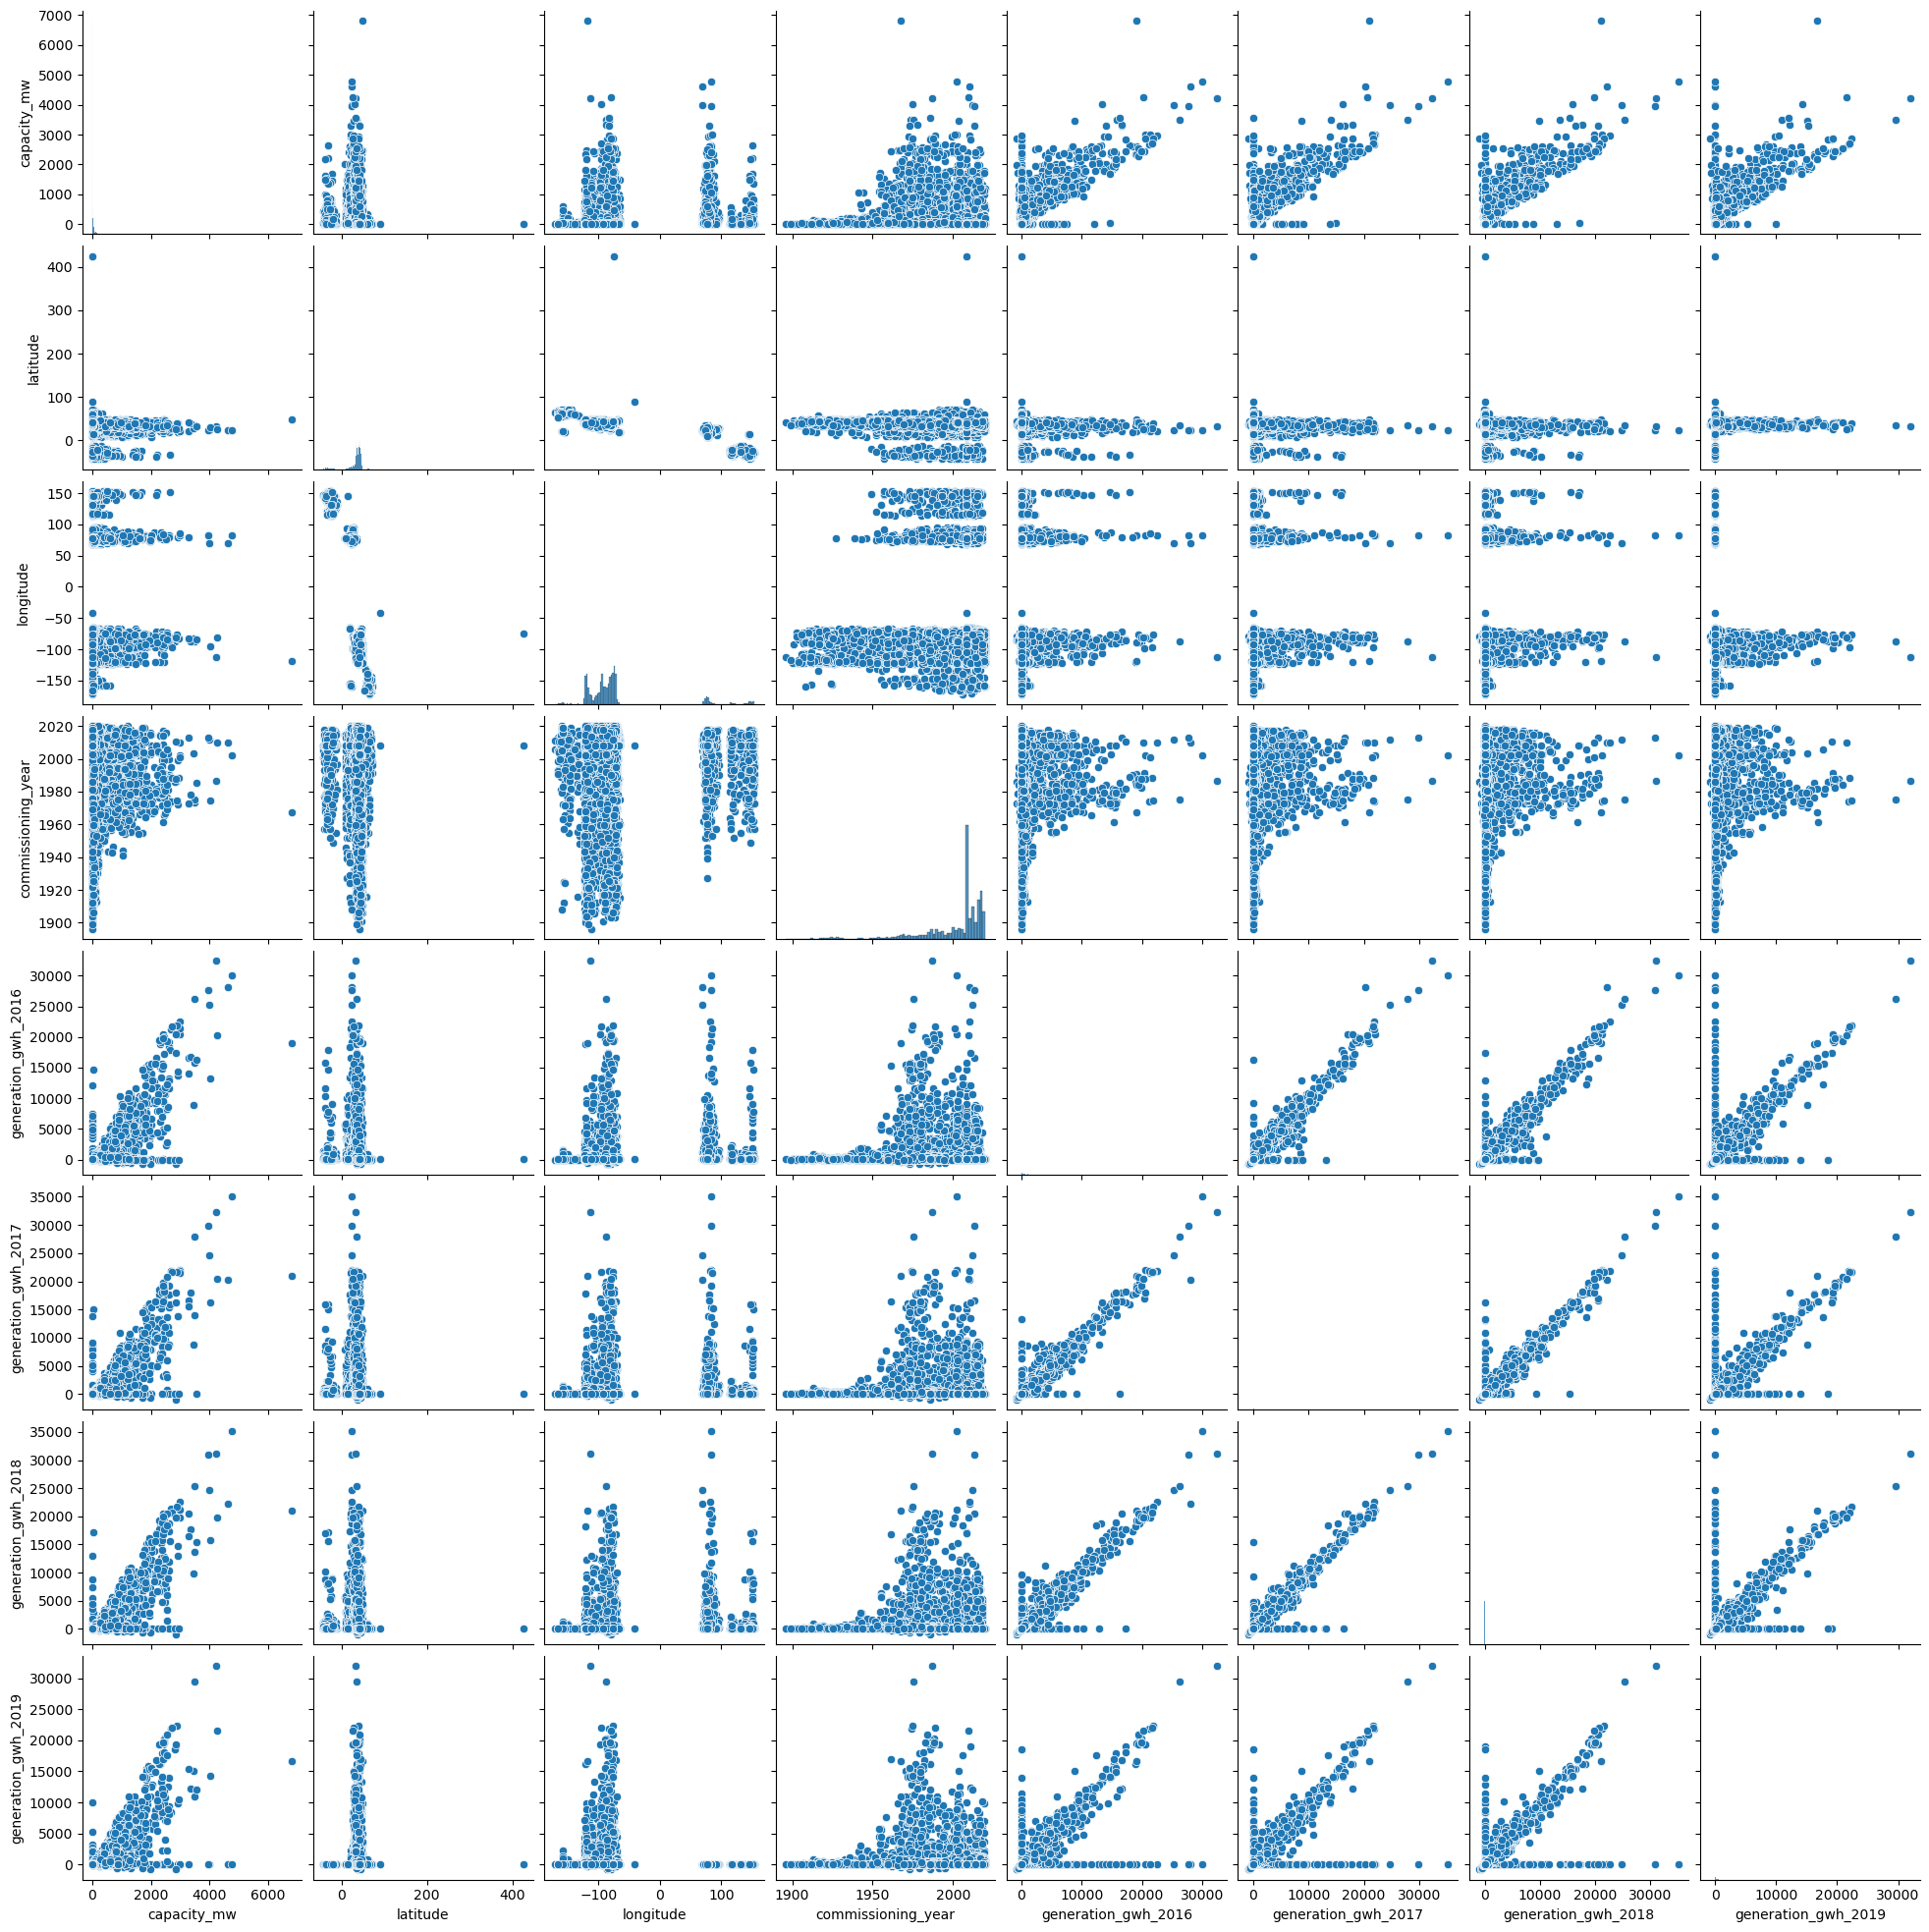

In [125]:
sns.pairplot(df)

# Observation-
- Latitude and Longitude exhibit minimal correlation with capacity_mw.
- The capacity of most power plants is primarily influenced by the use of coal as the main fuel source.
- Coal serves as the primary fuel in the majority of power plants.
- There is a notable trend of increasing capacity over commissioning years.
- Generational growth shows consistency from 2016 to 2019.

Separating numrical & categoricak data columns

In [366]:
num_col=[]

for i in df.columns:
    if df[i].dtype=='float64':
        num_col.append(i)

In [367]:
num_col

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019']

In [368]:
cat_col=[]

for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

In [369]:
cat_col

['country',
 'primary_fuel',
 'owner',
 'source',
 'geolocation_source',
 'generation_data_source']

In [370]:
num_col

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019']

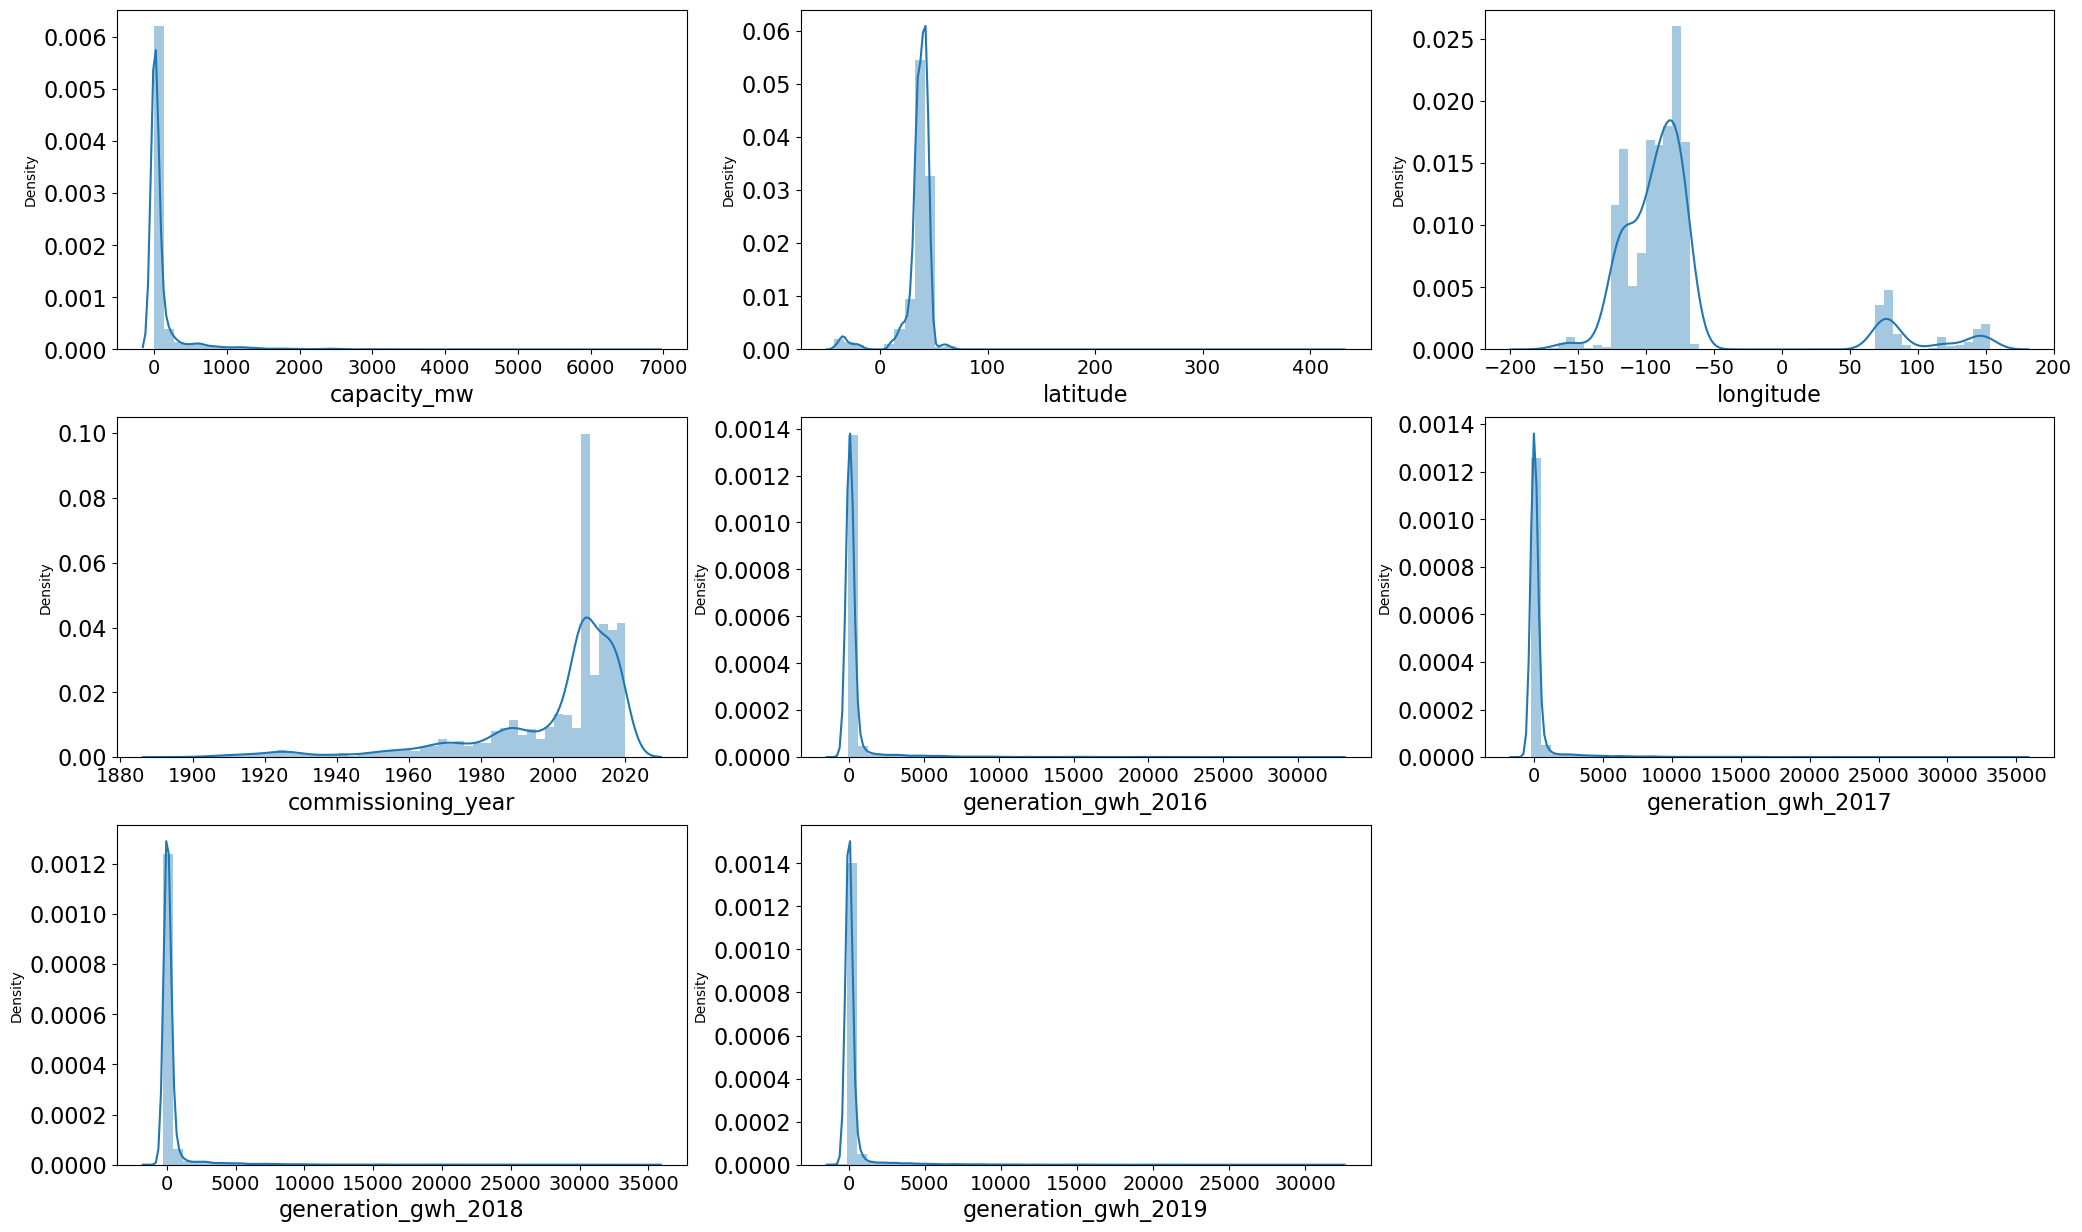

In [58]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

In [371]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

capacity_mw            5.474716
latitude              -1.864012
longitude              2.331246
commissioning_year    -2.028376
generation_gwh_2016    8.288579
generation_gwh_2017    8.365803
generation_gwh_2018    8.298002
generation_gwh_2019    8.888308
dtype: float64


# Approach_SKEW-I:-cube root method to remove skewness

In [372]:
columns_to_transform = ['capacity_mw', 'latitude', 'longitude', 
                     'commissioning_year', 'generation_gwh_2016', 
                     'generation_gwh_2017', 'generation_gwh_2018',
                     'generation_gwh_2019']
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)

In [373]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

capacity_mw            1.671162
latitude              -4.546755
longitude              2.565450
commissioning_year    -2.050994
generation_gwh_2016    2.777449
generation_gwh_2017    2.735636
generation_gwh_2018    2.672052
generation_gwh_2019    2.844992
dtype: float64


# Approach_SKEW-II:- Skewness removal through Power transformer-

In [374]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

features = ['capacity_mw', 'latitude', 'longitude', 
                     'commissioning_year', 'generation_gwh_2016', 
                     'generation_gwh_2017', 'generation_gwh_2018',
                     'generation_gwh_2019']
x = PowerTransformer(method='yeo-johnson') 

df[features] = pd.DataFrame(x.fit_transform(df[features].values))


In [375]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

capacity_mw            0.004412
latitude               1.654163
longitude              1.845704
commissioning_year    -1.011205
generation_gwh_2016   -0.482343
generation_gwh_2017   -0.566800
generation_gwh_2018   -0.602221
generation_gwh_2019   -0.552682
dtype: float64


In [376]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

capacity_mw            0.004412
latitude               1.654163
longitude              1.845704
commissioning_year    -1.011205
generation_gwh_2016   -0.482343
generation_gwh_2017   -0.566800
generation_gwh_2018   -0.602221
generation_gwh_2019   -0.552682
dtype: float64


In [377]:
df

country  capacity_mw  latitude  longitude primary_fuel  \
0         IND    -0.362457 -0.700260   2.705590        Solar   
1         IND     0.926556 -1.005944   2.705756         Coal   
2         IND     0.569529 -1.263300   2.705104         Wind   
3         IND     1.055287 -1.086271   2.707546          Gas   
4         IND     2.144616 -1.258206   2.706639         Coal   
...       ...          ...       ...        ...          ...   
13293     USA    -0.271145  0.603957   0.068373         Wind   
13294     USA    -0.612653  0.730519  -0.292859        Solar   
13295     USA    -1.689294  0.706361  -0.294880        Solar   
13296     USA    -1.689294  0.325499  -0.567024        Solar   
13297     USA     0.069545  0.398319  -0.719854          Gas   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
4                0.832517       Cypress Creek Renewables   
...                   ...                            ...   
13293            0.589137            Zotos International   
13294            1.091282               Zumbro Solar LLC   
13295            0.287023              Zumbro Garden LLC   
13296            0.287023  Public Service Co of Colorado   
13297            0.731372                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
4               Central Electricity Authority   
...                                       ...   
13293  U.S. Energy Information Administration   
13294  U.S. Energy Information Administration   
13295  U.S. Energy Information Administration   
13296  U.S. Energy Information Administration   
13297  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2016  \
0        National Renewable Energy Laboratory            -0.164251   
1                                         WRI            -0.164251   
2                                         WRI            -0.164251   
3                                         WRI             1.574914   
4                                         WRI             3.020601   
...                                       ...                  ...   
13293  U.S. Energy Information Administration            -0.649490   
13294  U.S. Energy Information Administration            -0.164251   
13295  U.S. Energy Information Administration            -0.164251   
13296  U.S. Energy Information Administration            -0.164251   
13297  U.S. Energy Information Administration             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

                       generation_data_source  
0      U.S. Energy Information Administration  
1      U.S. Energy Information Administration  
2      U.S. Energy Information Administration  
3               Central Elect

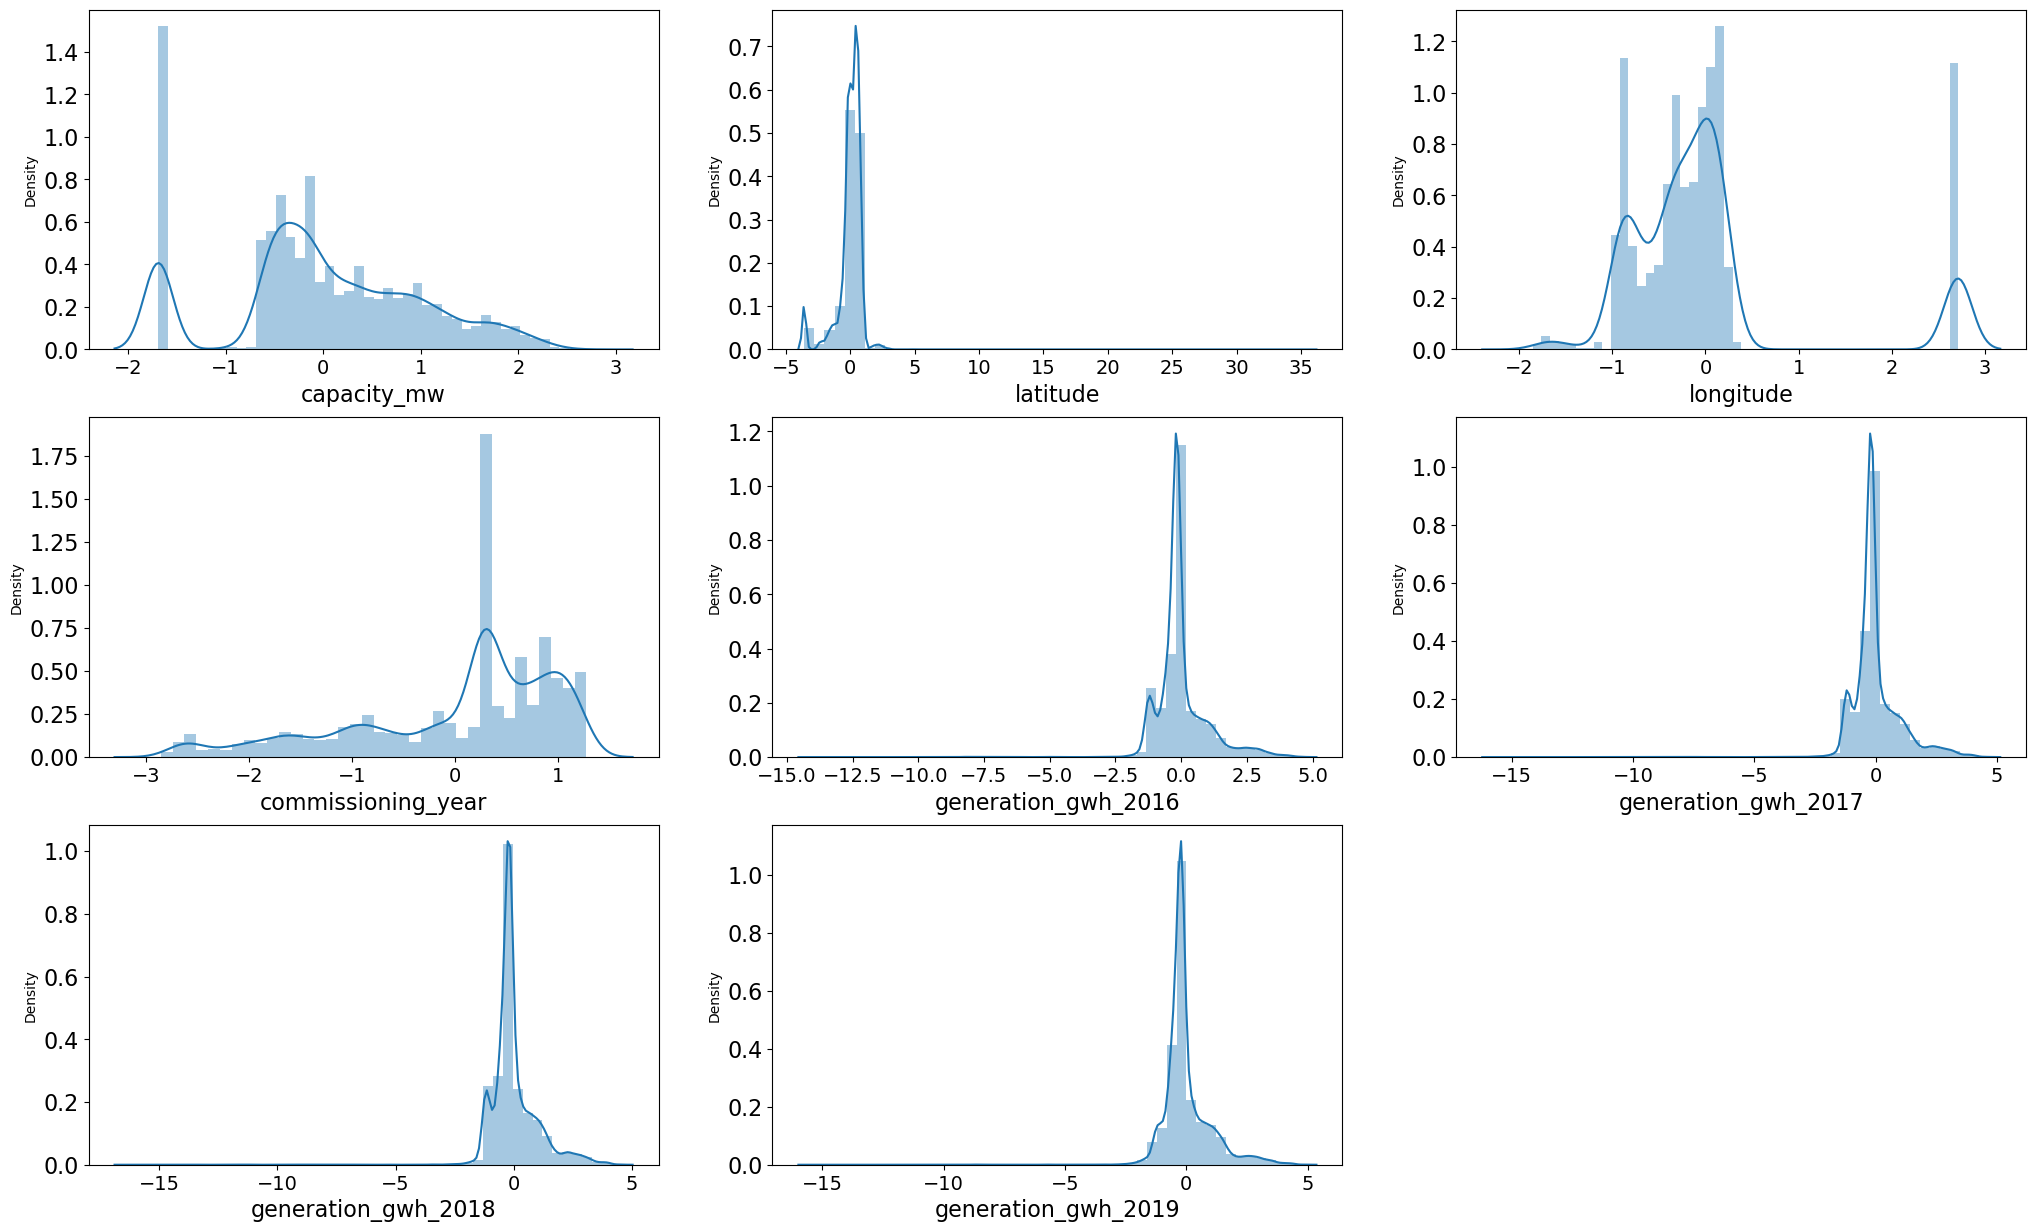

In [144]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show() 

With the implementation of the power transformer method, the skewness has been effectively eliminated.

In [145]:
# Let's examine the distribution of the data after removing skewness using the cube root method.

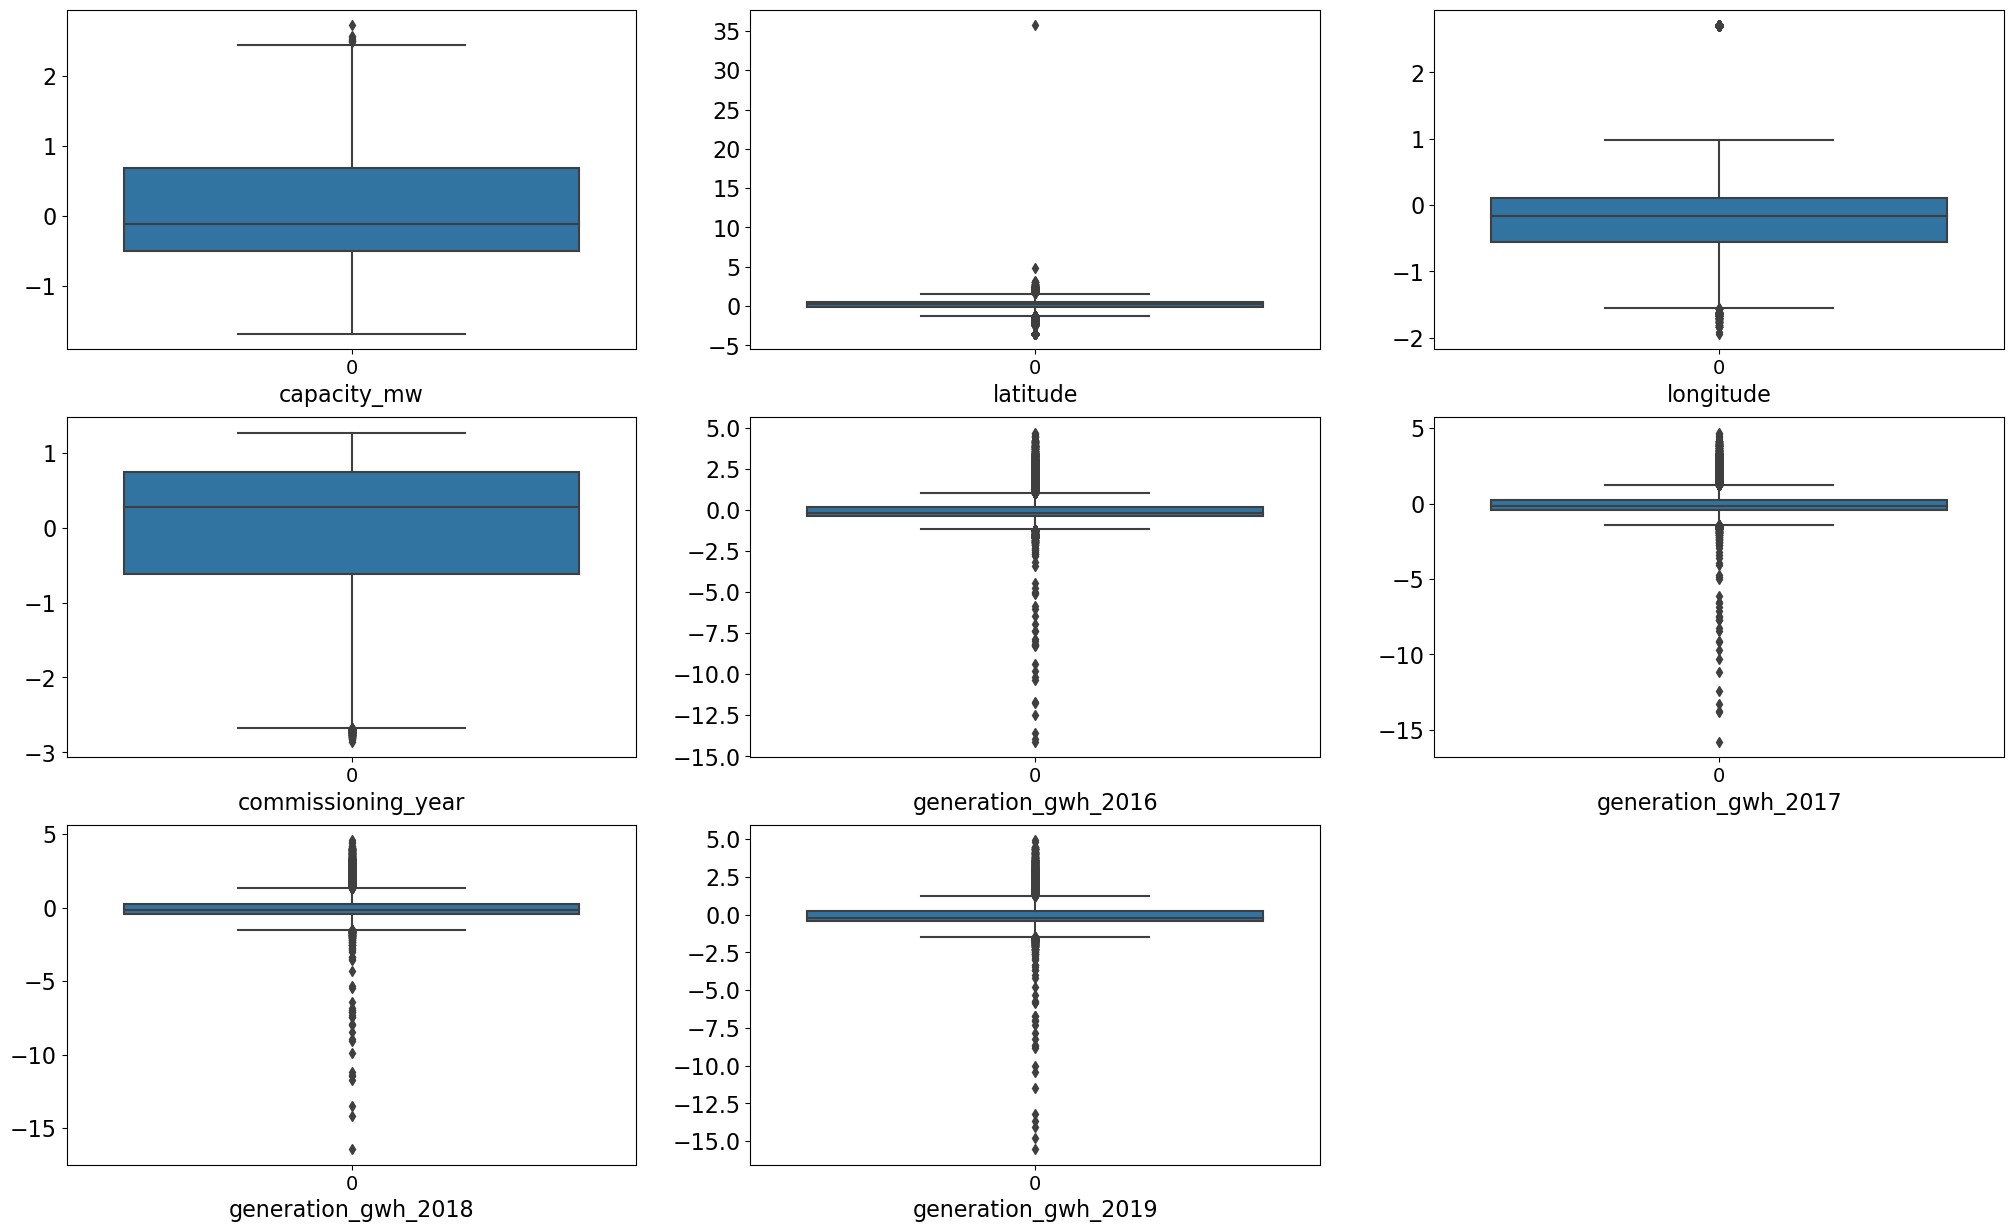

In [146]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

Outliers are present in columns such as latitude, longitude, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, and generation_gwh_2019.

# Approach_Outlier-I:-Removing outliers using the IQR method.

In [378]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)

In [379]:
# latitude

In [380]:
high_latitude=(q3['latitude']+(1.5*IQR['latitude']))


index=np.where(df['latitude']> high_latitude)

df1=df.drop(df.index[index])

In [381]:
latitude_low = q1['latitude'] - (1.5 * IQR['latitude'])

index = np.where(df['latitude'] < latitude_low)


df1 = df.drop(df.index[index])


In [382]:
# longitude

In [383]:
longitude_low = q1['longitude'] - (1.5 * IQR['longitude'])

index = np.where(df['longitude'] < longitude_low)


df1 = df.drop(df.index[index])


In [384]:
# generation_gwh_2016

In [385]:
high_generation_gwh_2016=(q3['generation_gwh_2016']+(1.5*IQR['generation_gwh_2016']))


index=np.where(df['generation_gwh_2016']> high_generation_gwh_2016)

df1=df.drop(df.index[index])

In [386]:
generation_gwh_2016_low = q1['generation_gwh_2016'] - (1.5 * IQR['generation_gwh_2016'])

index = np.where(df['generation_gwh_2016'] < generation_gwh_2016_low)


df1 = df.drop(df.index[index])


In [387]:
# generation_gwh_2017

In [388]:
high_generation_gwh_2017=(q3['generation_gwh_2017']+(1.5*IQR['generation_gwh_2017']))


index=np.where(df['generation_gwh_2017']> high_generation_gwh_2017)

df1=df.drop(df.index[index])

In [389]:
generation_gwh_2017_low = q1['generation_gwh_2017'] - (1.5 * IQR['generation_gwh_2017'])

index = np.where(df['generation_gwh_2017'] < generation_gwh_2017_low)


df1 = df.drop(df.index[index])


In [390]:
# generation_gwh_2018

In [391]:
high_generation_gwh_2018=(q3['generation_gwh_2018']+(1.5*IQR['generation_gwh_2018']))


index=np.where(df['generation_gwh_2018']> high_generation_gwh_2018)

df1=df.drop(df.index[index])

In [392]:
generation_gwh_2018_low = q1['generation_gwh_2018'] - (1.5 * IQR['generation_gwh_2018'])

index = np.where(df['generation_gwh_2018'] < generation_gwh_2018_low)


df1 = df.drop(df.index[index])


In [393]:
# generation_gwh_2019

In [394]:
high_generation_gwh_2019=(q3['generation_gwh_2019']+(1.5*IQR['generation_gwh_2019']))


index=np.where(df['generation_gwh_2019']> high_generation_gwh_2019)

df1=df.drop(df.index[index])

In [395]:
generation_gwh_2019_low = q1['generation_gwh_2019'] - (1.5 * IQR['generation_gwh_2019'])

index = np.where(df['generation_gwh_2019'] < generation_gwh_2019_low)


df1 = df.drop(df.index[index])


In [396]:
df1.reset_index()

index country  capacity_mw  latitude  longitude primary_fuel  \
0          0     IND    -0.362457 -0.700260   2.705590        Solar   
1          1     IND     0.926556 -1.005944   2.705756         Coal   
2          2     IND     0.569529 -1.263300   2.705104         Wind   
3          3     IND     1.055287 -1.086271   2.707546          Gas   
4          4     IND     2.144616 -1.258206   2.706639         Coal   
...      ...     ...          ...       ...        ...          ...   
13082  13293     USA    -0.271145  0.603957   0.068373         Wind   
13083  13294     USA    -0.612653  0.730519  -0.292859        Solar   
13084  13295     USA    -1.689294  0.706361  -0.294880        Solar   
13085  13296     USA    -1.689294  0.325499  -0.567024        Solar   
13086  13297     USA     0.069545  0.398319  -0.719854          Gas   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
4                0.832517       Cypress Creek Renewables   
...                   ...                            ...   
13082            0.589137            Zotos International   
13083            1.091282               Zumbro Solar LLC   
13084            0.287023              Zumbro Garden LLC   
13085            0.287023  Public Service Co of Colorado   
13086            0.731372                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
4               Central Electricity Authority   
...                                       ...   
13082  U.S. Energy Information Administration   
13083  U.S. Energy Information Administration   
13084  U.S. Energy Information Administration   
13085  U.S. Energy Information Administration   
13086  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2016  \
0        National Renewable Energy Laboratory            -0.164251   
1                                         WRI            -0.164251   
2                                         WRI            -0.164251   
3                                         WRI             1.574914   
4                                         WRI             3.020601   
...                                       ...                  ...   
13082  U.S. Energy Information Administration            -0.649490   
13083  U.S. Energy Information Administration            -0.164251   
13084  U.S. Energy Information Administration            -0.164251   
13085  U.S. Energy Information Administration            -0.164251   
13086  U.S. Energy Information Administration             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13082            -0.675283            -0.533963            -0.696375   
13083            -0.181213            -0.670755            -0.650309   
13084            -0.181213            -0.194238            -0.215062   
13085            -0.181213            -0.194238            -0.215062   
13086             0.378888             0.374616             0.406562   

                       generation_data_source  
0      U.S. Energy Information Administration  
1      U.S. Energy Information Administrat

In [397]:
df1

country  capacity_mw  latitude  longitude primary_fuel  \
0         IND    -0.362457 -0.700260   2.705590        Solar   
1         IND     0.926556 -1.005944   2.705756         Coal   
2         IND     0.569529 -1.263300   2.705104         Wind   
3         IND     1.055287 -1.086271   2.707546          Gas   
4         IND     2.144616 -1.258206   2.706639         Coal   
...       ...          ...       ...        ...          ...   
13293     USA    -0.271145  0.603957   0.068373         Wind   
13294     USA    -0.612653  0.730519  -0.292859        Solar   
13295     USA    -1.689294  0.706361  -0.294880        Solar   
13296     USA    -1.689294  0.325499  -0.567024        Solar   
13297     USA     0.069545  0.398319  -0.719854          Gas   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
4                0.832517       Cypress Creek Renewables   
...                   ...                            ...   
13293            0.589137            Zotos International   
13294            1.091282               Zumbro Solar LLC   
13295            0.287023              Zumbro Garden LLC   
13296            0.287023  Public Service Co of Colorado   
13297            0.731372                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
4               Central Electricity Authority   
...                                       ...   
13293  U.S. Energy Information Administration   
13294  U.S. Energy Information Administration   
13295  U.S. Energy Information Administration   
13296  U.S. Energy Information Administration   
13297  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2016  \
0        National Renewable Energy Laboratory            -0.164251   
1                                         WRI            -0.164251   
2                                         WRI            -0.164251   
3                                         WRI             1.574914   
4                                         WRI             3.020601   
...                                       ...                  ...   
13293  U.S. Energy Information Administration            -0.649490   
13294  U.S. Energy Information Administration            -0.164251   
13295  U.S. Energy Information Administration            -0.164251   
13296  U.S. Energy Information Administration            -0.164251   
13297  U.S. Energy Information Administration             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

                       generation_data_source  
0      U.S. Energy Information Administration  
1      U.S. Energy Information Administration  
2      U.S. Energy Information Administration  
3               Central Elect

# Data Loss

In [398]:
(13298-13087)/13298*100

1.5867047676342307

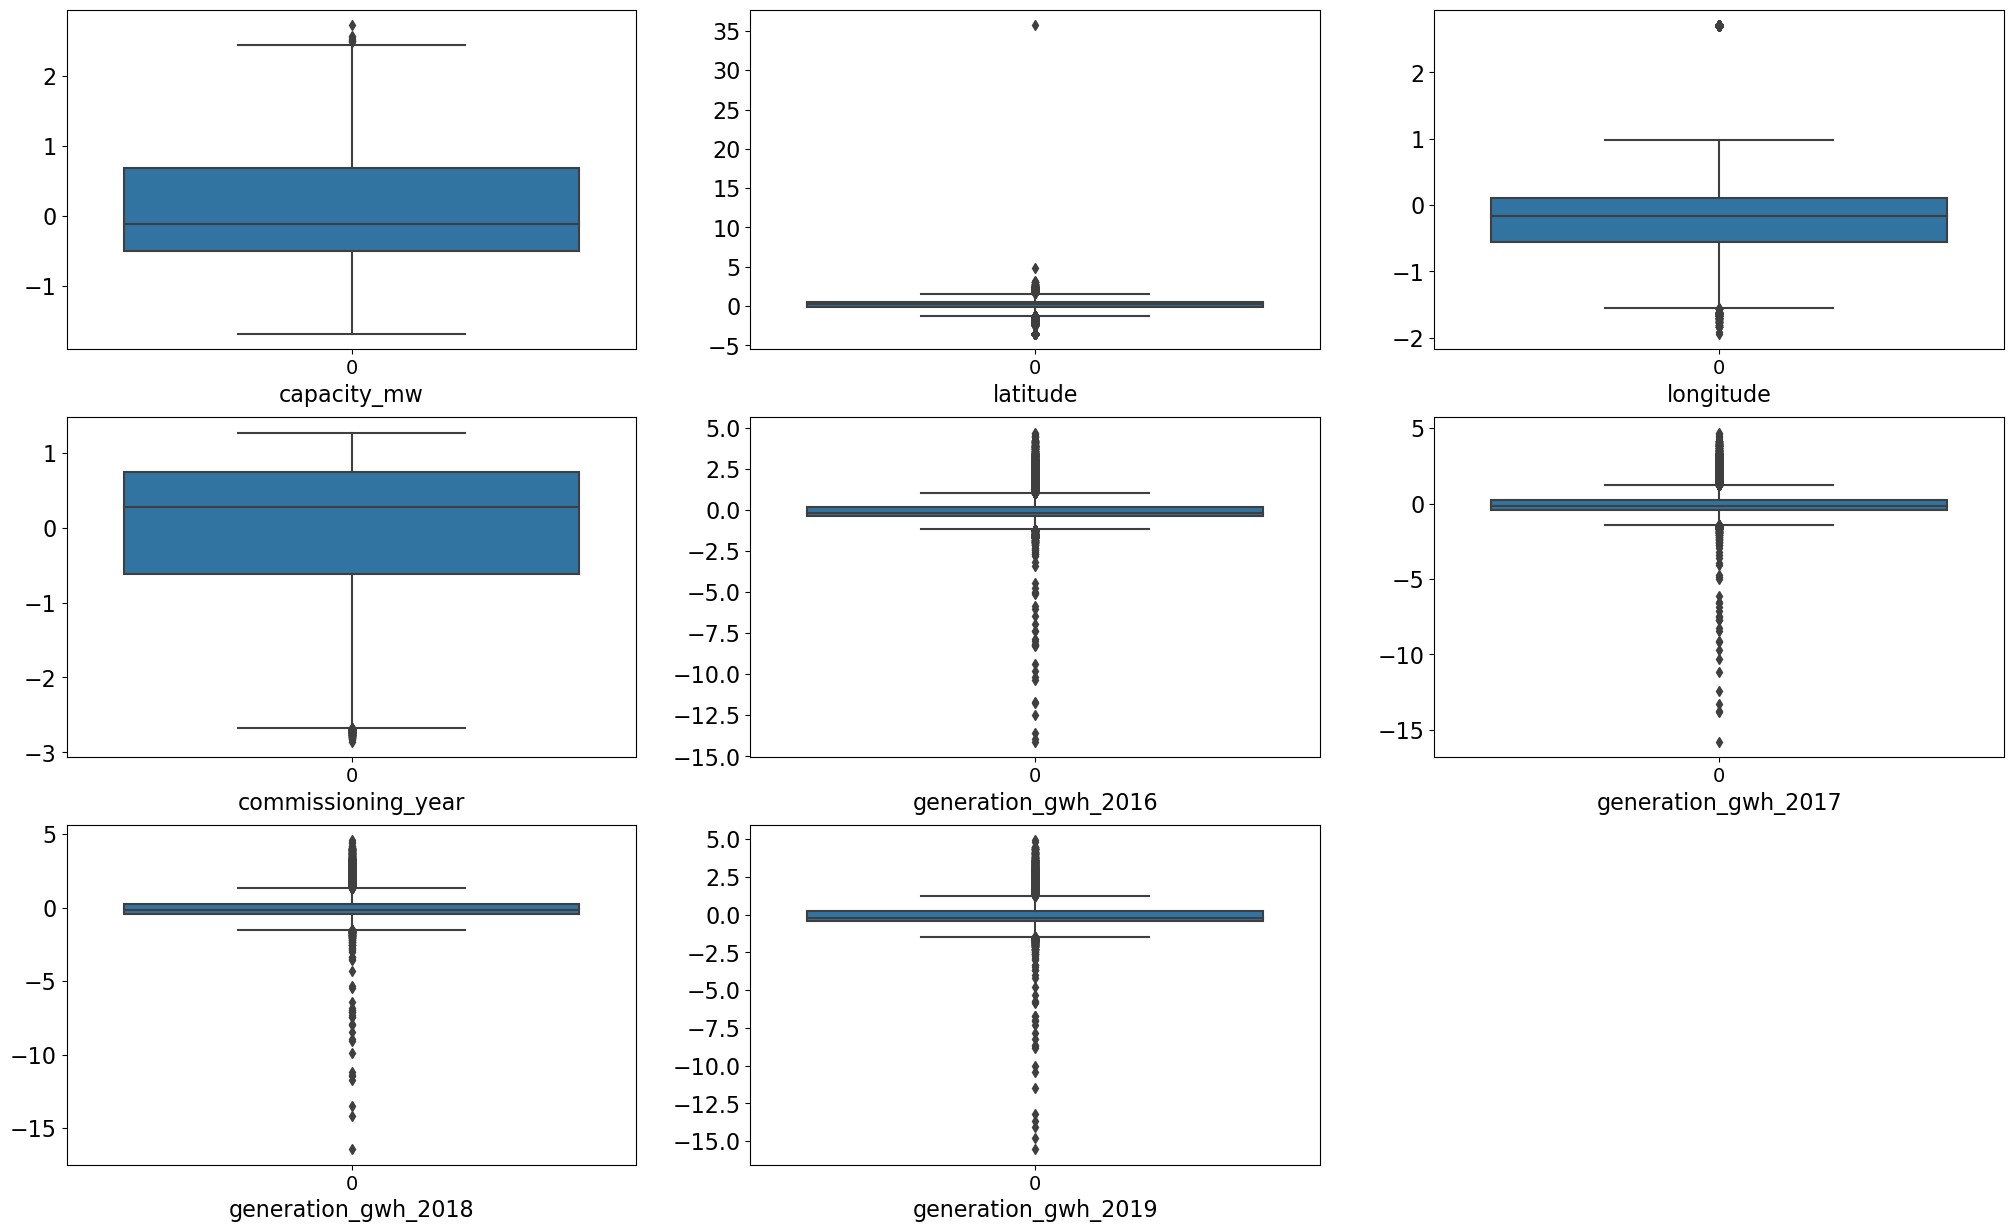

In [399]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()

# Approach_Outlier-II: Removing outliers using the Z-score method.

In [400]:
from scipy.stats import zscore

In [401]:
out_features=df[['latitude', 'longitude','generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019']]

In [402]:
from scipy.stats import zscore
out_features=df[['latitude', 'longitude','generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019']]
z=np.abs(zscore(out_features))  
z

latitude  longitude  generation_gwh_2016  generation_gwh_2017  \
0      0.700260   2.705590             0.164251             0.181213   
1      1.005944   2.705756             0.164251             0.181213   
2      1.263300   2.705104             0.164251             0.181213   
3      1.086271   2.707546             1.574914             1.397446   
4      1.258206   2.706639             3.020601             2.850196   
...         ...        ...                  ...                  ...   
13293  0.603957   0.068373             0.649490             0.675283   
13294  0.730519   0.292859             0.164251             0.181213   
13295  0.706361   0.294880             0.164251             0.181213   
13296  0.325499   0.567024             0.164251             0.181213   
13297  0.398319   0.719854             0.363218             0.378888   

       generation_gwh_2018  generation_gwh_2019  
0                 0.194238             0.215062  
1                 0.194238             0.215062  
2                 0.194238             0.215062  
3                 1.348608             0.215062  
4                 3.045581             0.215062  
...                    ...                  ...  
13293             0.533963             0.696375  
13294             0.670755             0.650309  
13295             0.194238             0.215062  
13296             0.194238             0.215062  
13297             0.374616             0.406562  

[13298 rows x 6 columns]

In [403]:
#threshold=3
np.where(z>3)

(array([    4,     4,    12, ..., 13241, 13241, 13265], dtype=int64),
 array([2, 4, 2, ..., 4, 5, 5], dtype=int64))

In [404]:
df2=df[(z<3).all(axis=1)]  
df2.shape

(12434, 14)

# Data Loss

In [405]:
(13298-12434)/13298*100

6.497217626710785

In [406]:
df=df2

In [407]:
df

country  capacity_mw  latitude  longitude primary_fuel  \
0         IND    -0.362457 -0.700260   2.705590        Solar   
1         IND     0.926556 -1.005944   2.705756         Coal   
2         IND     0.569529 -1.263300   2.705104         Wind   
3         IND     1.055287 -1.086271   2.707546          Gas   
5         IND     1.307607 -1.095460   2.705009         Coal   
...       ...          ...       ...        ...          ...   
13293     USA    -0.271145  0.603957   0.068373         Wind   
13294     USA    -0.612653  0.730519  -0.292859        Solar   
13295     USA    -1.689294  0.706361  -0.294880        Solar   
13296     USA    -1.689294  0.325499  -0.567024        Solar   
13297     USA     0.069545  0.398319  -0.719854          Gas   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
5                0.076150       Cypress Creek Renewables   
...                   ...                            ...   
13293            0.589137            Zotos International   
13294            1.091282               Zumbro Solar LLC   
13295            0.287023              Zumbro Garden LLC   
13296            0.287023  Public Service Co of Colorado   
13297            0.731372                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
5               Central Electricity Authority   
...                                       ...   
13293  U.S. Energy Information Administration   
13294  U.S. Energy Information Administration   
13295  U.S. Energy Information Administration   
13296  U.S. Energy Information Administration   
13297  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2016  \
0        National Renewable Energy Laboratory            -0.164251   
1                                         WRI            -0.164251   
2                                         WRI            -0.164251   
3                                         WRI             1.574914   
5                                         WRI             1.754161   
...                                       ...                  ...   
13293  U.S. Energy Information Administration            -0.649490   
13294  U.S. Energy Information Administration            -0.164251   
13295  U.S. Energy Information Administration            -0.164251   
13296  U.S. Energy Information Administration            -0.164251   
13297  U.S. Energy Information Administration             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
5                 1.727097             1.604903            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

                       generation_data_source  
0      U.S. Energy Information Administration  
1      U.S. Energy Information Administration  
2      U.S. Energy Information Administration  
3               Central Elect

In [408]:
df.nunique()

country                       2
capacity_mw                1969
latitude                  11556
longitude                 11888
primary_fuel                 14
commissioning_year         1809
owner                      5585
source                      205
geolocation_source            4
generation_gwh_2016        6580
generation_gwh_2017        7058
generation_gwh_2018        7463
generation_gwh_2019        8088
generation_data_source        2
dtype: int64

In [409]:
df['country'].nunique()

2

In [410]:
df['country'].value_counts()

country
USA    11590
IND      844
Name: count, dtype: int64

In [411]:
df=df1

In [412]:
df.nunique()

country                       3
capacity_mw                2283
latitude                  12195
longitude                 12535
primary_fuel                 14
commissioning_year         1879
owner                      5810
source                      206
geolocation_source            5
generation_gwh_2016        7029
generation_gwh_2017        7493
generation_gwh_2018        7900
generation_gwh_2019        8179
generation_data_source        3
dtype: int64

In [415]:
df['geolocation_source'].nunique()

5

In [416]:
df['country'].value_counts()

country
USA    11668
IND      907
AUS      512
Name: count, dtype: int64

# hence we will IQR method for outlier removal because in z score method complete data of Australia got deletedm

# Encoding of object data

Encode the target variable using a label encoder.

In [296]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [297]:
df['country']=le.fit_transform(df['country'])

In [298]:
df['generation_data_source']=le.fit_transform(df['generation_data_source'])

In [299]:
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [300]:
df

country  capacity_mw  latitude  longitude  primary_fuel  \
0            1    -0.362457 -0.700260   2.705590            10   
1            1     0.926556 -1.005944   2.705756             1   
2            1     0.569529 -1.263300   2.705104            13   
3            1     1.055287 -1.086271   2.707546             3   
4            1     2.144616 -1.258206   2.706639             1   
...        ...          ...       ...        ...           ...   
13293        2    -0.271145  0.603957   0.068373            13   
13294        2    -0.612653  0.730519  -0.292859            10   
13295        2    -1.689294  0.706361  -0.294880            10   
13296        2    -1.689294  0.325499  -0.567024            10   
13297        2     0.069545  0.398319  -0.719854             3   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
4                0.832517       Cypress Creek Renewables   
...                   ...                            ...   
13293            0.589137            Zotos International   
13294            1.091282               Zumbro Solar LLC   
13295            0.287023              Zumbro Garden LLC   
13296            0.287023  Public Service Co of Colorado   
13297            0.731372                   Bloom Energy   

                                       source  geolocation_source  \
0        National Renewable Energy Laboratory                   2   
1                        Ultratech Cement ltd                   4   
2                                         CDM                   4   
3               Central Electricity Authority                   4   
4               Central Electricity Authority                   4   
...                                       ...                 ...   
13293  U.S. Energy Information Administration                   3   
13294  U.S. Energy Information Administration                   3   
13295  U.S. Energy Information Administration                   3   
13296  U.S. Energy Information Administration                   3   
13297  U.S. Energy Information Administration                   3   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                -0.164251            -0.181213            -0.194238   
1                -0.164251            -0.181213            -0.194238   
2                -0.164251            -0.181213            -0.194238   
3                 1.574914             1.397446             1.348608   
4                 3.020601             2.850196             3.045581   
...                    ...                  ...                  ...   
13293            -0.649490            -0.675283            -0.533963   
13294            -0.164251            -0.181213            -0.670755   
13295            -0.164251            -0.181213            -0.194238   
13296            -0.164251            -0.181213            -0.194238   
13297             0.363218             0.378888             0.374616   

       generation_gwh_2019  generation_data_source  
0                -0.215062                       2  
1                -0.215062                       2  
2                -0.215062                       2  
3                -0.215062                       1  
4                -0.215062                       1  
...                    ...                     ...  
13293            -0.696375                       2  
13294            -0.650309                       2  
13295            -0.215062                       2  
13296            -0.215062                       2  
13297             0.406562                       2  

[13087 rows x 14 columns]

In [302]:
df['generation_data_source'].value_counts()

generation_data_source
2    12321
1      454
0      312
Name: count, dtype: int64

In [287]:
X=df.drop(columns=['primary_fuel'])
Y=df.primary_fuel

In [288]:
from category_encoders import BinaryEncoder
b=BinaryEncoder()

In [289]:
df=b.fit_transform(X)

In [290]:
df

country  capacity_mw  latitude  longitude  commissioning_year  owner_0  \
0            1    -0.362457 -0.700260   2.705590            0.511273        0   
1            1     0.926556 -1.005944   2.705756            0.287023        0   
2            1     0.569529 -1.263300   2.705104            0.287023        0   
3            1     1.055287 -1.086271   2.707546            0.008695        0   
4            1     2.144616 -1.258206   2.706639            0.832517        0   
...        ...          ...       ...        ...                 ...      ...   
13293        2    -0.271145  0.603957   0.068373            0.589137        1   
13294        2    -0.612653  0.730519  -0.292859            1.091282        1   
13295        2    -1.689294  0.706361  -0.294880            0.287023        1   
13296        2    -1.689294  0.325499  -0.567024            0.287023        0   
13297        2     0.069545  0.398319  -0.719854            0.731372        0   

       owner_1  owner_2  owner_3  owner_4  ...  source_4  source_5  source_6  \
0            0        0        0        0  ...         0         0         0   
1            0        0        0        0  ...         0         0         1   
2            0        0        0        0  ...         0         0         1   
3            0        0        0        0  ...         0         1         0   
4            0        0        0        0  ...         0         1         0   
...        ...      ...      ...      ...  ...       ...       ...       ...   
13293        0        1        1        0  ...         0         0         0   
13294        0        1        1        0  ...         0         0         0   
13295        0        1        1        0  ...         0         0         0   
13296        0        0        1        0  ...         0         0         0   
13297        0        0        1        0  ...         0         0         0   

       source_7  geolocation_source  generation_gwh_2016  generation_gwh_2017  \
0             1                   2            -0.164251            -0.181213   
1             0                   4            -0.164251            -0.181213   
2             1                   4            -0.164251            -0.181213   
3             0                   4             1.574914             1.397446   
4             0                   4             3.020601             2.850196   
...         ...                 ...                  ...                  ...   
13293         1                   3            -0.649490            -0.675283   
13294         1                   3            -0.164251            -0.181213   
13295         1                   3            -0.164251            -0.181213   
13296         1                   3            -0.164251            -0.181213   
13297         1                   3             0.363218             0.378888   

       generation_gwh_2018  generation_gwh_2019  generation_data_source  
0                -0.194238            -0.215062                       2  
1                -0.194238            -0.215062                       2  
2                -0.194238            -0.215062                       2  
3                 1.348608            -0.215062                       1  
4                 3.045581            -0.215062                       1  
...                    ...                  ...                     ...  
13293            -0.533963            -0.696375                       2  
13294            -0.670755            -0.650309                       2  
13295            -0.194238            -0.215062                       2  
13296            -0.194238            -0.215062                       2  
13297             0.374616             0.406562                       2  

[13087 rows x 32 columns]

In [291]:
df.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'owner_0', 'owner_1', 'owner_2', 'owner_3', 'owner_4', 'owner_5',
       'owner_6', 'owner_7', 'owner_8', 'owner_9', 'owner_10', 'owner_11',
       'owner_12', 'source_0', 'source_1', 'source_2', 'source_3', 'source_4',
       'source_5', 'source_6', 'source_7', 'geolocation_source',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [114]:
df.dtypes

country                     int32
capacity_mw               float64
latitude                  float64
longitude                 float64
commissioning_year        float64
owner_0                     int64
owner_1                     int64
owner_2                     int64
owner_3                     int64
owner_4                     int64
owner_5                     int64
owner_6                     int64
owner_7                     int64
owner_8                     int64
owner_9                     int64
owner_10                    int64
owner_11                    int64
owner_12                    int64
source_0                    int64
source_1                    int64
source_2                    int64
source_3                    int64
source_4                    int64
source_5                    int64
source_6                    int64
source_7                    int64
geolocation_source          int32
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh

The object data has been encoded successfully.

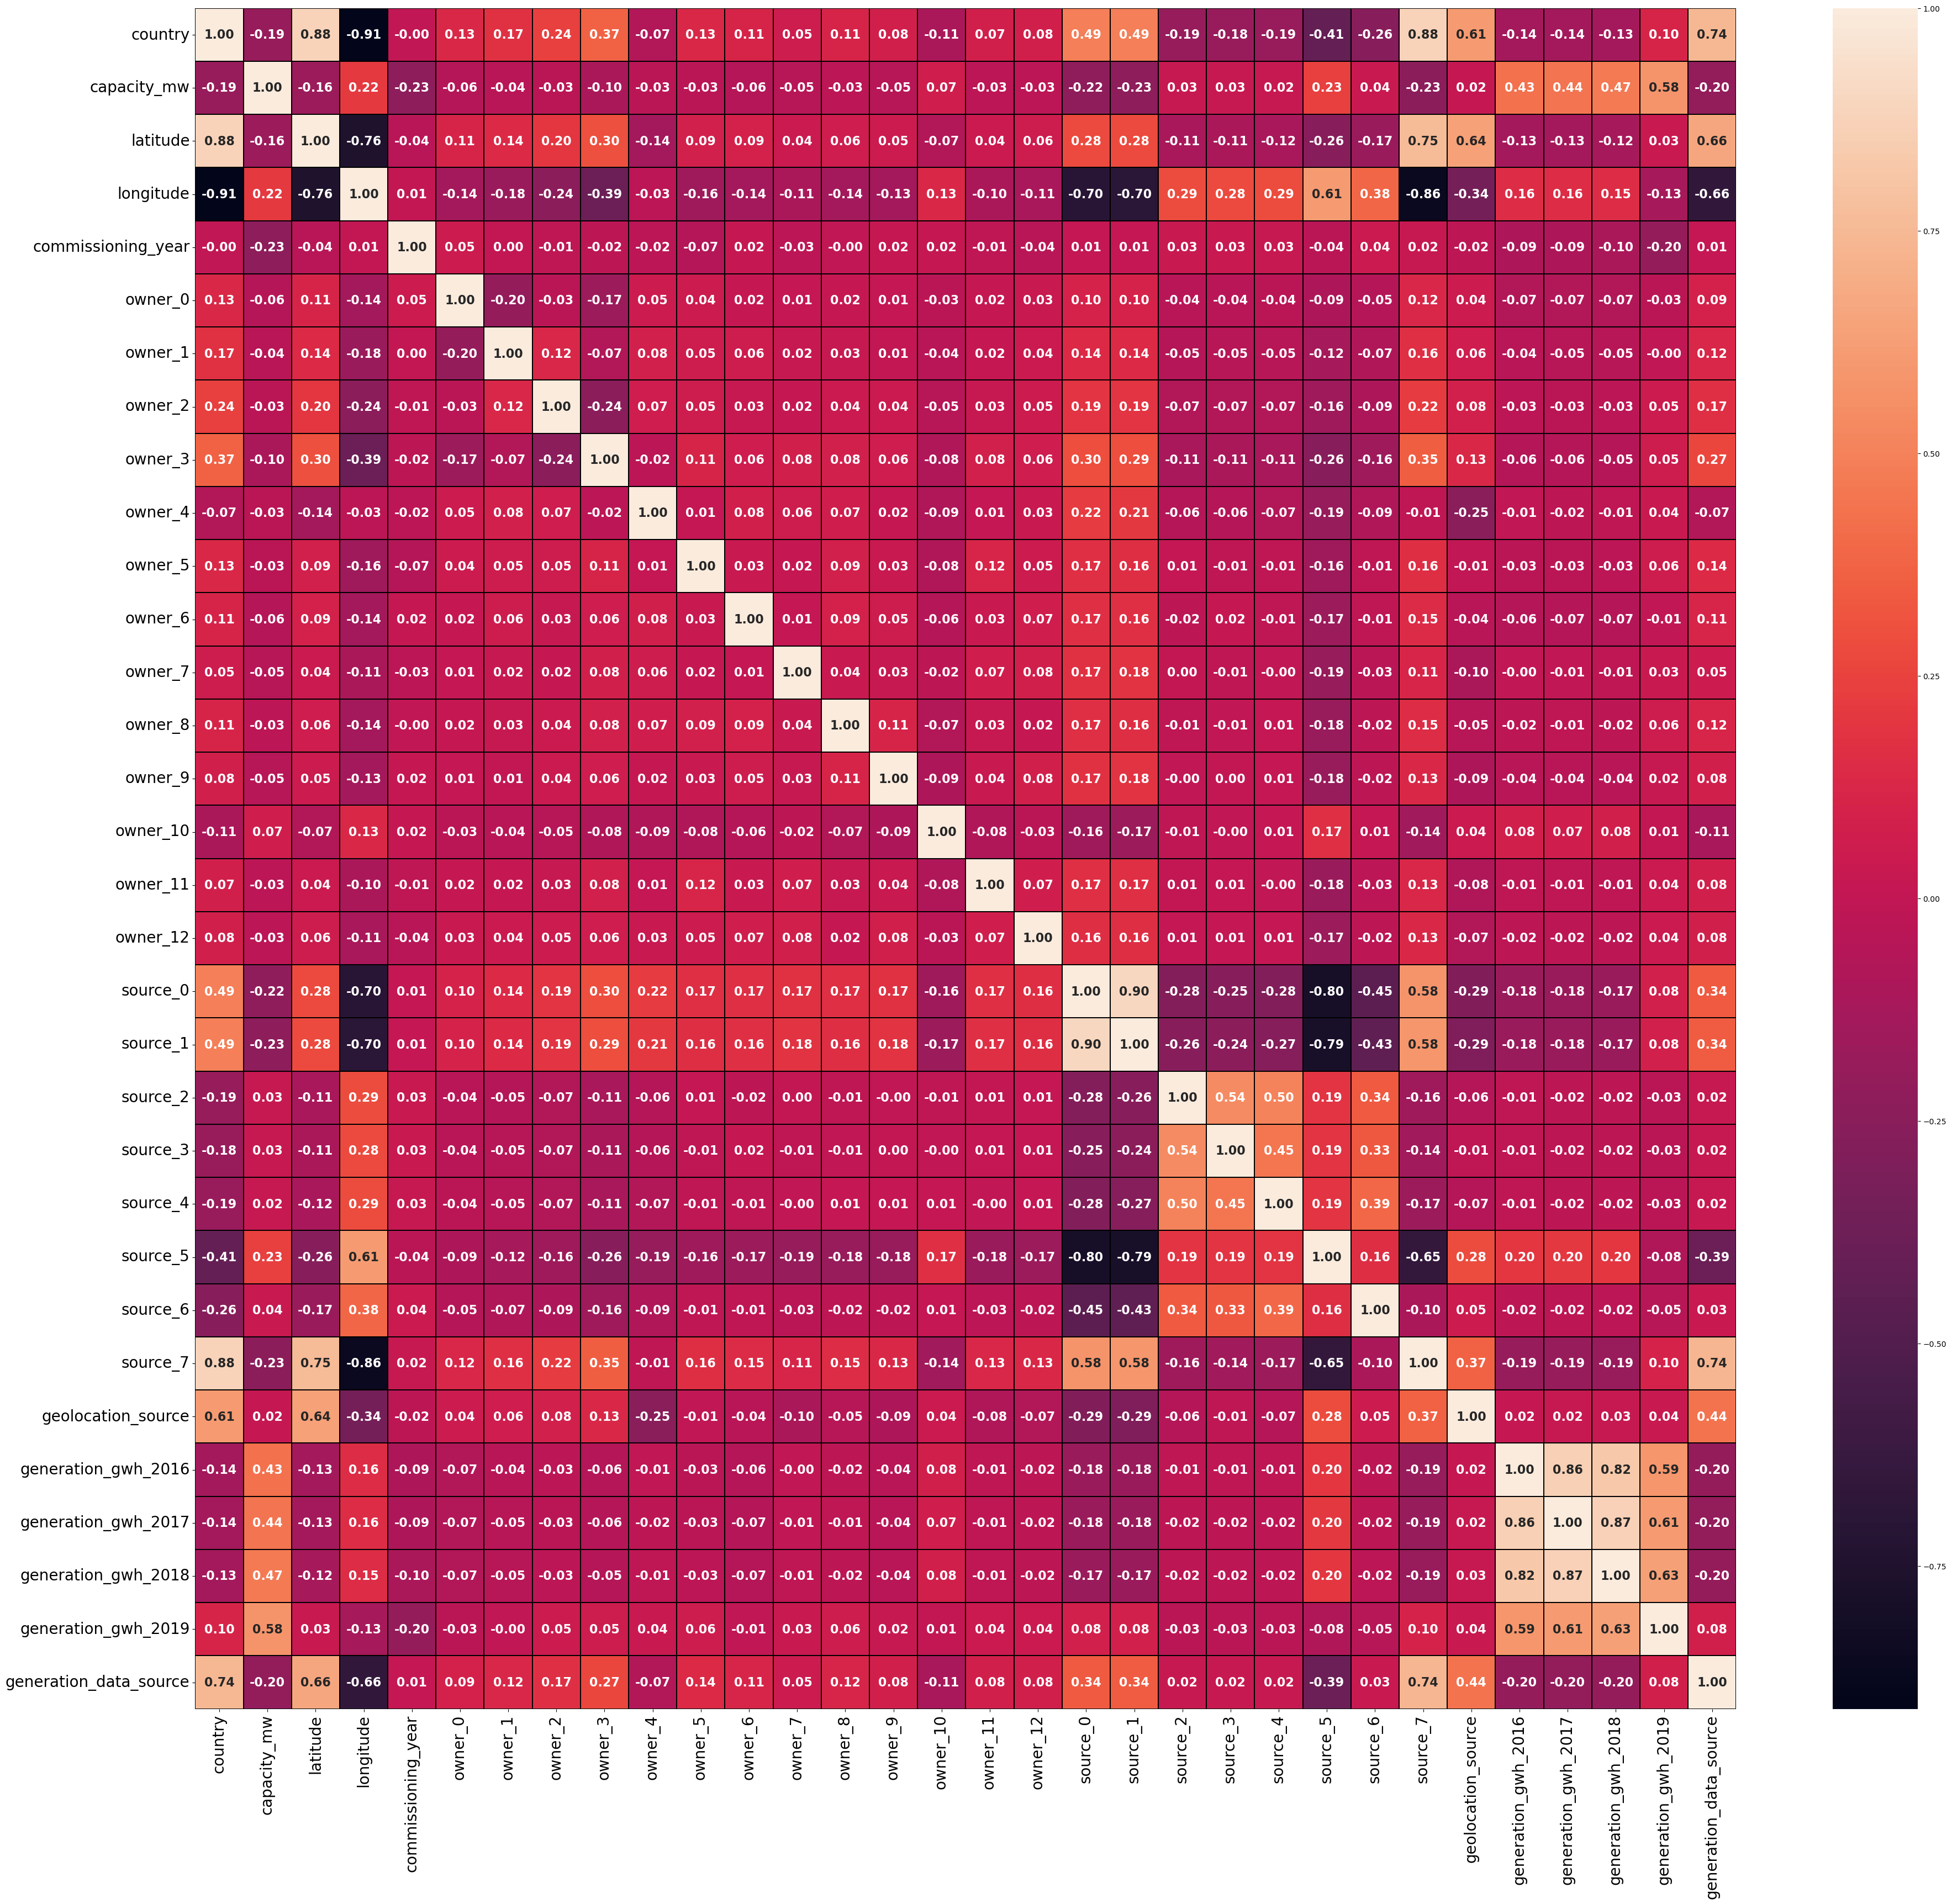

In [115]:
plt.figure(figsize=(45,40))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show() 

In [129]:
df.corr()['primary_fuel'].sort_values(ascending=False).to_frame()

primary_fuel
primary_fuel                1.000000
commissioning_year          0.476251
source_7                    0.247978
source_1                    0.183727
source_0                    0.182601
generation_data_source      0.170862
country                     0.163433
latitude                    0.119258
owner_9                     0.108240
owner_3                     0.074283
owner_8                     0.070680
owner_11                    0.066613
owner_6                     0.056616
source_6                    0.051345
owner_0                     0.035478
owner_7                     0.031594
owner_5                     0.031331
owner_4                     0.021743
owner_12                    0.013141
owner_2                     0.012867
owner_1                    -0.002094
geolocation_source         -0.047243
source_4                   -0.053406
source_2                   -0.056459
owner_10                   -0.056589
source_3                   -0.086346
generation_gwh_2017        -0.170970
generation_gwh_2018        -0.180491
generation_gwh_2016        -0.180504
longitude                  -0.190257
generation_gwh_2019        -0.241767
source_5                   -0.253153
capacity_mw                -0.439907

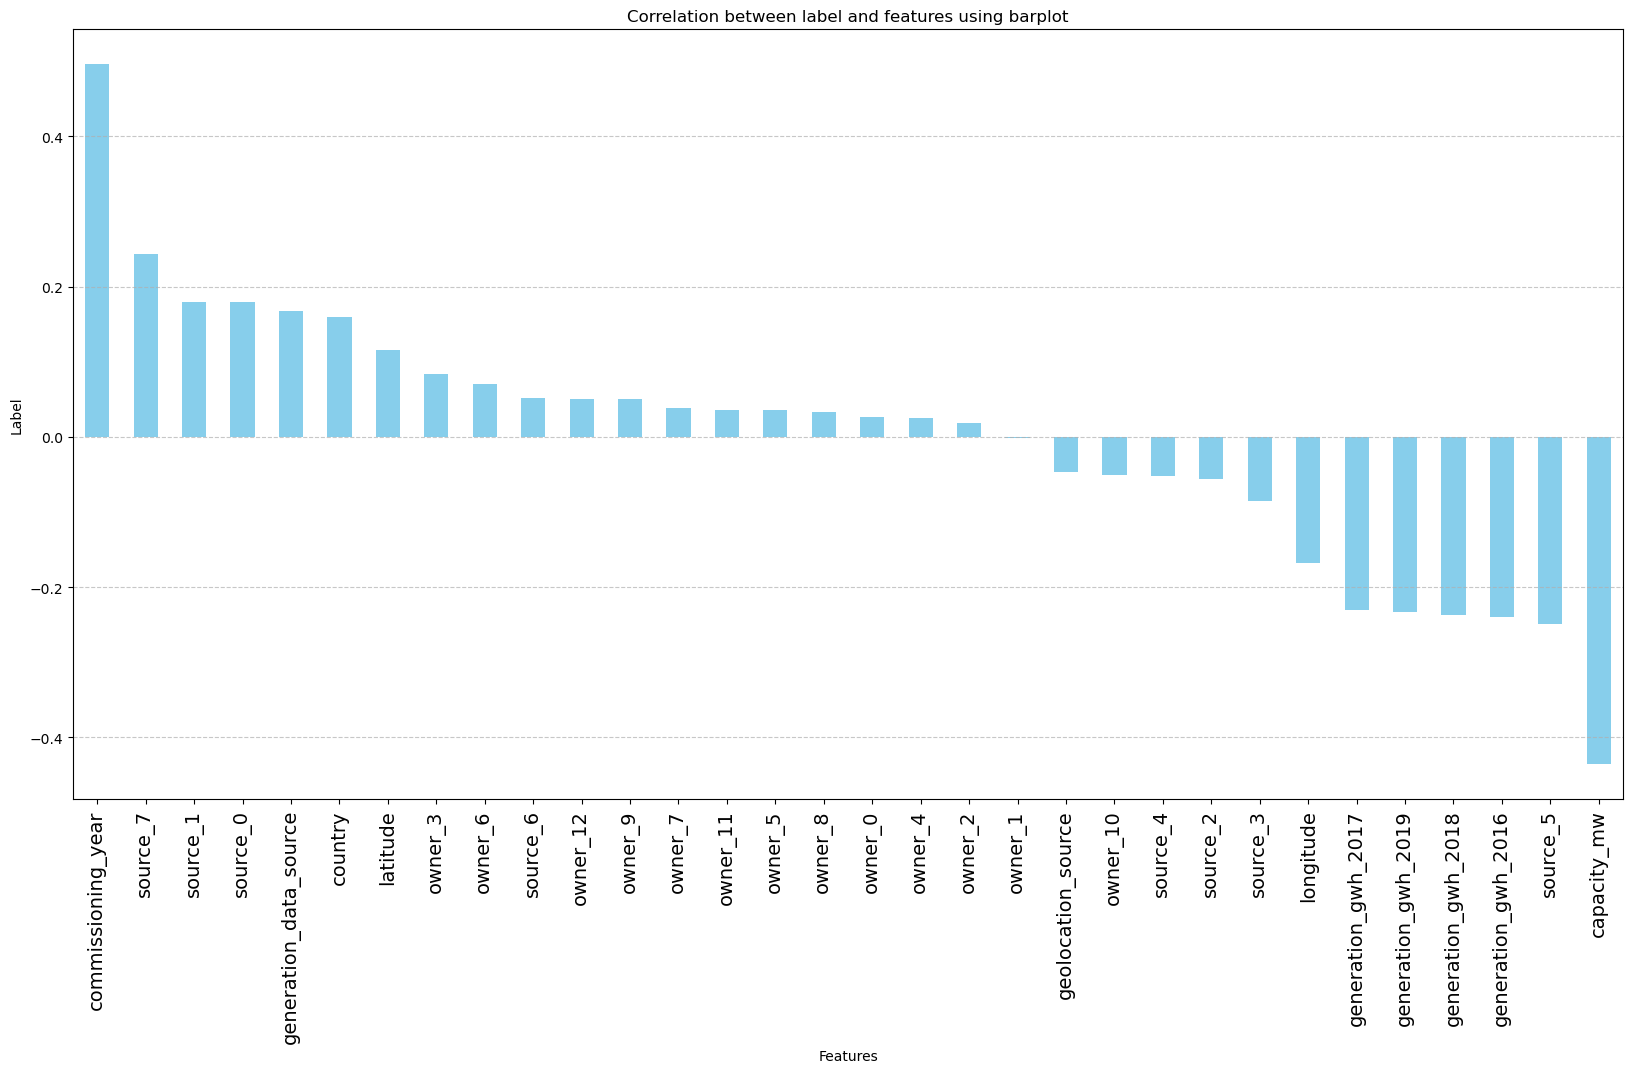

In [419]:
plt.figure(figsize=(20,10))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model I: Including all features.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [117]:
X=df

In [118]:
X

country  capacity_mw  latitude  longitude  commissioning_year  owner_0  \
0            1    -0.262930 -0.544053   2.881954            0.515129        0   
1            1     0.820008 -0.824569   2.881965            0.329710        0   
2            1     0.486261 -1.069370   2.881921            0.329710        0   
3            1     0.949168 -0.900073   2.882083            0.091839        0   
4            1     2.295050 -1.064440   2.882023            0.772075        0   
...        ...          ...       ...        ...                 ...      ...   
13293        2    -0.194658  0.557455  -0.137966            0.578309        1   
13294        2    -0.447876  0.657791  -0.330840            0.972336        1   
13295        2    -1.787917  0.638714  -0.331881            0.329710        1   
13296        2    -1.787917  0.333104  -0.468627            0.329710        0   
13297        2     0.067623  0.392270  -0.542631            0.692214        0   

       owner_1  owner_2  owner_3  owner_4  ...  source_4  source_5  source_6  \
0            0        0        0        0  ...         0         0         0   
1            0        0        0        0  ...         0         0         1   
2            0        0        0        0  ...         0         0         1   
3            0        0        0        0  ...         0         1         0   
4            0        0        0        0  ...         0         1         0   
...        ...      ...      ...      ...  ...       ...       ...       ...   
13293        0        1        0        1  ...         0         0         0   
13294        0        1        0        1  ...         0         0         0   
13295        0        1        0        1  ...         0         0         0   
13296        0        0        1        0  ...         0         0         0   
13297        0        0        1        0  ...         0         0         0   

       source_7  geolocation_source  generation_gwh_2016  generation_gwh_2017  \
0             1                   2            -0.059633            -0.075062   
1             0                   4            -0.059633            -0.075062   
2             1                   4            -0.059633            -0.075062   
3             0                   4             1.525998             1.371274   
4             0                   4             2.749435             2.607438   
...         ...                 ...                  ...                  ...   
13293         1                   3            -0.586618            -0.616081   
13294         1                   3            -0.059633            -0.075062   
13295         1                   3            -0.059633            -0.075062   
13296         1                   3            -0.059633            -0.075062   
13297         1                   3             0.448934             0.463726   

       generation_gwh_2018  generation_gwh_2019  generation_data_source  
0                -0.085657            -0.141539                       2  
1                -0.085657            -0.141539                       2  
2                -0.085657            -0.141539                       2  
3                 1.327170            -0.141539                       1  
4                 2.768768            -0.141539                       1  
...                    ...                  ...                     ...  
13293            -0.446971            -0.690470                       2  
13294            -0.607449            -0.633064                       2  
13295            -0.085657            -0.141539                       2  
13296            -0.085657            -0.141539                       2  
13297             0.460521             0.481032                       2  

[12652 rows x 32 columns]

In [119]:
X.shape

(12652, 32)

In [120]:
Y

0        10
1         1
2        13
3         3
4         1
         ..
13293    13
13294    10
13295    10
13296    10
13297     3
Name: primary_fuel, Length: 12652, dtype: int32

In [121]:
Y.shape

(12652,)

In [122]:
Y.value_counts().sort_index()

primary_fuel
0      222
1      563
2       32
3     1938
4       60
5     1705
6       72
7      749
8       15
9       11
10    5362
11      24
12     572
13    1327
Name: count, dtype: int64

# Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

country  capacity_mw  latitude  longitude  commissioning_year  \
0     -1.847957    -0.265785 -0.518534   2.805134            0.502512   
1     -1.847957     0.803716 -0.793930   2.805145            0.315673   
2     -1.847957     0.474109 -1.034263   2.805102            0.315673   
3     -1.847957     0.931273 -0.868056   2.805261            0.075978   
4     -1.847957     2.260456 -1.029423   2.805202            0.761427   
...         ...          ...       ...        ...                 ...   
12647  0.332842    -0.198361  0.562867  -0.151797            0.566176   
12648  0.332842    -0.448437  0.661371  -0.340649            0.963224   
12649  0.332842    -1.771850  0.642643  -0.341668            0.315673   
12650  0.332842    -1.771850  0.342611  -0.475561            0.315673   
12651  0.332842     0.060666  0.400697  -0.548022            0.680954   

        owner_0   owner_1   owner_2   owner_3   owner_4  ...  source_4  \
0     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
1     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
2     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
3     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
4     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
...         ...       ...       ...       ...       ...  ...       ...   
12647  2.586733 -0.517432  1.398351 -1.111457  1.172634  ... -0.109166   
12648  2.586733 -0.517432  1.398351 -1.111457  1.172634  ... -0.109166   
12649  2.586733 -0.517432  1.398351 -1.111457  1.172634  ... -0.109166   
12650 -0.386588 -0.517432 -0.715128  0.899720 -0.852781  ... -0.109166   
12651 -0.386588 -0.517432 -0.715128  0.899720 -0.852781  ... -0.109166   

       source_5  source_6  source_7  geolocation_source  generation_gwh_2016  \
0     -0.238511 -0.149888  0.322661           -1.361197            -0.130554   
1     -0.238511  6.671641 -3.099225            1.587500            -0.130554   
2     -0.238511  6.671641  0.322661            1.587500            -0.130554   
3      4.192679 -0.149888 -3.099225            1.587500             1.543062   
4      4.192679 -0.149888 -3.099225            1.587500             2.834385   
...         ...       ...       ...                 ...                  ...   
12647 -0.238511 -0.149888  0.322661            0.113151            -0.686781   
12648 -0.238511 -0.149888  0.322661            0.113151            -0.130554   
12649 -0.238511 -0.149888  0.322661            0.113151            -0.130554   
12650 -0.238511 -0.149888  0.322661            0.113151            -0.130554   
12651 -0.238511 -0.149888  0.322661            0.113151             0.406233   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.155296            -0.179771            -0.314971   
1                -0.155296            -0.179771            -0.314971   
2                -0.155296            -0.179771            -0.314971   
3                 1.381734             1.342231            -0.314971   
4                 2.695414             2.895228            -0.314971   
...                    ...                  ...                  ...   
12647            -0.730241            -0.569005            -0.963589   
12648            -0.155296            -0.741884            -0.895757   
12649            -0.155296            -0.179771            -0.314971   
12650            -0.155296            -0.179771            -0.314971   
12651             0.417277             0.408612             0.420660   

       generation_data_source  
0                    0.238839  
1                    0.238839  
2                    0.238839  
3                   -2.564311  
4                   -2.564311  
...                       ...  
12647                0.238839  
12648                0.238839  
12649                0.238839  
12650                0.238839  
12651                0.238839  

[12652 rows x 32 columns]

To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values                Features
0    33.838461                 country
1     1.843922             capacity_mw
2     5.474602                latitude
3    14.441636               longitude
4     1.098044      commissioning_year
5     1.243628                 owner_0
6     1.177776                 owner_1
7     1.312303                 owner_2
8     1.630904                 owner_3
9     1.139293                 owner_4
10    1.071881                 owner_5
11    1.054410                 owner_6
12    1.059865                 owner_7
13    1.060131                 owner_8
14    1.060769                 owner_9
15    1.056299                owner_10
16    1.058809                owner_11
17    1.052381                owner_12
18    8.280243                source_0
19    7.590374                source_1
20    1.726928                source_2
21    1.604215                source_3
22    1.630896                source_4
23    5.381158                source_5
24    2.027010                source_6
25   10.192582                source_7
26    8.802920      geolocation_source
27    4.280532     generation_gwh_2016
28    5.694659     generation_gwh_2017
29    4.808723     generation_gwh_2018
30    2.708217     generation_gwh_2019
31    2.864470  generation_data_source

In [126]:
df['primary_fuel'] = Y

In [130]:
df.corr()['primary_fuel']

country                   0.163433
capacity_mw              -0.439907
latitude                  0.119258
longitude                -0.190257
commissioning_year        0.476251
owner_0                   0.035478
owner_1                  -0.002094
owner_2                   0.012867
owner_3                   0.074283
owner_4                   0.021743
owner_5                   0.031331
owner_6                   0.056616
owner_7                   0.031594
owner_8                   0.070680
owner_9                   0.108240
owner_10                 -0.056589
owner_11                  0.066613
owner_12                  0.013141
source_0                  0.182601
source_1                  0.183727
source_2                 -0.056459
source_3                 -0.086346
source_4                 -0.053406
source_5                 -0.253153
source_6                  0.051345
source_7                  0.247978
geolocation_source       -0.047243
generation_gwh_2016      -0.180504
generation_gwh_2017 

In [131]:
Y.value_counts()

primary_fuel
10    5362
3     1938
5     1705
13    1327
7      749
12     572
1      563
0      222
6       72
4       60
2       32
11      24
8       15
9       11
Name: count, dtype: int64

In [132]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [133]:
Y.value_counts()

primary_fuel
10    5362
1     5362
13    5362
3     5362
5     5362
0     5362
7     5362
6     5362
12    5362
2     5362
11    5362
4     5362
9     5362
8     5362
Name: count, dtype: int64

In [134]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.3041121283389997 at random state 166


In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [135]:
X_train.shape

(61364, 32)

In [139]:
Y_train.shape

(61364,)

In [140]:
X_test.shape

(15342, 32)

In [141]:
Y_test.shape

(15342,)

# Machine Learning Model for Classification and Evaluation Metrics

In [143]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [430]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 67.92465128405684

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.41      0.46      1080
           1       0.65      0.65      0.65      1067
           2       0.65      0.54      0.59      1127
           3       0.47      0.32      0.38      1050
           4       0.68      0.82      0.74      1093
           5       0.73      0.66      0.69      1171
           6       0.86      0.83      0.84      1095
           7       0.71      0.75      0.73      1093
           8       0.68      0.81      0.74      1074
           9       0.74      0.91      0.82      1078
          10       0.64      0.74      0.69      1101
          11       0.85      0.95      0.90      1100
          12       0.56      0.49      0.52      1117
          13       0.62      0.64      0.63      1096

    accuracy                           0.68     15342
   macro avg       0.67      0.68      0.67     15342
weighted avg       0.

In [431]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 96.08916699256942

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1080
           1       0.97      0.96      0.97      1067
           2       1.00      1.00      1.00      1127
           3       0.93      0.79      0.86      1050
           4       0.99      1.00      1.00      1093
           5       0.96      0.94      0.95      1171
           6       1.00      0.99      1.00      1095
           7       0.90      0.95      0.92      1093
           8       1.00      1.00      1.00      1074
           9       1.00      1.00      1.00      1078
          10       0.93      0.95      0.94      1101
          11       1.00      1.00      1.00      1100
          12       0.90      0.95      0.92      1117
          13       0.93      0.93      0.93      1096

    accuracy                           0.96     15342
   macro avg       0.96      0.96      0.96     15342
weighted avg       0.

In [432]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 98.68335288749836

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1080
           1       0.99      0.99      0.99      1067
           2       1.00      1.00      1.00      1127
           3       0.96      0.93      0.95      1050
           4       1.00      1.00      1.00      1093
           5       0.99      0.98      0.98      1171
           6       1.00      1.00      1.00      1095
           7       0.96      0.98      0.97      1093
           8       1.00      1.00      1.00      1074
           9       1.00      1.00      1.00      1078
          10       0.97      0.96      0.96      1101
          11       1.00      1.00      1.00      1100
          12       0.98      0.99      0.99      1117
          13       0.97      0.98      0.98      1096

    accuracy                           0.99     15342
   macro avg       0.99      0.99      0.99     15342
weighted avg       0.

In [433]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 90.58141050710468

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1080
           1       0.88      0.93      0.91      1067
           2       0.96      1.00      0.98      1127
           3       0.84      0.56      0.67      1050
           4       0.94      1.00      0.97      1093
           5       0.91      0.86      0.88      1171
           6       0.96      0.99      0.97      1095
           7       0.85      0.92      0.88      1093
           8       0.97      1.00      0.98      1074
           9       0.98      1.00      0.99      1078
          10       0.94      0.63      0.76      1101
          11       0.96      1.00      0.98      1100
          12       0.83      0.95      0.88      1117
          13       0.86      0.84      0.85      1096

    accuracy                           0.91     15342
   macro avg       0.91      0.91      0.90     15342
weighted avg       0.

In [434]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.64763394603051

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1080
           1       0.83      0.94      0.88      1067
           2       0.99      1.00      1.00      1127
           3       0.83      0.68      0.75      1050
           4       1.00      1.00      1.00      1093
           5       0.93      0.87      0.90      1171
           6       0.98      0.92      0.95      1095
           7       0.85      0.92      0.88      1093
           8       0.99      1.00      1.00      1074
           9       1.00      1.00      1.00      1078
          10       0.91      0.91      0.91      1101
          11       0.99      1.00      1.00      1100
          12       0.87      0.89      0.88      1117
          13       0.89      0.88      0.88      1096

    accuracy                           0.93     15342
   macro avg       0.93      0.93      0.93     15342
weighted avg       0.

In [435]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 89.01707730413244

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1080
           1       0.87      0.86      0.87      1067
           2       0.94      0.98      0.96      1127
           3       0.71      0.65      0.68      1050
           4       0.98      0.98      0.98      1093
           5       0.87      0.83      0.85      1171
           6       0.97      0.97      0.97      1095
           7       0.88      0.85      0.86      1093
           8       0.95      0.98      0.96      1074
           9       0.99      0.98      0.99      1078
          10       0.92      0.86      0.89      1101
          11       0.95      1.00      0.97      1100
          12       0.74      0.81      0.78      1117
          13       0.84      0.84      0.84      1096

    accuracy                           0.89     15342
   macro avg       0.89      0.89      0.89     15342
weighted avg       0.

In [436]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 97.29500716986051

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1080
           1       0.97      0.97      0.97      1067
           2       1.00      1.00      1.00      1127
           3       0.91      0.85      0.88      1050
           4       1.00      1.00      1.00      1093
           5       0.96      0.95      0.95      1171
           6       1.00      1.00      1.00      1095
           7       0.93      0.96      0.94      1093
           8       1.00      1.00      1.00      1074
           9       1.00      1.00      1.00      1078
          10       0.98      0.97      0.97      1101
          11       1.00      1.00      1.00      1100
          12       0.94      0.96      0.95      1117
          13       0.96      0.97      0.96      1096

    accuracy                           0.97     15342
   macro avg       0.97      0.97      0.97     15342
weighted avg       0.

# ETRA TREES CLASSIFIER IS OUR BEST MODEL BECAUSE IT HAS Diffrence between Accuracy score and cross validation score is LEAST

# Hyper parameter tuning on the best ML Model

In [136]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200, 300],
    'n_jobs': [-1, 1],
}

In [137]:
ETC=ExtraTreesClassifier()

In [138]:
grid_search= GridSearchCV(estimator=ETC, param_grid=param_grid, cv=5)

In [139]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-1, 1]})

In [140]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 300, 'n_jobs': 1}

In [141]:
final_model_2=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=300,n_jobs=1,random_state=1000)

In [142]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

98.61462634874117


# Saving the model

In [143]:
import joblib

filename = "FinalModel_7.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_7.pkl']

In [144]:
model=joblib.load("FinalModel_7.pkl")

prediction=model.predict(X_test)
prediction

array([11, 10,  2, ..., 11,  9, 12])

In [145]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

Predicted  Original
0         11        11
1         10        10
2          2         2
3          2         2
4          6         6

In [146]:
df.tail()

Predicted  Original
15009         11        11
15010          0         0
15011         11        11
15012          9         9
15013         12        12

# Model II:-Feature selection with Select-K best method

In [147]:
X

country  capacity_mw  latitude  longitude  commissioning_year  \
0     -1.847957    -0.265785 -0.518534   2.805134            0.502512   
1     -1.847957     0.803716 -0.793930   2.805145            0.315673   
2     -1.847957     0.474109 -1.034263   2.805102            0.315673   
3     -1.847957     0.931273 -0.868056   2.805261            0.075978   
4     -1.847957     2.260456 -1.029423   2.805202            0.761427   
...         ...          ...       ...        ...                 ...   
75063  0.332842    -0.161377  0.613538  -0.371586            0.315673   
75064  0.332842     0.716016  0.450200  -0.532702            0.315673   
75065  0.332842     0.175989  0.561141  -0.577860            0.377267   
75066 -1.847957     0.326206 -2.282960   2.805167            0.315673   
75067  0.332842     0.064705  0.373425  -0.328918            0.702520   

        owner_0   owner_1   owner_2   owner_3   owner_4  ...  source_4  \
0     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
1     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
2     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
3     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
4     -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
...         ...       ...       ...       ...       ...  ...       ...   
75063 -0.386588 -0.517432 -0.715128  0.899720  1.172634  ... -0.109166   
75064 -0.386588 -0.517432  1.398351 -1.111457  1.172634  ... -0.109166   
75065 -0.386588 -0.517432  1.398351  0.899720 -0.852781  ... -0.109166   
75066 -0.386588 -0.517432 -0.715128 -1.111457 -0.852781  ... -0.109166   
75067 -0.386588  1.932623 -0.715128  0.899720  1.172634  ... -0.109166   

       source_5  source_6  source_7  geolocation_source  generation_gwh_2016  \
0     -0.238511 -0.149888  0.322661           -1.361197            -0.130554   
1     -0.238511  6.671641 -3.099225            1.587500            -0.130554   
2     -0.238511  6.671641  0.322661            1.587500            -0.130554   
3      4.192679 -0.149888 -3.099225            1.587500             1.543062   
4      4.192679 -0.149888 -3.099225            1.587500             2.834385   
...         ...       ...       ...                 ...                  ...   
75063 -0.238511 -0.149888  0.322661            0.113151            -0.149594   
75064 -0.238511 -0.149888  0.322661            0.113151             0.812424   
75065 -0.238511 -0.149888  0.322661            0.113151             0.121260   
75066 -0.238511  6.671641  0.322661            1.587500            -0.130554   
75067 -0.238511 -0.149888  0.322661            0.113151            -0.049893   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.155296            -0.179771            -0.314971   
1                -0.155296            -0.179771            -0.314971   
2                -0.155296            -0.179771            -0.314971   
3                 1.381734             1.342231            -0.314971   
4                 2.695414             2.895228            -0.314971   
...                    ...                  ...                  ...   
75063            -0.153241            -0.179946            -0.293182   
75064             0.828860            -0.393210             0.910951   
75065             0.099452             0.134969             0.039360   
75066            -0.155296            -0.179771            -0.314971   
75067            -0.041639            -0.039724            -0.120813   

       generation_data_source  
0                    0.238839  
1                    0.238839  
2                    0.238839  
3                   -2.564311  
4                   -2.564311  
...                       ...  
75063                0.238839  
75064                0.238839  
75065                0.238839  
75066                0.238839  
75067                0.238839  

[75068 rows x 32 columns]

In [150]:
Y.value_counts()

primary_fuel
10    5362
1     5362
13    5362
3     5362
5     5362
0     5362
7     5362
6     5362
12    5362
2     5362
11    5362
4     5362
9     5362
8     5362
Name: count, dtype: int64

# Performing feature selection using the select k-best method.

In [155]:
from sklearn.feature_selection import SelectKBest,f_classif

In [158]:
best_features=SelectKBest(score_func=f_classif,k=32) 

fit=best_features.fit(X,Y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(X.columns) 



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(25,'score'))

          score            feature_name
1   7767.164154             capacity_mw
30  6646.224951     generation_gwh_2019
4   5590.216488      commissioning_year
28  5524.153288     generation_gwh_2017
29  5152.324577     generation_gwh_2018
27  4945.227560     generation_gwh_2016
3   1598.138814               longitude
18  1417.929481                source_0
19  1399.728747                source_1
23  1329.316622                source_5
25  1261.725390                source_7
5   1070.796307                 owner_0
0    936.429531                 country
11   718.836686                 owner_6
31   644.874271  generation_data_source
6    544.803619                 owner_1
7    513.399226                 owner_2
21   501.788696                source_3
10   497.297265                 owner_5
16   486.354331                owner_11
22   421.294375                source_4
24   416.694258                source_6
15   389.291749                owner_10
2    369.721769                latitude


In [161]:
df3=X[ ['capacity_mw', 'generation_gwh_2019', 'commissioning_year', 
                     'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2016', 
                     'longitude', 'source_0', 'source_1', 'source_5', 'source_7', 
                     'owner_0', 'country', 'owner_6', 'generation_data_source', 
                     'owner_1', 'owner_2', 'source_3', 'owner_5', 'owner_11', 
                     'source_4', 'source_6', 'owner_10', 'latitude', 'owner_3']]
df3

capacity_mw  generation_gwh_2019  commissioning_year  \
0        -0.265785            -0.314971            0.502512   
1         0.803716            -0.314971            0.315673   
2         0.474109            -0.314971            0.315673   
3         0.931273            -0.314971            0.075978   
4         2.260456            -0.314971            0.761427   
...            ...                  ...                 ...   
75063    -0.161377            -0.293182            0.315673   
75064     0.716016             0.910951            0.315673   
75065     0.175989             0.039360            0.377267   
75066     0.326206            -0.314971            0.315673   
75067     0.064705            -0.120813            0.702520   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2016  \
0                -0.155296            -0.179771            -0.130554   
1                -0.155296            -0.179771            -0.130554   
2                -0.155296            -0.179771            -0.130554   
3                 1.381734             1.342231             1.543062   
4                 2.695414             2.895228             2.834385   
...                    ...                  ...                  ...   
75063            -0.153241            -0.179946            -0.149594   
75064             0.828860            -0.393210             0.812424   
75065             0.099452             0.134969             0.121260   
75066            -0.155296            -0.179771            -0.130554   
75067            -0.041639            -0.039724            -0.049893   

       longitude  source_0  source_1  source_5  ...   owner_1   owner_2  \
0       2.805134 -3.754711 -3.796113 -0.238511  ... -0.517432 -0.715128   
1       2.805145 -3.754711 -3.796113 -0.238511  ... -0.517432 -0.715128   
2       2.805102 -3.754711 -3.796113 -0.238511  ... -0.517432 -0.715128   
3       2.805261 -3.754711 -3.796113  4.192679  ... -0.517432 -0.715128   
4       2.805202 -3.754711 -3.796113  4.192679  ... -0.517432 -0.715128   
...          ...       ...       ...       ...  ...       ...       ...   
75063  -0.371586  0.266332  0.263427 -0.238511  ... -0.517432 -0.715128   
75064  -0.532702  0.266332  0.263427 -0.238511  ... -0.517432  1.398351   
75065  -0.577860  0.266332  0.263427 -0.238511  ... -0.517432  1.398351   
75066   2.805167 -3.754711 -3.796113 -0.238511  ... -0.517432 -0.715128   
75067  -0.328918  0.266332  0.263427 -0.238511  ...  1.932623 -0.715128   

       source_3   owner_5  owner_11  source_4  source_6  owner_10  latitude  \
0     -0.099488 -0.868644 -0.948224 -0.109166 -0.149888 -1.074026 -0.518534   
1     -0.099488 -0.868644  1.054603 -0.109166  6.671641 -1.074026 -0.793930   
2     -0.099488 -0.868644  1.054603 -0.109166  6.671641 -1.074026 -1.034263   
3     -0.099488 -0.868644 -0.948224 -0.109166 -0.149888  0.931076 -0.868056   
4     -0.099488 -0.868644 -0.948224 -0.109166 -0.149888  0.931076 -1.029423   
...         ...       ...       ...       ...       ...       ...       ...   
75063 -0.099488  1.151220 -0.948224 -0.109166 -0.149888  0.931076  0.613538   
75064 -0.099488 -0.868644 -0.948224 -0.109166 -0.149888 -1.074026  0.450200   
75065 -0.099488 -0.868644 -0.948224 -0.109166 -0.149888  0.931076  0.561141   
75066 -0.099488 -0.016219  1.054603 -0.109166  6.671641 -1.074026 -2.282960   
75067 -0.099488 -0.132214 -0.948224 -0.109166 -0.149888 -0.342978  0.373425   

        owner_3  
0     -1.111457  
1     -1.111457  
2     -1.111457  
3     -1.111457  
4     -1.111457  
...         ...  
75063  0.899720  
75064 -1.111457  
75065  0.899720  
75066 -1.111457  
75067  0.899720  

[75068 rows x 25 columns]

In [163]:
Y.shape

(75068,)

In [165]:
X=df3

In [166]:
X.shape

(75068, 25)

In [167]:
# Assessing multicollinearity among features.

In [168]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values                Features
0     3.738861             capacity_mw
1     4.957782     generation_gwh_2019
2     1.325478      commissioning_year
3    11.518562     generation_gwh_2017
4    10.025358     generation_gwh_2018
5     8.094964     generation_gwh_2016
6    19.567349               longitude
7     7.784844                source_0
8     7.146445                source_1
9     6.173034                source_5
10   11.582287                source_7
11    1.361953                 owner_0
12   22.651256                 country
13    1.145123                 owner_6
14    2.909685  generation_data_source
15    1.271793                 owner_1
16    1.450781                 owner_2
17    1.674917                source_3
18    1.156172                 owner_5
19    1.117362                owner_11
20    1.498479                source_4
21    1.885429                source_6
22    1.132501                owner_10
23    5.599995                latitude
24    1.595728                 owner_3

In [175]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.27885631087133156 at random state 128


In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=maxrs)

30% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [ ]:
# Model Building

In [177]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [178]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 66.92420407619555

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.37      0.43      1059
           1       0.68      0.65      0.66      1033
           2       0.62      0.60      0.61      1064
           3       0.59      0.31      0.41      1115
           4       0.67      0.85      0.75      1065
           5       0.68      0.68      0.68      1063
           6       0.83      0.85      0.84      1036
           7       0.76      0.78      0.77      1088
           8       0.58      0.63      0.60      1069
           9       0.73      0.86      0.79      1113
          10       0.61      0.71      0.66      1058
          11       0.86      0.94      0.90      1110
          12       0.54      0.48      0.51      1098
          13       0.59      0.66      0.62      1043

    accuracy                           0.67     15014
   macro avg       0.66      0.67      0.66     15014
weighted avg       0.

In [179]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.83149060876515

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1059
           1       0.96      0.95      0.96      1033
           2       0.98      1.00      0.99      1064
           3       0.91      0.76      0.83      1115
           4       0.98      1.00      0.99      1065
           5       0.94      0.92      0.93      1063
           6       0.99      0.99      0.99      1036
           7       0.93      0.93      0.93      1088
           8       0.99      1.00      0.99      1069
           9       0.99      1.00      1.00      1113
          10       0.94      0.94      0.94      1058
          11       1.00      1.00      1.00      1110
          12       0.84      0.91      0.88      1098
          13       0.91      0.91      0.91      1043

    accuracy                           0.95     15014
   macro avg       0.95      0.95      0.95     15014
weighted avg       0.

In [180]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 97.97522312508326

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1059
           1       0.98      0.99      0.98      1033
           2       1.00      1.00      1.00      1064
           3       0.96      0.90      0.93      1115
           4       1.00      1.00      1.00      1065
           5       0.98      0.96      0.97      1063
           6       1.00      1.00      1.00      1036
           7       0.97      0.97      0.97      1088
           8       1.00      1.00      1.00      1069
           9       1.00      1.00      1.00      1113
          10       0.96      0.96      0.96      1058
          11       1.00      1.00      1.00      1110
          12       0.96      0.98      0.97      1098
          13       0.94      0.97      0.96      1043

    accuracy                           0.98     15014
   macro avg       0.98      0.98      0.98     15014
weighted avg       0.

In [181]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 88.85040628746503

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1059
           1       0.87      0.91      0.89      1033
           2       0.95      1.00      0.98      1064
           3       0.80      0.53      0.64      1115
           4       0.94      1.00      0.97      1065
           5       0.91      0.81      0.86      1063
           6       0.95      0.99      0.97      1036
           7       0.87      0.88      0.87      1088
           8       0.97      1.00      0.99      1069
           9       0.98      1.00      0.99      1113
          10       0.88      0.71      0.78      1058
          11       0.99      1.00      0.99      1110
          12       0.75      0.85      0.80      1098
          13       0.80      0.80      0.80      1043

    accuracy                           0.89     15014
   macro avg       0.89      0.89      0.88     15014
weighted avg       0.

In [182]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)



Accuracy Score: 89.45650725989077

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1059
           1       0.83      0.91      0.87      1033
           2       0.96      1.00      0.98      1064
           3       0.81      0.59      0.68      1115
           4       0.97      1.00      0.99      1065
           5       0.88      0.85      0.86      1063
           6       0.96      0.93      0.94      1036
           7       0.86      0.89      0.88      1088
           8       0.98      1.00      0.99      1069
           9       0.99      1.00      1.00      1113
          10       0.83      0.88      0.85      1058
          11       0.99      1.00      0.99      1110
          12       0.79      0.82      0.81      1098
          13       0.82      0.82      0.82      1043

    accuracy                           0.89     15014
   macro avg       0.89      0.90      0.89     15014
weighted avg       0.

In [183]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Accuracy Score: 84.41454642333822

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1059
           1       0.89      0.82      0.86      1033
           2       0.89      0.91      0.90      1064
           3       0.71      0.57      0.63      1115
           4       0.89      0.98      0.93      1065
           5       0.81      0.81      0.81      1063
           6       0.98      0.97      0.97      1036
           7       0.92      0.80      0.85      1088
           8       0.90      0.98      0.94      1069
           9       0.98      0.99      0.99      1113
          10       0.88      0.80      0.84      1058
          11       0.99      0.99      0.99      1110
          12       0.61      0.74      0.67      1098
          13       0.75      0.75      0.75      1043

    accuracy                           0.84     15014
   macro avg       0.85      0.84      0.84     15014
weighted avg       0.

In [184]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 96.3833755161849

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1059
           1       0.97      0.97      0.97      1033
           2       0.99      1.00      1.00      1064
           3       0.90      0.82      0.86      1115
           4       0.99      1.00      1.00      1065
           5       0.95      0.94      0.95      1063
           6       0.99      1.00      1.00      1036
           7       0.94      0.95      0.95      1088
           8       1.00      1.00      1.00      1069
           9       1.00      1.00      1.00      1113
          10       0.95      0.98      0.97      1058
          11       1.00      1.00      1.00      1110
          12       0.91      0.93      0.92      1098
          13       0.94      0.95      0.94      1043

    accuracy                           0.96     15014
   macro avg       0.96      0.96      0.96     15014
weighted avg       0.9

---

----

# Predicting Capcity of power plants

In [417]:
df1

country  capacity_mw  latitude  longitude primary_fuel  \
0         IND    -0.362457 -0.700260   2.705590        Solar   
1         IND     0.926556 -1.005944   2.705756         Coal   
2         IND     0.569529 -1.263300   2.705104         Wind   
3         IND     1.055287 -1.086271   2.707546          Gas   
4         IND     2.144616 -1.258206   2.706639         Coal   
...       ...          ...       ...        ...          ...   
13293     USA    -0.271145  0.603957   0.068373         Wind   
13294     USA    -0.612653  0.730519  -0.292859        Solar   
13295     USA    -1.689294  0.706361  -0.294880        Solar   
13296     USA    -1.689294  0.325499  -0.567024        Solar   
13297     USA     0.069545  0.398319  -0.719854          Gas   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
4                0.832517       Cypress Creek Renewables   
...                   ...                            ...   
13293            0.589137            Zotos International   
13294            1.091282               Zumbro Solar LLC   
13295            0.287023              Zumbro Garden LLC   
13296            0.287023  Public Service Co of Colorado   
13297            0.731372                   Bloom Energy   

                                       source  \
0        National Renewable Energy Laboratory   
1                        Ultratech Cement ltd   
2                                         CDM   
3               Central Electricity Authority   
4               Central Electricity Authority   
...                                       ...   
13293  U.S. Energy Information Administration   
13294  U.S. Energy Information Administration   
13295  U.S. Energy Information Administration   
13296  U.S. Energy Information Administration   
13297  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2016  \
0        National Renewable Energy Laboratory            -0.164251   
1                                         WRI            -0.164251   
2                                         WRI            -0.164251   
3                                         WRI             1.574914   
4                                         WRI             3.020601   
...                                       ...                  ...   
13293  U.S. Energy Information Administration            -0.649490   
13294  U.S. Energy Information Administration            -0.164251   
13295  U.S. Energy Information Administration            -0.164251   
13296  U.S. Energy Information Administration            -0.164251   
13297  U.S. Energy Information Administration             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

                       generation_data_source  
0      U.S. Energy Information Administration  
1      U.S. Energy Information Administration  
2      U.S. Energy Information Administration  
3               Central Elect

In [418]:
df=df1

In [419]:
df.nunique()

country                       3
capacity_mw                2283
latitude                  12195
longitude                 12535
primary_fuel                 14
commissioning_year         1879
owner                      5810
source                      206
geolocation_source            5
generation_gwh_2016        7029
generation_gwh_2017        7493
generation_gwh_2018        7900
generation_gwh_2019        8179
generation_data_source        3
dtype: int64

In [420]:
df.isnull().sum()

country                   0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13087 entries, 0 to 13297
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13087 non-null  object 
 1   capacity_mw             13087 non-null  float64
 2   latitude                13087 non-null  float64
 3   longitude               13087 non-null  float64
 4   primary_fuel            13087 non-null  object 
 5   commissioning_year      13087 non-null  float64
 6   owner                   13087 non-null  object 
 7   source                  13087 non-null  object 
 8   geolocation_source      13087 non-null  object 
 9   generation_gwh_2016     13087 non-null  float64
 10  generation_gwh_2017     13087 non-null  float64
 11  generation_gwh_2018     13087 non-null  float64
 12  generation_gwh_2019     13087 non-null  float64
 13  generation_data_source  13087 non-null  object 
dtypes: float64(8), object(6)
memory usage: 1.5+

# Encoding of object data

Encode the target variable using a label encoder.

In [422]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['country']=le.fit_transform(df['country'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [423]:
df

country  capacity_mw  latitude  longitude  primary_fuel  \
0            1    -0.362457 -0.700260   2.705590            10   
1            1     0.926556 -1.005944   2.705756             1   
2            1     0.569529 -1.263300   2.705104            13   
3            1     1.055287 -1.086271   2.707546             3   
4            1     2.144616 -1.258206   2.706639             1   
...        ...          ...       ...        ...           ...   
13293        2    -0.271145  0.603957   0.068373            13   
13294        2    -0.612653  0.730519  -0.292859            10   
13295        2    -1.689294  0.706361  -0.294880            10   
13296        2    -1.689294  0.325499  -0.567024            10   
13297        2     0.069545  0.398319  -0.719854             3   

       commissioning_year                          owner  \
0                0.511273                    Solar Paces   
1                0.287023           Ultratech Cement ltd   
2                0.287023                            AES   
3                0.008695       Cypress Creek Renewables   
4                0.832517       Cypress Creek Renewables   
...                   ...                            ...   
13293            0.589137            Zotos International   
13294            1.091282               Zumbro Solar LLC   
13295            0.287023              Zumbro Garden LLC   
13296            0.287023  Public Service Co of Colorado   
13297            0.731372                   Bloom Energy   

                                       source  geolocation_source  \
0        National Renewable Energy Laboratory                   2   
1                        Ultratech Cement ltd                   4   
2                                         CDM                   4   
3               Central Electricity Authority                   4   
4               Central Electricity Authority                   4   
...                                       ...                 ...   
13293  U.S. Energy Information Administration                   3   
13294  U.S. Energy Information Administration                   3   
13295  U.S. Energy Information Administration                   3   
13296  U.S. Energy Information Administration                   3   
13297  U.S. Energy Information Administration                   3   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                -0.164251            -0.181213            -0.194238   
1                -0.164251            -0.181213            -0.194238   
2                -0.164251            -0.181213            -0.194238   
3                 1.574914             1.397446             1.348608   
4                 3.020601             2.850196             3.045581   
...                    ...                  ...                  ...   
13293            -0.649490            -0.675283            -0.533963   
13294            -0.164251            -0.181213            -0.670755   
13295            -0.164251            -0.181213            -0.194238   
13296            -0.164251            -0.181213            -0.194238   
13297             0.363218             0.378888             0.374616   

       generation_gwh_2019  generation_data_source  
0                -0.215062                       2  
1                -0.215062                       2  
2                -0.215062                       2  
3                -0.215062                       1  
4                -0.215062                       1  
...                    ...                     ...  
13293            -0.696375                       2  
13294            -0.650309                       2  
13295            -0.215062                       2  
13296            -0.215062                       2  
13297             0.406562                       2  

[13087 rows x 14 columns]

In [424]:
df.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [426]:
X=df.drop(columns=['capacity_mw'])
Y=df.capacity_mw

In [427]:
from category_encoders import BinaryEncoder
b=BinaryEncoder()

In [428]:
df=b.fit_transform(X)

In [429]:
df

country  latitude  longitude  primary_fuel  commissioning_year  \
0            1 -0.700260   2.705590            10            0.511273   
1            1 -1.005944   2.705756             1            0.287023   
2            1 -1.263300   2.705104            13            0.287023   
3            1 -1.086271   2.707546             3            0.008695   
4            1 -1.258206   2.706639             1            0.832517   
...        ...       ...        ...           ...                 ...   
13293        2  0.603957   0.068373            13            0.589137   
13294        2  0.730519  -0.292859            10            1.091282   
13295        2  0.706361  -0.294880            10            0.287023   
13296        2  0.325499  -0.567024            10            0.287023   
13297        2  0.398319  -0.719854             3            0.731372   

       owner_0  owner_1  owner_2  owner_3  owner_4  ...  source_4  source_5  \
0            0        0        0        0        0  ...         0         0   
1            0        0        0        0        0  ...         0         0   
2            0        0        0        0        0  ...         0         0   
3            0        0        0        0        0  ...         0         1   
4            0        0        0        0        0  ...         0         1   
...        ...      ...      ...      ...      ...  ...       ...       ...   
13293        1        0        1        1        0  ...         0         0   
13294        1        0        1        1        0  ...         0         0   
13295        1        0        1        1        0  ...         0         0   
13296        0        0        0        1        0  ...         0         0   
13297        0        0        0        1        0  ...         0         0   

       source_6  source_7  geolocation_source  generation_gwh_2016  \
0             0         1                   2            -0.164251   
1             1         0                   4            -0.164251   
2             1         1                   4            -0.164251   
3             0         0                   4             1.574914   
4             0         0                   4             3.020601   
...         ...       ...                 ...                  ...   
13293         0         1                   3            -0.649490   
13294         0         1                   3            -0.164251   
13295         0         1                   3            -0.164251   
13296         0         1                   3            -0.164251   
13297         0         1                   3             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

       generation_data_source  
0                           2  
1                           2  
2                           2  
3                           1  
4                           1  
...                       ...  
13293                       2  
13294                       2  
13295                       2  
13296                       2  
13297                       2  

[13087 rows x 32 columns]

In [430]:
df.columns

Index(['country', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner_0', 'owner_1', 'owner_2', 'owner_3',
       'owner_4', 'owner_5', 'owner_6', 'owner_7', 'owner_8', 'owner_9',
       'owner_10', 'owner_11', 'owner_12', 'source_0', 'source_1', 'source_2',
       'source_3', 'source_4', 'source_5', 'source_6', 'source_7',
       'geolocation_source', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [431]:
df.dtypes

country                     int32
latitude                  float64
longitude                 float64
primary_fuel                int32
commissioning_year        float64
owner_0                     int64
owner_1                     int64
owner_2                     int64
owner_3                     int64
owner_4                     int64
owner_5                     int64
owner_6                     int64
owner_7                     int64
owner_8                     int64
owner_9                     int64
owner_10                    int64
owner_11                    int64
owner_12                    int64
source_0                    int64
source_1                    int64
source_2                    int64
source_3                    int64
source_4                    int64
source_5                    int64
source_6                    int64
source_7                    int64
geolocation_source          int32
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh

The object data has been encoded successfully.

In [438]:
df['capacity_mw'] = Y

In [439]:
df.corr()['capacity_mw'].sort_values(ascending=False).to_frame()

capacity_mw
capacity_mw                1.000000
generation_gwh_2019        0.599912
generation_gwh_2018        0.572705
generation_gwh_2017        0.545130
generation_gwh_2016        0.532208
source_5                   0.236536
longitude                  0.195444
owner_10                   0.056373
source_6                   0.041325
source_2                   0.029191
source_3                   0.029102
source_4                   0.025647
geolocation_source         0.021473
owner_4                   -0.026688
owner_5                   -0.035419
owner_11                  -0.035625
owner_1                   -0.036866
owner_7                   -0.039184
owner_6                   -0.039804
owner_2                   -0.046300
owner_8                   -0.051965
owner_12                  -0.054501
owner_0                   -0.061090
owner_9                   -0.077844
owner_3                   -0.089015
latitude                  -0.178841
country                   -0.194363
generation_data_source    -0.206971
source_0                  -0.229525
source_1                  -0.232057
source_7                  -0.236499
commissioning_year        -0.241662
primary_fuel              -0.435761

In [445]:
X=df.drop(columns=['capacity_mw'])

In [446]:
X

country  latitude  longitude  primary_fuel  commissioning_year  \
0            1 -0.700260   2.705590            10            0.511273   
1            1 -1.005944   2.705756             1            0.287023   
2            1 -1.263300   2.705104            13            0.287023   
3            1 -1.086271   2.707546             3            0.008695   
4            1 -1.258206   2.706639             1            0.832517   
...        ...       ...        ...           ...                 ...   
13293        2  0.603957   0.068373            13            0.589137   
13294        2  0.730519  -0.292859            10            1.091282   
13295        2  0.706361  -0.294880            10            0.287023   
13296        2  0.325499  -0.567024            10            0.287023   
13297        2  0.398319  -0.719854             3            0.731372   

       owner_0  owner_1  owner_2  owner_3  owner_4  ...  source_4  source_5  \
0            0        0        0        0        0  ...         0         0   
1            0        0        0        0        0  ...         0         0   
2            0        0        0        0        0  ...         0         0   
3            0        0        0        0        0  ...         0         1   
4            0        0        0        0        0  ...         0         1   
...        ...      ...      ...      ...      ...  ...       ...       ...   
13293        1        0        1        1        0  ...         0         0   
13294        1        0        1        1        0  ...         0         0   
13295        1        0        1        1        0  ...         0         0   
13296        0        0        0        1        0  ...         0         0   
13297        0        0        0        1        0  ...         0         0   

       source_6  source_7  geolocation_source  generation_gwh_2016  \
0             0         1                   2            -0.164251   
1             1         0                   4            -0.164251   
2             1         1                   4            -0.164251   
3             0         0                   4             1.574914   
4             0         0                   4             3.020601   
...         ...       ...                 ...                  ...   
13293         0         1                   3            -0.649490   
13294         0         1                   3            -0.164251   
13295         0         1                   3            -0.164251   
13296         0         1                   3            -0.164251   
13297         0         1                   3             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

       generation_data_source  
0                           2  
1                           2  
2                           2  
3                           1  
4                           1  
...                       ...  
13293                       2  
13294                       2  
13295                       2  
13296                       2  
13297                       2  

[13087 rows x 32 columns]

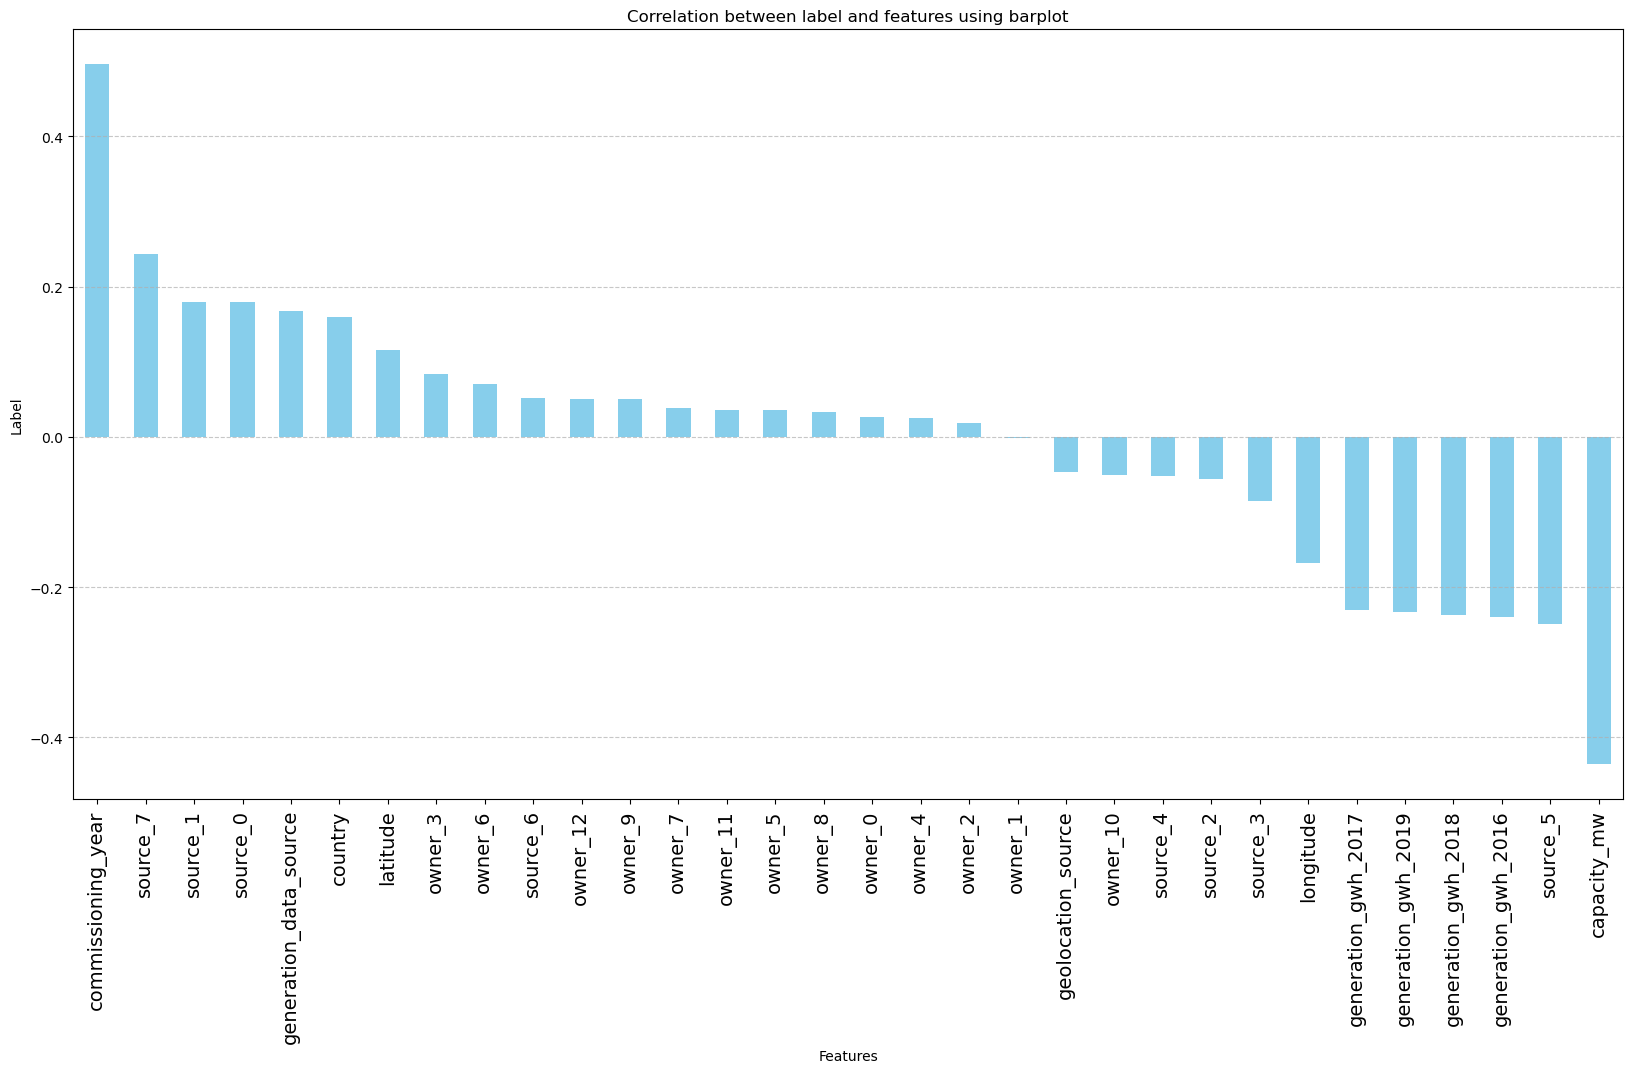

In [441]:
plt.figure(figsize=(20,10))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model I: Including all features.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [447]:
X

country  latitude  longitude  primary_fuel  commissioning_year  \
0            1 -0.700260   2.705590            10            0.511273   
1            1 -1.005944   2.705756             1            0.287023   
2            1 -1.263300   2.705104            13            0.287023   
3            1 -1.086271   2.707546             3            0.008695   
4            1 -1.258206   2.706639             1            0.832517   
...        ...       ...        ...           ...                 ...   
13293        2  0.603957   0.068373            13            0.589137   
13294        2  0.730519  -0.292859            10            1.091282   
13295        2  0.706361  -0.294880            10            0.287023   
13296        2  0.325499  -0.567024            10            0.287023   
13297        2  0.398319  -0.719854             3            0.731372   

       owner_0  owner_1  owner_2  owner_3  owner_4  ...  source_4  source_5  \
0            0        0        0        0        0  ...         0         0   
1            0        0        0        0        0  ...         0         0   
2            0        0        0        0        0  ...         0         0   
3            0        0        0        0        0  ...         0         1   
4            0        0        0        0        0  ...         0         1   
...        ...      ...      ...      ...      ...  ...       ...       ...   
13293        1        0        1        1        0  ...         0         0   
13294        1        0        1        1        0  ...         0         0   
13295        1        0        1        1        0  ...         0         0   
13296        0        0        0        1        0  ...         0         0   
13297        0        0        0        1        0  ...         0         0   

       source_6  source_7  geolocation_source  generation_gwh_2016  \
0             0         1                   2            -0.164251   
1             1         0                   4            -0.164251   
2             1         1                   4            -0.164251   
3             0         0                   4             1.574914   
4             0         0                   4             3.020601   
...         ...       ...                 ...                  ...   
13293         0         1                   3            -0.649490   
13294         0         1                   3            -0.164251   
13295         0         1                   3            -0.164251   
13296         0         1                   3            -0.164251   
13297         0         1                   3             0.363218   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.181213            -0.194238            -0.215062   
1                -0.181213            -0.194238            -0.215062   
2                -0.181213            -0.194238            -0.215062   
3                 1.397446             1.348608            -0.215062   
4                 2.850196             3.045581            -0.215062   
...                    ...                  ...                  ...   
13293            -0.675283            -0.533963            -0.696375   
13294            -0.181213            -0.670755            -0.650309   
13295            -0.181213            -0.194238            -0.215062   
13296            -0.181213            -0.194238            -0.215062   
13297             0.378888             0.374616             0.406562   

       generation_data_source  
0                           2  
1                           2  
2                           2  
3                           1  
4                           1  
...                       ...  
13293                       2  
13294                       2  
13295                       2  
13296                       2  
13297                       2  

[13087 rows x 32 columns]

In [443]:
Y

0       -0.362457
1        0.926556
2        0.569529
3        1.055287
4        2.144616
           ...   
13293   -0.271145
13294   -0.612653
13295   -1.689294
13296   -1.689294
13297    0.069545
Name: capacity_mw, Length: 13087, dtype: float64

In [448]:
X.shape

(13087, 32)

In [449]:
Y.shape

(13087,)

In [450]:
Y.value_counts().sort_index()

capacity_mw
-1.689294    2025
-1.382717       1
-1.312336       1
-1.171804       1
-1.076984       1
             ... 
 2.512343       1
 2.517815       1
 2.552733       1
 2.565697       1
 2.721274       1
Name: count, Length: 2283, dtype: int64

# Feature Scaling

In [451]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

country  latitude  longitude  primary_fuel  commissioning_year  \
0     -1.887237 -0.691350   2.684391      0.594151            0.505862   
1     -1.887237 -0.995636   2.684556     -1.855904            0.280555   
2     -1.887237 -1.251814   2.683908      1.410837            0.280555   
3     -1.887237 -1.075595   2.686336     -1.311447            0.000916   
4     -1.887237 -1.246743   2.685434     -1.855904            0.828620   
...         ...       ...        ...           ...                 ...   
13082  0.326663  0.606898   0.063148      1.410837            0.584093   
13083  0.326663  0.732882  -0.295896      0.594151            1.088605   
13084  0.326663  0.708834  -0.297905      0.594151            0.280555   
13085  0.326663  0.329715  -0.568401      0.594151            0.280555   
13086  0.326663  0.402201  -0.720305     -1.311447            0.726998   

        owner_0   owner_1   owner_2   owner_3   owner_4  ...  source_4  \
0     -0.411990 -0.515192 -0.746730 -1.110358 -0.826176  ... -0.107315   
1     -0.411990 -0.515192 -0.746730 -1.110358 -0.826176  ... -0.107315   
2     -0.411990 -0.515192 -0.746730 -1.110358 -0.826176  ... -0.107315   
3     -0.411990 -0.515192 -0.746730 -1.110358 -0.826176  ... -0.107315   
4     -0.411990 -0.515192 -0.746730 -1.110358 -0.826176  ... -0.107315   
...         ...       ...       ...       ...       ...  ...       ...   
13082  2.427246 -0.515192  1.339173  0.900610 -0.826176  ... -0.107315   
13083  2.427246 -0.515192  1.339173  0.900610 -0.826176  ... -0.107315   
13084  2.427246 -0.515192  1.339173  0.900610 -0.826176  ... -0.107315   
13085 -0.411990 -0.515192 -0.746730  0.900610 -0.826176  ... -0.107315   
13086 -0.411990 -0.515192 -0.746730  0.900610 -0.826176  ... -0.107315   

       source_5  source_6  source_7  geolocation_source  generation_gwh_2016  \
0     -0.234292 -0.147321  0.316706           -1.387930            -0.215128   
1     -0.234292  6.787897 -3.157503            1.610392            -0.215128   
2     -0.234292  6.787897  0.316706            1.610392            -0.215128   
3      4.268176 -0.147321 -3.157503            1.610392             1.693165   
4      4.268176 -0.147321 -3.157503            1.610392             3.279439   
...         ...       ...       ...                 ...                  ...   
13082 -0.234292 -0.147321  0.316706            0.111231            -0.747554   
13083 -0.234292 -0.147321  0.316706            0.111231            -0.215128   
13084 -0.234292 -0.147321  0.316706            0.111231            -0.215128   
13085 -0.234292 -0.147321  0.316706            0.111231            -0.215128   
13086 -0.234292 -0.147321  0.316706            0.111231             0.363636   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.234953            -0.253738            -0.289169   
1                -0.234953            -0.253738            -0.289169   
2                -0.234953            -0.253738            -0.289169   
3                 1.496867             1.448305            -0.289169   
4                 3.090562             3.320381            -0.289169   
...                    ...                  ...                  ...   
13082            -0.776958            -0.628518            -0.828046   
13083            -0.234953            -0.779424            -0.776471   
13084            -0.234953            -0.253738            -0.289169   
13085            -0.234953            -0.253738            -0.289169   
13086             0.379488             0.373812             0.406802   

       generation_data_source  
0                    0.234614  
1                    0.234614  
2                    0.234614  
3                   -2.613619  
4                   -2.613619  
...                       ...  
13082                0.234614  
13083                0.234614  
13084                0.234614  
13085                0.234614  
13086                0.234614  

[13087 rows x 32 co

To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

In [452]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [453]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values                Features
0    25.655921                 country
1     3.067020                latitude
2     5.834936               longitude
3     1.589499            primary_fuel
4     1.395247      commissioning_year
5     1.193523                 owner_0
6     1.193296                 owner_1
7     1.257359                 owner_2
8     1.511332                 owner_3
9     1.125646                 owner_4
10    1.056146                 owner_5
11    1.046924                 owner_6
12    1.051567                 owner_7
13    1.054733                 owner_8
14    1.053647                 owner_9
15    1.056549                owner_10
16    1.048254                owner_11
17    1.045605                owner_12
18    8.107543                source_0
19    7.476273                source_1
20    1.719829                source_2
21    1.602415                source_3
22    1.628650                source_4
23    5.337821                source_5
24    2.023402                source_6
25   10.250255                source_7
26    8.919317      geolocation_source
27    6.435552     generation_gwh_2016
28    9.184465     generation_gwh_2017
29    7.536718     generation_gwh_2018
30    2.806638     generation_gwh_2019
31    2.905380  generation_data_source

In [454]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.543537880536014 at random state 53


In [455]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=maxrs)

30% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [456]:
X_train.shape

(10469, 32)

In [457]:
Y_train.shape

(10469,)

In [458]:
X_test.shape

(2618, 32)

In [459]:
Y_test.shape

(2618,)

In [460]:
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [461]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.537777882881902
R-squared Score on training data: 52.38081109715149
Mean Absolute Error: 0.5372292909906194
Mean Squared Error: 0.47536212301548064
Root Mean Squared Error: 0.6894650992004459

Cross Validation Score: [-1.76862003e+24  5.03318862e-01  5.25975138e-01  4.91205660e-01
  4.54204700e-01]
Cross Validation Score Mean: -3.537240062999201e+23
R-squared Score - Cross Validation Score is 3.537240062999201e+25


In [462]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.5377782655817379
R-squared Score on training data: 52.38081014816969
Mean Absolute Error: 0.5372206539606668
Mean Squared Error: 0.4753617294362906
Root Mean Squared Error: 0.6894648137768096

Cross Validation Score: [-1.43911291  0.50331913  0.5259692   0.49120155  0.45419769]
Cross Validation Score Mean: 0.10711493153193333
R-squared Score - Cross Validation Score is 43.06633340498046


In [463]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: -5.531584068574347e-07
R-squared Score on training data: 0.0
Mean Absolute Error: 0.8016920637442582
Mean Squared Error: 1.028428472721871
Root Mean Squared Error: 1.0141146250409128

Cross Validation Score: [-0.16269502 -0.00499691 -0.00056502 -0.01047349 -0.03790862]
Cross Validation Score Mean: -0.04332781487693991
R-squared Score - Cross Validation Score is 4.332726171853305


In [464]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.8910282163221179
R-squared Score on training data: 99.99688923994452
Mean Absolute Error: 0.1690629709919066
Mean Squared Error: 0.11206962306536816
Root Mean Squared Error: 0.33476801380264537

Cross Validation Score: [0.11330954 0.88373664 0.91015416 0.88558471 0.89794836]
Cross Validation Score Mean: 0.738146682232073
R-squared Score - Cross Validation Score is 15.28815340900449


In [465]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.9368869005125987
R-squared Score on training data: 99.07888441293406
Mean Absolute Error: 0.13182645979912527
Mean Squared Error: 0.06490727261056808
Root Mean Squared Error: 0.25476905740408917

Cross Validation Score: [0.51920408 0.94587303 0.94681385 0.9332201  0.93783129]
Cross Validation Score Mean: 0.8565884716955109
R-squared Score - Cross Validation Score is 8.029842881708781


In [466]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.9435630795785777
R-squared Score on training data: 99.99688923994452
Mean Absolute Error: 0.1309772878136202
Mean Squared Error: 0.05804130376809407
Root Mean Squared Error: 0.2409176285955307

Cross Validation Score: [0.62313212 0.95039325 0.95269364 0.94415797 0.94379023]
Cross Validation Score Mean: 0.8828334412494723
R-squared Score - Cross Validation Score is 6.072963832910538


In [467]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.7383213487679476
R-squared Score on training data: 73.47730793725178
Mean Absolute Error: 0.42219424499629055
Mean Squared Error: 0.269117626765821
Root Mean Squared Error: 0.5187654833986365

Cross Validation Score: [0.47585344 0.74966915 0.74979829 0.7086463  0.67892679]
Cross Validation Score Mean: 0.6725787925291599
R-squared Score - Cross Validation Score is 6.574255623878777


In [468]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.9116166939900892
R-squared Score on training data: 91.66227324574507
Mean Absolute Error: 0.19505898851970466
Mean Squared Error: 0.0908958581340743
Root Mean Squared Error: 0.3014893997043251

Cross Validation Score: [0.2938753  0.91937587 0.91252665 0.91330606 0.92403169]
Cross Validation Score Mean: 0.7926231119511074
R-squared Score - Cross Validation Score is 11.899358203898181


In [469]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.9394262108893137
R-squared Score on training data: 98.53118793467047
Mean Absolute Error: 0.1414695502721861
Mean Squared Error: 0.062295774962648265
Root Mean Squared Error: 0.24959121571611503

Cross Validation Score: [0

I'm selecting Extra Tree Regressor the best model because it exhibits the smallest disparity between the test accuracy and cross-validation score. Moreover, both the train and test accuracies are promising and closely aligned.

# Hyper parameter tuning on the best ML Model

In [470]:
# Choosing the Extra Tree  Regressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [471]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)

In [472]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [473]:
best_params = grid_search.best_params_
best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [474]:
final_model_1 = ExtraTreesRegressor(max_depth=20,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=200)


In [475]:
final_model_1.fit(X_train, Y_train)

ExtraTreesRegressor(max_depth=20, n_estimators=200)

In [476]:
pred = final_model_1.predict(X_test)

In [477]:
mse = mean_squared_error(Y_test, pred)

In [478]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.057512529025424676


In [479]:
r2_score(Y_test,pred)

0.944077237878538

# Saving the model

In [480]:
filename = "FinalModel_11.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_11.pkl']

In [481]:
model=joblib.load("FinalModel_11.pkl")
prediction=model.predict(X_test)
prediction

array([-1.6892853 ,  0.03020489, -1.68927299, ...,  0.26157933,
       -0.59085064, -0.40932173])

In [482]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0     -1.689285 -1.689294
1      0.030205  0.883718
2     -1.689273 -1.689294
3     -0.454159 -0.339941
4     -1.689285 -1.689294
...         ...       ...
2613  -0.417509 -0.426446
2614   0.337469  0.352945
2615   0.261579  0.428432
2616  -0.590851 -0.612653
2617  -0.409322 -0.412621

[2618 rows x 2 columns]

In [483]:
df.tail()

Predicted  Original
2613  -0.417509 -0.426446
2614   0.337469  0.352945
2615   0.261579  0.428432
2616  -0.590851 -0.612653
2617  -0.409322 -0.412621

# Coclusion-

# 1) Primary Fuel 
- Model-I having accuracy of 98% with Extra Tree classifier model with all features.
- Model-II having accuracy of 97% with Extra Tree classifier model with K best feature selection.

# 2) capacity_mw
Model-I having accuracy of 94% with Extra Tree regression model.